# InezMara Thymocyte 1st Analysis 
## The main aim of this analysis is to plot an overview of the V/J gene usage of control vs Krt76-/-
As these are thymocytes, clonotypes won't really be able to be detected so we will look at V/J gene usage - and do it by first looking at productive chains only, and then on non-productive chains.
17/12/23

In [1]:
import os
import warnings

import scanpy as sc
import pandas as pd
import numpy as np

from numba.core.errors import NumbaDeprecationWarning
from pathlib import Path

warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


In [2]:
import dandelion as ddl

ddl.logging.print_header()

dandelion==0.3.3.dev41 pandas==1.5.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


In [3]:
FILEPATH = Path("/Users/uqssoon/Documents/Projects/InezMara/transfer_3137871_files_bbccc5c2/")

In [4]:
#import pandas as pd

#tcr_files = []
#for sample in samples:
#    file_location = (
#        sample + "/dandelion/" + sample + "_t_filtered_contig_dandelion.tsv"
#    )
#    tcr_files.append(pd.read_csv(file_location, sep="\t"))
#tcr = pd.concat(tcr_files, ignore_index=True)
#tcr.reset_index(inplace=True, drop=True)
#tcr

# Kelvin has done the initial pre-processing bit to get ddl file. 

bcr = []
for x in ["TCR_Control", "TCR_KO"]:
    bcr.append(
        ddl.load_data(
            FILEPATH
            / x
            / "dandelion"
            / "tmp"
            / "all_contig_igblast_db-all.tsv"
        )
    )

In [5]:
bcr = pd.concat(bcr)
#bcr.reset_index(inplace=True, drop=True)
#bcr

In [6]:
adatas = []
for x in ["Control", "KO"]:
    adatas.append(sc.read_h5ad(FILEPATH / ("TCR_" + x) / (x + "Filt_forVDJ.h5ad")))

In [7]:
adata = adatas[0].concatenate(adatas[1], index_unique=None)
adata

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html


AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch'
    var: 'gene_ids-Control', 'feature_types-Control', 'genome-Control', 'n_cells-Control', 'n_counts-Control', 'mito-Control', 'hemo-Control', 'ribo-Control', 'n_cells_by_counts-Control', 'mean_counts-Control', 'pct_dropout_by_counts-Control', 'total_counts-Control', 'gene_ids-Krt76-/-', 'feature_types-Krt76-/-', 'genome-Krt76-/-', 'n_cells-Krt76-/-', 'n_counts-Krt76-/-', 'mito-Krt76-/-', 'hemo-Krt76-/-', 'ribo-Krt76-/-', 'n_cells_by_counts-Krt76-/-', 'mean_counts-Krt76-/-', 'pct_dropout_by_counts-Krt76-/-', 'total_counts-Krt76-/-', 'n_cells', 'n_counts', 'mito', 'hemo', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',

In [8]:
adata.obs

n_genes  n_counts  n_genes_by_counts  \
AAACCTGAGAGAACAG-1-Control      3862   13554.0               3862   
AAACCTGAGCCATCGC-1-Control      3860   14011.0               3859   
AAACCTGAGGTGCAAC-1-Control      3118    8308.0               3116   
AAACCTGAGTCCATAC-1-Control      1705    3342.0               1705   
AAACCTGAGTTAAGTG-1-Control      1738    3108.0               1737   
...                              ...       ...                ...   
TTTGTCAGTCACCTAA-1-Krt76-/-     2958    6684.0               2958   
TTTGTCAGTCTAGAGG-1-Krt76-/-     1336    2274.0               1336   
TTTGTCAGTGGGTCAA-1-Krt76-/-     2642    5939.0               2642   
TTTGTCATCCCAAGTA-1-Krt76-/-     1325    2397.0               1325   
TTTGTCATCGGAATCT-1-Krt76-/-     2185    4290.0               2185   

                             total_counts  total_counts_mito  pct_counts_mito  \
AAACCTGAGAGAACAG-1-Control        13554.0              102.0         0.752545   
AAACCTGAGCCATCGC-1-Control        14010.0               43.0         0.306924   
AAACCTGAGGTGCAAC-1-Control         8306.0               77.0         0.927041   
AAACCTGAGTCCATAC-1-Control         3342.0               69.0         2.064632   
AAACCTGAGTTAAGTG-1-Control         3107.0               42.0         1.351786   
...                                   ...                ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-        6684.0              102.0         1.526032   
TTTGTCAGTCTAGAGG-1-Krt76-/-        2274.0               37.0         1.627089   
TTTGTCAGTGGGTCAA-1-Krt76-/-        5939.0              104.0         1.751137   
TTTGTCATCCCAAGTA-1-Krt76-/-        2397.0               49.0         2.044222   
TTTGTCATCGGAATCT-1-Krt76-/-        4290.0               85.0         1.981352   

                             total_counts_hemo  pct_counts_hemo  \
AAACCTGAGAGAACAG-1-Control                 0.0              0.0   
AAACCTGAGCCATCGC-1-Control                 0.0              0.0   
AAACCTGAGGTGCAAC-1-Control                 0.0              0.0   
AAACCTGAGTCCATAC-1-Control                 0.0              0.0   
AAACCTGAGTTAAGTG-1-Control                 0.0              0.0   
...                                        ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-                0.0              0.0   
TTTGTCAGTCTAGAGG-1-Krt76-/-                0.0              0.0   
TTTGTCAGTGGGTCAA-1-Krt76-/-                0.0              0.0   
TTTGTCATCCCAAGTA-1-Krt76-/-                0.0              0.0   
TTTGTCATCGGAATCT-1-Krt76-/-                0.0              0.0   

                             total_counts_ribo  pct_counts_ribo  \
AAACCTGAGAGAACAG-1-Control              3427.0        25.284048   
AAACCTGAGCCATCGC-1-Control              3580.0        25.553175   
AAACCTGAGGTGCAAC-1-Control              1745.0        21.008909   
AAACCTGAGTCCATAC-1-Control               827.0        24.745661   
AAACCTGAGTTAAGTG-1-Control               472.0        15.191503   
...                                        ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-             1168.0        17.474566   
TTTGTCAGTCTAGAGG-1-Krt76-/-              323.0        14.204046   
TTTGTCAGTGGGTCAA-1-Krt76-/-             1212.0        20.407476   
TTTGTCATCCCAAGTA-1-Krt76-/-              594.0        24.780977   
TTTGTCATCGGAATCT-1-Krt76-/-              853.0        19.883450   

                             doublet_score  predicted_doublet    Sample  \
AAACCTGAGAGAACAG-1-Control        0.060215              False   Control   
AAACCTGAGCCATCGC-1-Control        0.043403              False   Control   
AAACCTGAGGTGCAAC-1-Control        0.042290              False   Control   
AAACCTGAGTCCATAC-1-Control        0.179161              False   Control   
AAACCTGAGTTAAGTG-1-Control        0.012745              False   Control   
...                                    ...                ...       ...   
TTTGTCAGTCACCTAA-1-Krt76-/-       0.185714              False  Krt76-/-   
TTTGTCAGTCTAGAGG-

In [9]:
bcr

sequence_id  \
sequence_id                                                                  
AAACCTGAGAAAGTGG-1-Control_contig_1    AAACCTGAGAAAGTGG-1-Control_contig_1   
AAACCTGAGAAAGTGG-1-Control_contig_2    AAACCTGAGAAAGTGG-1-Control_contig_2   
AAACCTGAGAAAGTGG-1-Control_contig_5    AAACCTGAGAAAGTGG-1-Control_contig_5   
AAACCTGAGAAAGTGG-1-Control_contig_4    AAACCTGAGAAAGTGG-1-Control_contig_4   
AAACCTGAGAAAGTGG-1-Control_contig_3    AAACCTGAGAAAGTGG-1-Control_contig_3   
...                                                                    ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2  TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3  TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TTTGTCATCGGAATCT-1-Krt76-/-_contig_1   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3  TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2  TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2   

                                                                               sequence  \
sequence_id                                                                               
AAACCTGAGAAAGTGG-1-Control_contig_1   AATACCCGTCTGGAGCCTGATTCCACCATGAGCTGCAGGCTTCTCC...   
AAACCTGAGAAAGTGG-1-Control_contig_2   GGAGTCTGTAAGCACAAGTGTGTCTGGGCACAAGACACCCTTCAGA...   
AAACCTGAGAAAGTGG-1-Control_contig_5   GGTGACAAAGAGGAGGAAACCCAGTGATATAGATGTTCTCCCAGAG...   
AAACCTGAGAAAGTGG-1-Control_contig_4   GGGGAGAATCCCCAGTGGAGAGAGATAAAGAGCAAATGATGAAATC...   
AAACCTGAGAAAGTGG-1-Control_contig_3   GAAAAAGAAGAACAGGGGGTAAAGAGGAAACCCCTGCATTAGCTCG...   
...                                                                                 ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2  TGGGCTGTAAGCCCAAGTGTGTCTGGGCACAAGACACCCTTCAGAG...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3  GAGCTTCTTGGCAACTGCAGCGGGGAGTTCTGGGGCTTCTGGCGTC...   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TCTCGTGCTTACGTGGAGTTTCTATGAGTGAAGCCACTGCCTCATC...   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3  GGGAAGCACGTTTAGAGAAATCTGACTCTGCTGCACTCACCAGTGC...   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2  GAAGAGTTGAGAGCAGCACTCTACACTGAACATGAATACTTCTCCA...   

                                     rev_comp productive  \
sequence_id                                                
AAACCTGAGAAAGTGG-1-Control_contig_1         F          T   
AAACCTGAGAAAGTGG-1-Control_contig_2         F          T   
AAACCTGAGAAAGTGG-1-Control_contig_5       NaN          F   
AAACCTGAGAAAGTGG-1-Control_contig_4         F          F   
AAACCTGAGAAAGTGG-1-Control_contig_3       NaN          F   
...                                       ...        ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2        F          T   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3      NaN          F   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1        F          T   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3        F          F   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2        F          F   

                                                       v_call    d_call  \
sequence_id                                                               
AAACCTGAGAAAGTGG-1-Control_contig_1                  TRBV5*01       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_2   TRAV4D-4*03,TRAV4N-4*01       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_5                       NaN  TRBD2*01   
AAACCTGAGAAAGTGG-1-Control_contig_4                TRAV7-5*03       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_3                       NaN       NaN   
...                                                       ...       ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2          TRAV4-4/DV10*02       NaN   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3                      NaN       NaN   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1                TRBV16*01  TRBD2*01   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3                 TRDV1*02       NaN   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2               TRAV6-4*03       NaN   

                                                             j_call  \
sequence_id                         

In [10]:
vdj, adatax = ddl.pp.check_contigs(bcr, adata, productive_only=False)


Preparing data: 31039it [00:03, 10223.59it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 11141/11141 [00:16<00:00, 667.04it/s]


In [11]:
vdj.data

sequence_id  \
sequence_id                                                                  
AAACCTGAGAGAACAG-1-Control_contig_1    AAACCTGAGAGAACAG-1-Control_contig_1   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4   
...                                                                    ...   
TTTGTCATCCTTAATC-1-Control_contig_2    TTTGTCATCCTTAATC-1-Control_contig_2   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TTTGTCATCGGAATCT-1-Krt76-/-_contig_1   
TTTGTCATCTTCCTTC-1-Control_contig_1    TTTGTCATCTTCCTTC-1-Control_contig_1   
TTTGTCATCTTCCTTC-1-Control_contig_3    TTTGTCATCTTCCTTC-1-Control_contig_3   
TTTGTCATCTTCCTTC-1-Control_contig_2    TTTGTCATCTTCCTTC-1-Control_contig_2   

                                                                               sequence  \
sequence_id                                                                               
AAACCTGAGAGAACAG-1-Control_contig_1   CAAATATTCCTTTCCTGTTCTGGACCATCCATGGATCCTAGACTTC...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1  GTCACATCAGTGCTCATCCCACTATGGGCATCCAGACCCTCTGTTG...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3  ATTCTAGTCATCATAGTTAGCCAGGTGGAGCCCCTGCATAGCGCGT...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2  GAGACTGATTCTTTTTCTTTTCCAGAGACCACACATGGTGATGGTG...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  GGGGTTTCTCTTGGGAGTCACAGGGTTGTGCAGCCCTTGCCCTGAC...   
...                                                                                 ...   
TTTGTCATCCTTAATC-1-Control_contig_2   GAGACAAACCTCTCTGCCACCTGGTCTCCCTGCCCCTGCCCAGGCT...   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TCTCGTGCTTACGTGGAGTTTCTATGAGTGAAGCCACTGCCTCATC...   
TTTGTCATCTTCCTTC-1-Control_contig_1   TGGGGAGACCTCTCTTAAGCGAAGGTGGTGTGAAGTCAACACTGAA...   
TTTGTCATCTTCCTTC-1-Control_contig_3   TGGGGCTCTCTCACCAAAGAGACCAGTATCCTGAGAGGAAGCATGT...   
TTTGTCATCTTCCTTC-1-Control_contig_2   GGGCTGATTGGCAGCCGATTGAACAGCCTATGCGAGCTTCTTGGCA...   

                                     rev_comp productive               v_call  \
sequence_id                                                                     
AAACCTGAGAGAACAG-1-Control_contig_1         F          T            TRBV17*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1        F          T            TRBV15*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3        F          T  TRBV19*01,TRBV19*03   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2        F          T            TRBV19*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4      NaN          F                  NaN   
...                                       ...        ...                  ...   
TTTGTCATCCTTAATC-1-Control_contig_2       NaN          F                  NaN   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1        F          T            TRBV16*01   
TTTGTCATCTTCCTTC-1-Control_contig_1         F          T            TRBV20*01   
TTTGTCATCTTCCTTC-1-Control_contig_3         F          F          TRBV13-2*01   
TTTGTCATCTTCCTTC-1-Control_contig_2       NaN          F                  NaN   

                                        d_call      j_call  \
sequence_id                                                  
AAACCTGAGAGAACAG-1-Control_contig_1        NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1       NaN  TRBJ2-1*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3       NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2       NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4       NaN  TRBJ2-6*01   
...                                        ...         ...   
TTTGTCATCCTTAATC-1-Control_contig_2        NaN  TRBJ2-4*01   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TRBD2*01  TRBJ2-5*01   
TTTGTCATCTTCCTTC-1-Control_contig_1        NaN  TRBJ1-6*01   
TTTGTCATCTTCCTTC-1-Control_contig_3        NaN  TRBJ2-7*01   
TTTGTCATCTTCCTTC-1-Control_contig_2        NaN  TRBJ2-6*01   

   

## FIRST THING FIRST... 
1. Need to subset to productive vs non-productive
2. Look at V/J gene usage within each subsets for Control and KO separately.. 

In [12]:
vdj_P = vdj[vdj.data.productive == "T"].copy()
vdj_NP = vdj[vdj.data.productive == "F"].copy()

In [13]:
adata_P = adata.copy()
adata_NP = adata.copy()

ddl.tl.transfer(adata_P, vdj_P)
ddl.tl.transfer(adata_NP, vdj_NP)

In [14]:
vdj_P.data

sequence_id  \
sequence_id                                                                  
AAACCTGAGAGAACAG-1-Control_contig_1    AAACCTGAGAGAACAG-1-Control_contig_1   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2   
AAACCTGAGGACCACA-1-Krt76-/-_contig_1  AAACCTGAGGACCACA-1-Krt76-/-_contig_1   
...                                                                    ...   
TTTGTCATCCATGCTC-1-Control_contig_1    TTTGTCATCCATGCTC-1-Control_contig_1   
TTTGTCATCCGCATCT-1-Control_contig_1    TTTGTCATCCGCATCT-1-Control_contig_1   
TTTGTCATCCTTAATC-1-Control_contig_1    TTTGTCATCCTTAATC-1-Control_contig_1   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TTTGTCATCGGAATCT-1-Krt76-/-_contig_1   
TTTGTCATCTTCCTTC-1-Control_contig_1    TTTGTCATCTTCCTTC-1-Control_contig_1   

                                                                               sequence  \
sequence_id                                                                               
AAACCTGAGAGAACAG-1-Control_contig_1   CAAATATTCCTTTCCTGTTCTGGACCATCCATGGATCCTAGACTTC...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1  GTCACATCAGTGCTCATCCCACTATGGGCATCCAGACCCTCTGTTG...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3  ATTCTAGTCATCATAGTTAGCCAGGTGGAGCCCCTGCATAGCGCGT...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2  GAGACTGATTCTTTTTCTTTTCCAGAGACCACACATGGTGATGGTG...   
AAACCTGAGGACCACA-1-Krt76-/-_contig_1  GGGCTCTCTTAAGCGAAGGTGGTGTGAAGTCAACACTGAAGATGTT...   
...                                                                                 ...   
TTTGTCATCCATGCTC-1-Control_contig_1   TCTGATAGCTGCAGTAGGTAGGGCTTATTTGCCCTGCCTTGACCCA...   
TTTGTCATCCGCATCT-1-Control_contig_1   GGATTCTCTTCTCTTGCCTGATGCCCTGCATGCCCCACAGAGATAG...   
TTTGTCATCCTTAATC-1-Control_contig_1   TGGGGACCAAGAGGACCAGCATCCTGAGAAGAAGCATGTCTAACAC...   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TCTCGTGCTTACGTGGAGTTTCTATGAGTGAAGCCACTGCCTCATC...   
TTTGTCATCTTCCTTC-1-Control_contig_1   TGGGGAGACCTCTCTTAAGCGAAGGTGGTGTGAAGTCAACACTGAA...   

                                     rev_comp productive               v_call  \
sequence_id                                                                     
AAACCTGAGAGAACAG-1-Control_contig_1         F          T            TRBV17*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1        F          T            TRBV15*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3        F          T  TRBV19*01,TRBV19*03   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2        F          T            TRBV19*01   
AAACCTGAGGACCACA-1-Krt76-/-_contig_1        F          T            TRBV20*01   
...                                       ...        ...                  ...   
TTTGTCATCCATGCTC-1-Control_contig_1         F          T             TRBV4*01   
TTTGTCATCCGCATCT-1-Control_contig_1         F          T             TRBV1*01   
TTTGTCATCCTTAATC-1-Control_contig_1         F          T          TRBV12-1*01   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1        F          T            TRBV16*01   
TTTGTCATCTTCCTTC-1-Control_contig_1         F          T            TRBV20*01   

                                        d_call      j_call  \
sequence_id                                                  
AAACCTGAGAGAACAG-1-Control_contig_1        NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1       NaN  TRBJ2-1*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3       NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2       NaN  TRBJ2-5*01   
AAACCTGAGGACCACA-1-Krt76-/-_contig_1       NaN  TRBJ1-5*01   
...                                        ...         ...   
TTTGTCATCCATGCTC-1-Control_contig_1   TRBD2*01  TRBJ2-4*01   
TTTGTCATCCGCATCT-1-Control_contig_1   TRBD2*01  TRBJ2-5*01   
TTTGTCATCCTTAATC-1-Control_contig_1        NaN  TRBJ1-1*01   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TRBD2*01  TRBJ2-5*01   
TTTGTCATCTTCCTTC-1-Control_contig_1        NaN  TRBJ1-6*01   

   

In [15]:
adata_P

AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_ca

In [16]:
vdj_NP.data

sequence_id  \
sequence_id                                                                  
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4   
AAACCTGAGGACCACA-1-Krt76-/-_contig_3  AAACCTGAGGACCACA-1-Krt76-/-_contig_3   
AAACCTGAGGACCACA-1-Krt76-/-_contig_5  AAACCTGAGGACCACA-1-Krt76-/-_contig_5   
AAACCTGAGGACCACA-1-Krt76-/-_contig_2  AAACCTGAGGACCACA-1-Krt76-/-_contig_2   
AAACCTGAGGACCACA-1-Krt76-/-_contig_6  AAACCTGAGGACCACA-1-Krt76-/-_contig_6   
...                                                                    ...   
TTTGTCATCCTCGCAT-1-Control_contig_2    TTTGTCATCCTCGCAT-1-Control_contig_2   
TTTGTCATCCTTAATC-1-Control_contig_3    TTTGTCATCCTTAATC-1-Control_contig_3   
TTTGTCATCCTTAATC-1-Control_contig_2    TTTGTCATCCTTAATC-1-Control_contig_2   
TTTGTCATCTTCCTTC-1-Control_contig_3    TTTGTCATCTTCCTTC-1-Control_contig_3   
TTTGTCATCTTCCTTC-1-Control_contig_2    TTTGTCATCTTCCTTC-1-Control_contig_2   

                                                                               sequence  \
sequence_id                                                                               
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  GGGGTTTCTCTTGGGAGTCACAGGGTTGTGCAGCCCTTGCCCTGAC...   
AAACCTGAGGACCACA-1-Krt76-/-_contig_3  GGCACTTTGTCAAACCCTGAGTGAATAGATGGATATCCGTTCCCAA...   
AAACCTGAGGACCACA-1-Krt76-/-_contig_5  TGGGGATCCTCTTGGACTGAGCTTATCTGCCAGAGCAGAAGGATTT...   
AAACCTGAGGACCACA-1-Krt76-/-_contig_2  GCTGATATGGGGGTCTCTCTCCTGTGACATGCCTCATGGTATTACT...   
AAACCTGAGGACCACA-1-Krt76-/-_contig_6  TGGGGGATTGGCAGCCGATTGAACAGCCTATGCGAGCTTCTTGGCA...   
...                                                                                 ...   
TTTGTCATCCTCGCAT-1-Control_contig_2   GCCTTGCCCTGACTGATTGGCAGCCGATTGAACAGCCTATGCGAGC...   
TTTGTCATCCTTAATC-1-Control_contig_3   GCATTTCAATGACACCCAGCGCCAAGAAAAAAGAACATTCAAAAGA...   
TTTGTCATCCTTAATC-1-Control_contig_2   GAGACAAACCTCTCTGCCACCTGGTCTCCCTGCCCCTGCCCAGGCT...   
TTTGTCATCTTCCTTC-1-Control_contig_3   TGGGGCTCTCTCACCAAAGAGACCAGTATCCTGAGAGGAAGCATGT...   
TTTGTCATCTTCCTTC-1-Control_contig_2   GGGCTGATTGGCAGCCGATTGAACAGCCTATGCGAGCTTCTTGGCA...   

                                     rev_comp productive       v_call d_call  \
sequence_id                                                                    
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4      NaN          F          NaN    NaN   
AAACCTGAGGACCACA-1-Krt76-/-_contig_3      NaN          F          NaN    NaN   
AAACCTGAGGACCACA-1-Krt76-/-_contig_5      NaN          F          NaN    NaN   
AAACCTGAGGACCACA-1-Krt76-/-_contig_2      NaN          F          NaN    NaN   
AAACCTGAGGACCACA-1-Krt76-/-_contig_6      NaN          F          NaN    NaN   
...                                       ...        ...          ...    ...   
TTTGTCATCCTCGCAT-1-Control_contig_2       NaN          F          NaN    NaN   
TTTGTCATCCTTAATC-1-Control_contig_3       NaN          F          NaN    NaN   
TTTGTCATCCTTAATC-1-Control_contig_2       NaN          F          NaN    NaN   
TTTGTCATCTTCCTTC-1-Control_contig_3         F          F  TRBV13-2*01    NaN   
TTTGTCATCTTCCTTC-1-Control_contig_2       NaN          F          NaN    NaN   

                                          j_call  \
sequence_id                                        
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  TRBJ2-6*01   
AAACCTGAGGACCACA-1-Krt76-/-_contig_3  TRBJ2-1*01   
AAACCTGAGGACCACA-1-Krt76-/-_contig_5  TRBJ2-3*01   
AAACCTGAGGACCACA-1-Krt76-/-_contig_2  TRBJ1-6*01   
AAACCTGAGGACCACA-1-Krt76-/-_contig_6  TRBJ2-6*01   
...                                          ...   
TTTGTCATCCTCGCAT-1-Control_contig_2   TRBJ2-6*01   
TTTGTCATCCTTAATC-1-Control_contig_3   TRBJ2-5*01   
TTTGTCATCCTTAATC-1-Control_contig_2   TRBJ2-4*01   
TTTGTCATCTTCCTTC-1-Control_contig_3   TRBJ2-7*01   
TTTGTCATCTTCCTTC-1-Control_contig_2   TRBJ2-6*01   

                                                                     sequence_alignment  \
sequence_id                                            

In [17]:
adata_NP

AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_ca

In [18]:
#adata_P.write_h5ad("adata_tcr_InezMara_MS__Productiveonly_111223.h5ad")
#adata_NP.write_h5ad("adata_tcr_InezMara_MS__NonProductiveonly_141223.h5ad")

## Some initial look - productive chains first

In [19]:
adata_P = sc.read_h5ad("/Users/uqssoon/Documents/Projects/InezMara/adata_tcr_InezMara_MS__Productiveonly_111223.h5ad")

In [20]:
adata_P.obs["Sample"].value_counts()

Control     9832
Krt76-/-    5569
Name: Sample, dtype: int64

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


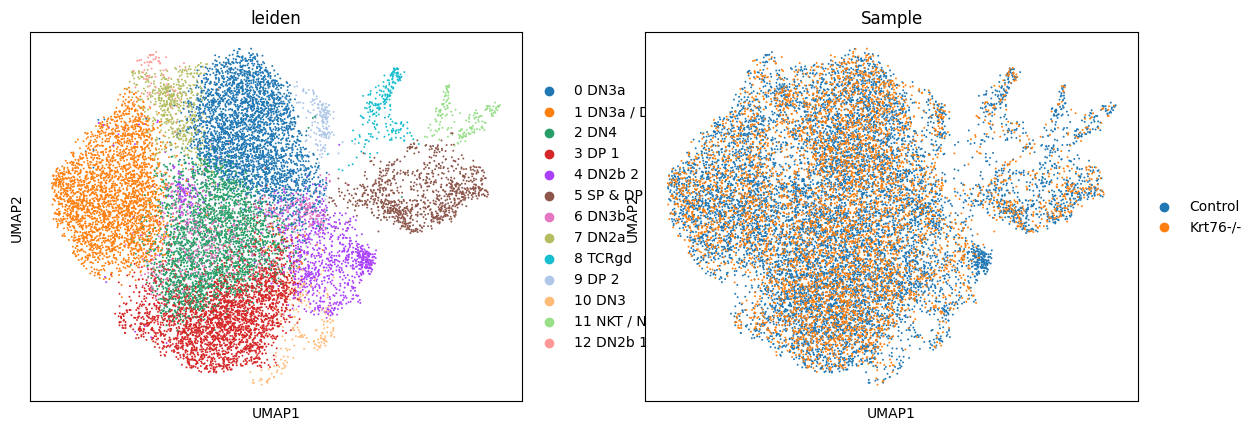

In [21]:
sc.pl.umap(adata_P, color=["leiden", "Sample"])

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


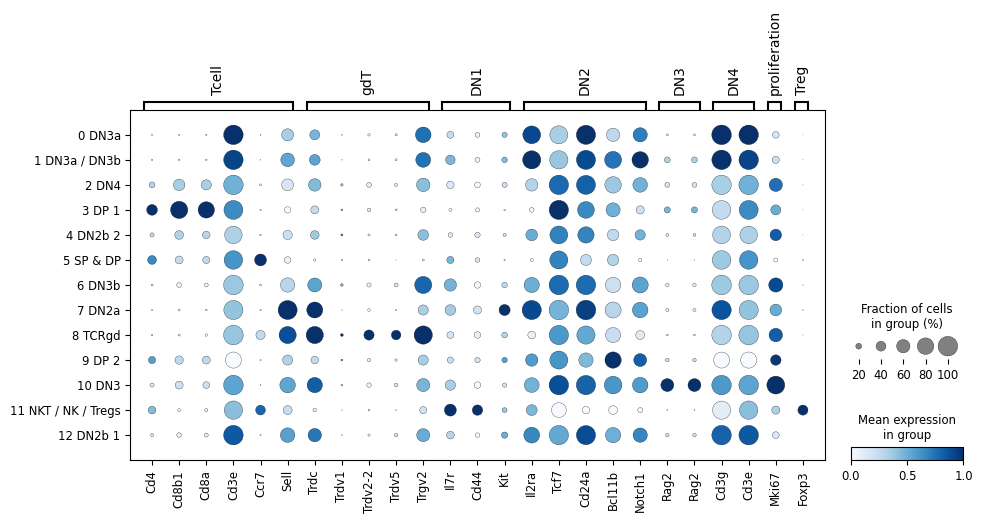

In [22]:
sc.pl.dotplot(
    adata_P,
    {
        "Tcell": [
            "Cd4",
            "Cd8b1",
            "Cd8a",
            "Cd3e",
            "Ccr7",
            "Sell",
        ],
        "gdT": [
            "Trdc",
            "Trdv1",
            "Trdv2-2",
            "Trdv5",
            "Trgv2",
        ],
        "DN1": [
            "Il7r",
            "Cd44",
            "Kit",
        ],
        "DN2": [
            "Il2ra",
            "Tcf7",
            "Cd24a",
            "Bcl11b",
            "Notch1",
        ],
        "DN3": [
            "Rag2",
            "Rag2",
        ],
        "DN4": [
            "Cd3g",
            "Cd3e",
        ],
        "proliferation": [
            "Mki67",
        ],
        "Treg": [
            "Foxp3",
        ],
    },
    groupby="leiden",
    standard_scale="var",
    color_map="Blues",
)

In [23]:
#### If you have done up scanpy's plotting defaults, you can reset it before going forward further.

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

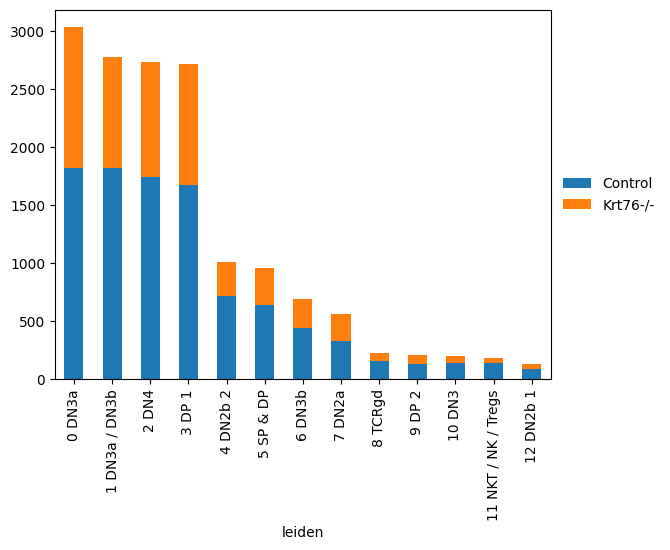

In [24]:
pd.crosstab(
    adata_P.obs["leiden"],
    adata_P.obs["Sample"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

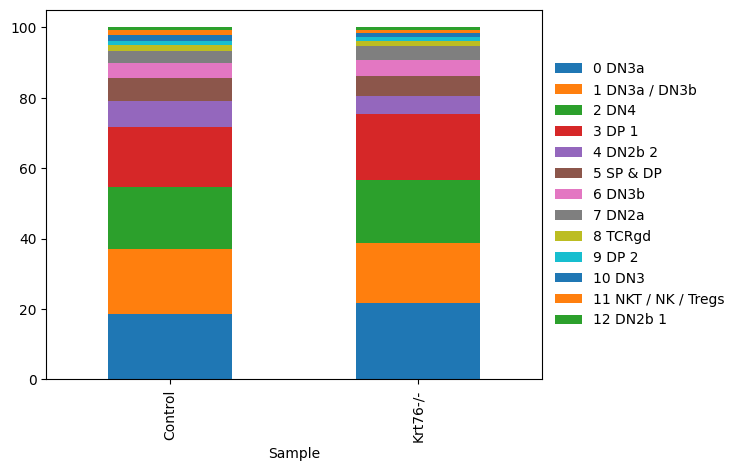

In [25]:
pd.crosstab(adata_P.obs["Sample"], adata_P.obs["leiden"]).apply(lambda r: r/r.sum()*100,axis = 1).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,.5), loc = "center left", frameon=False)

In [26]:
import pandas as pd

pd.crosstab(adata_P.obs["leiden"], adata_P.obs["productive_VDJ"])

productive_VDJ        F  F|F  F|F|F  F|F|F|F  F|F|F|F|F  F|F|F|F|F|F  \
leiden                                                                 
0 DN3a                4    5      1        0          0            0   
1 DN3a / DN3b         1    4      2        0          0            0   
2 DN4                19   33     22        9          5            0   
3 DP 1               33   15      3        2          0            0   
4 DN2b 2             17    8      6        7          2            1   
5 SP & DP            21    6      2        1          0            0   
6 DN3b                8    5      1        2          0            0   
7 DN2a                0    0      1        0          0            0   
8 TCRgd               0    1      0        1          0            0   
9 DP 2                4    0      0        0          0            0   
10 DN3                1    1      0        0          0            0   
11 NKT / NK / Tregs   7    0      1        0          0            0   
12 DN2b 1             0    0      0        0          0            0   

productive_VDJ       F|F|F|F|F|F|F  No_contig  None    T  ...  T|T|F  T|T|F|F  \
leiden                                                    ...                   
0 DN3a                           0       2408     1  105  ...      7        1   
1 DN3a / DN3b                    0       2455     1   50  ...      4        0   
2 DN4                            1        577    11  240  ...     31       44   
3 DP 1                           0        256    19  586  ...     32       26   
4 DN2b 2                         0        417     6  172  ...     11        8   
5 SP & DP                        0         60    28  356  ...     13       14   
6 DN3b                           0         80     1   73  ...     10        7   
7 DN2a                           0        505     0    0  ...      0        0   
8 TCRgd                          0        167     1    8  ...      1        2   
9 DP 2                           0        110     0   43  ...      2        2   
10 DN3                           0         78     0   16  ...      1        3   
11 NKT / NK / Tregs              0         30     5   59  ...      3        2   
12 DN2b 1                        0         90     0    2  ...      0        0   

productive_VDJ       T|T|F|F|F  T|T|F|F|F|F  T|T|F|F|F|F|F  T|T|F|F|F|F|F|F  \
leiden                                                                        
0 DN3a                       4            2              0                0   
1 DN3a / DN3b                0            0              0                0   
2 DN4                       23           22              2                4   
3 DP 1                       8            5              1                0   
4 DN2b 2                     4            2              2                0   
5 SP & DP                    3            0              1                0   
6 DN3b                       2            2              0                0   
7 DN2a                       1            0              0                0   
8 TCRgd                      1            0              0                0   
9 DP 2                       2            0              0                0   
10 DN3                       0            0              0                0   
11 NKT / NK / Tregs          0            0              0                0   
12 DN2b 1                    0            0              0                0   

productive_VDJ       T|T|T  T|T|T|F  T|T|T|F|F  T|T|T|F|F|F|F|F  
leiden                                                           
0 DN3a                   1        0          0                0  
1 DN3a / DN3b            0        0          0                0  
2 DN4                    0        0          0                1  
3 DP 1                   1        2          1                0  
4 DN2b 2                 3        1          0                0  
5 SP & DP                0        0          1         

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


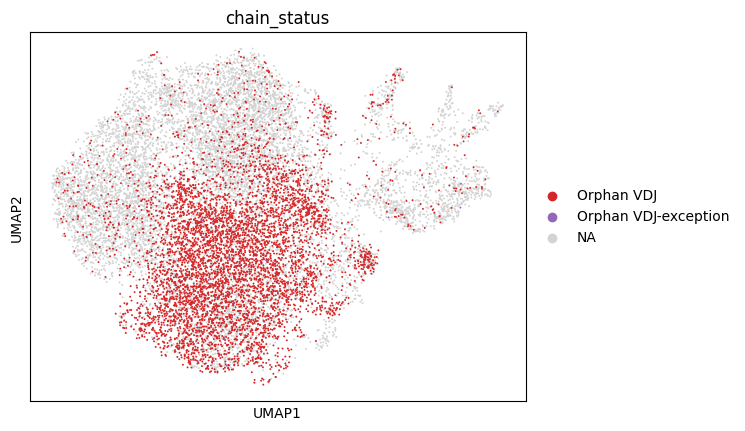

In [27]:
sc.pl.umap(adata_P, color="chain_status", groups=["Orphan VDJ", "Orphan VDJ-exception"])

In [28]:
adata_P.obs["chain_status"].value_counts()

No_contig               7233
Orphan VDJ              5543
Extra pair              1879
Single pair              637
Orphan VJ                 73
Orphan VDJ-exception      30
Extra pair-exception       6
Name: chain_status, dtype: int64

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


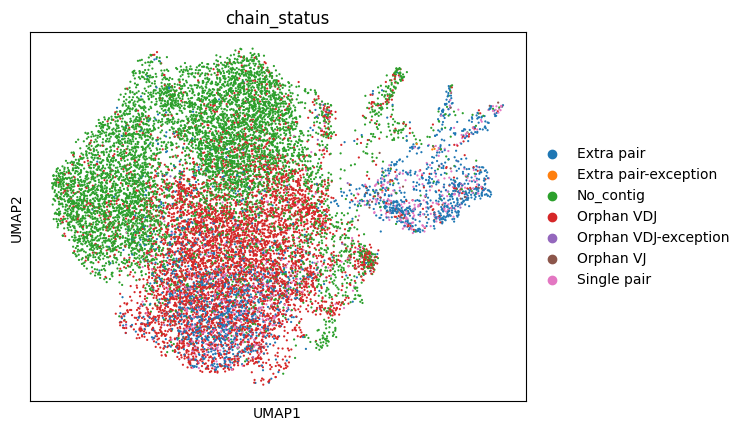

In [29]:
sc.pl.umap(adata_P, color=["chain_status"], size = 10)

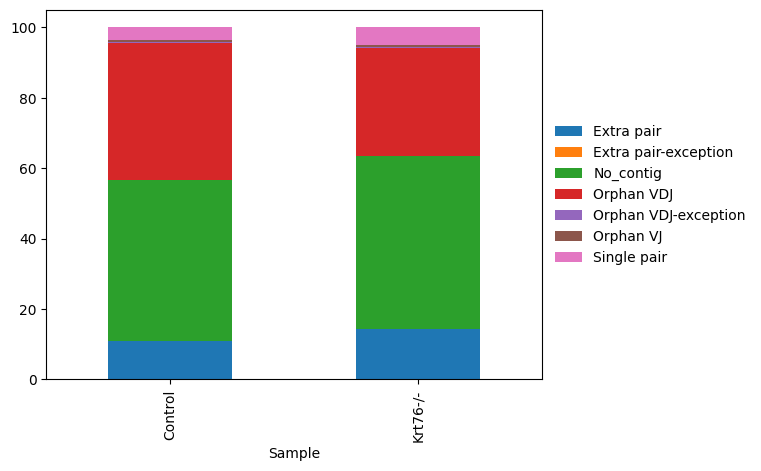

In [30]:
pd.crosstab(
    adata_P.obs["Sample"],
    adata_P.obs["chain_status"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

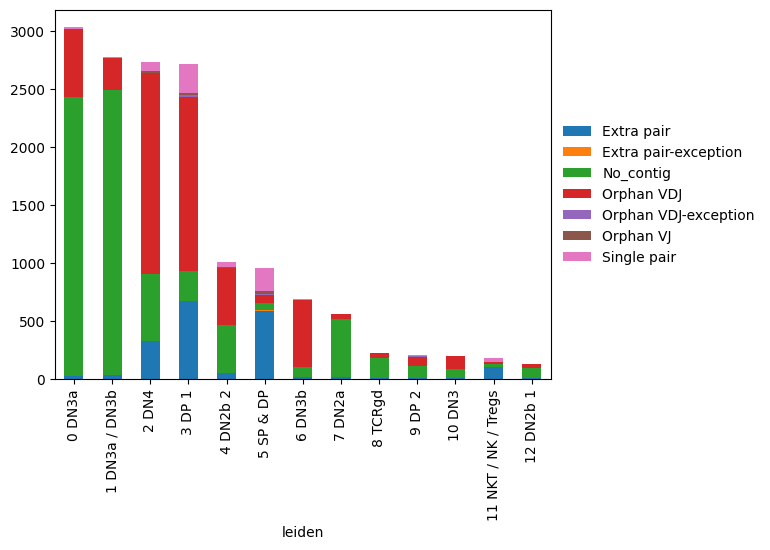

In [31]:
pd.crosstab(
    adata_P.obs["leiden"],
    adata_P.obs["chain_status"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

## V/J gene usage 

### V gene Beta Chain (ALL Samples)

In [32]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [33]:
adata_PF

View of AnnData object with n_obs × n_vars = 7896 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [34]:
adata_PF.obs.groupby(["leiden"]).apply(len)

leiden
0 DN3a                  611
1 DN3a / DN3b           313
2 DN4                  2076
3 DP 1                 2398
4 DN2b 2                558
5 SP & DP               841
6 DN3b                  594
7 DN2a                   52
8 TCRgd                  60
9 DP 2                   94
10 DN3                  120
11 NKT / NK / Tregs     141
12 DN2b 1                38
dtype: int64

In [35]:
pd.crosstab(adata_PF.obs['Sample'], adata_PF.obs['leiden'])

leiden    0 DN3a  1 DN3a / DN3b  2 DN4  3 DP 1  4 DN2b 2  5 SP & DP  6 DN3b  \
Sample                                                                        
Control      401            229   1348    1448       414        558     379   
Krt76-/-     210             84    728     950       144        283     215   

leiden    7 DN2a  8 TCRgd  9 DP 2  10 DN3  11 NKT / NK / Tregs  12 DN2b 1  
Sample                                                                     
Control       40       43      62      85                  106         28  
Krt76-/-      12       17      32      35                   35         10

In [36]:
working_df = pd.DataFrame(adata_PF.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    TRBV13-2                              52
          TRBV5                                 47
          TRBV13-1                              46
          TRBV15                                45
          TRBV19                                43
...                                            ...
12 DN2b 1 TRBV19                                 0
          TRBV10                                 0
          TRBV21                                 0
          TRBV23                                 0
          TRBV24                                 0

[312 rows x 1 columns]

In [37]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_abT_VDJ_main  counts
0       0 DN3a            TRBV13-2      52
1       0 DN3a               TRBV5      47
2       0 DN3a            TRBV13-1      46
3       0 DN3a              TRBV15      45
4       0 DN3a              TRBV19      43
..         ...                 ...     ...
307  12 DN2b 1              TRBV19       0
308  12 DN2b 1              TRBV10       0
309  12 DN2b 1              TRBV21       0
310  12 DN2b 1              TRBV23       0
311  12 DN2b 1              TRBV24       0

[312 rows x 3 columns]

In [38]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 611,
 '1 DN3a / DN3b': 313,
 '2 DN4': 2076,
 '3 DP 1': 2398,
 '4 DN2b 2': 558,
 '5 SP & DP': 841,
 '6 DN3b': 594,
 '7 DN2a': 52,
 '8 TCRgd': 60,
 '9 DP 2': 94,
 '10 DN3': 120,
 '11 NKT / NK / Tregs': 141,
 '12 DN2b 1': 38}

In [39]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [40]:
working_df

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a            TRBV13-2      52    0.085106
1       0 DN3a               TRBV5      47    0.076923
2       0 DN3a            TRBV13-1      46    0.075286
3       0 DN3a              TRBV15      45    0.073650
4       0 DN3a              TRBV19      43    0.070376
..         ...                 ...     ...         ...
307  12 DN2b 1              TRBV19       0    0.000000
308  12 DN2b 1              TRBV10       0    0.000000
309  12 DN2b 1              TRBV21       0    0.000000
310  12 DN2b 1              TRBV23       0    0.000000
311  12 DN2b 1              TRBV24       0    0.000000

[312 rows x 4 columns]

In [41]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [42]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [43]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

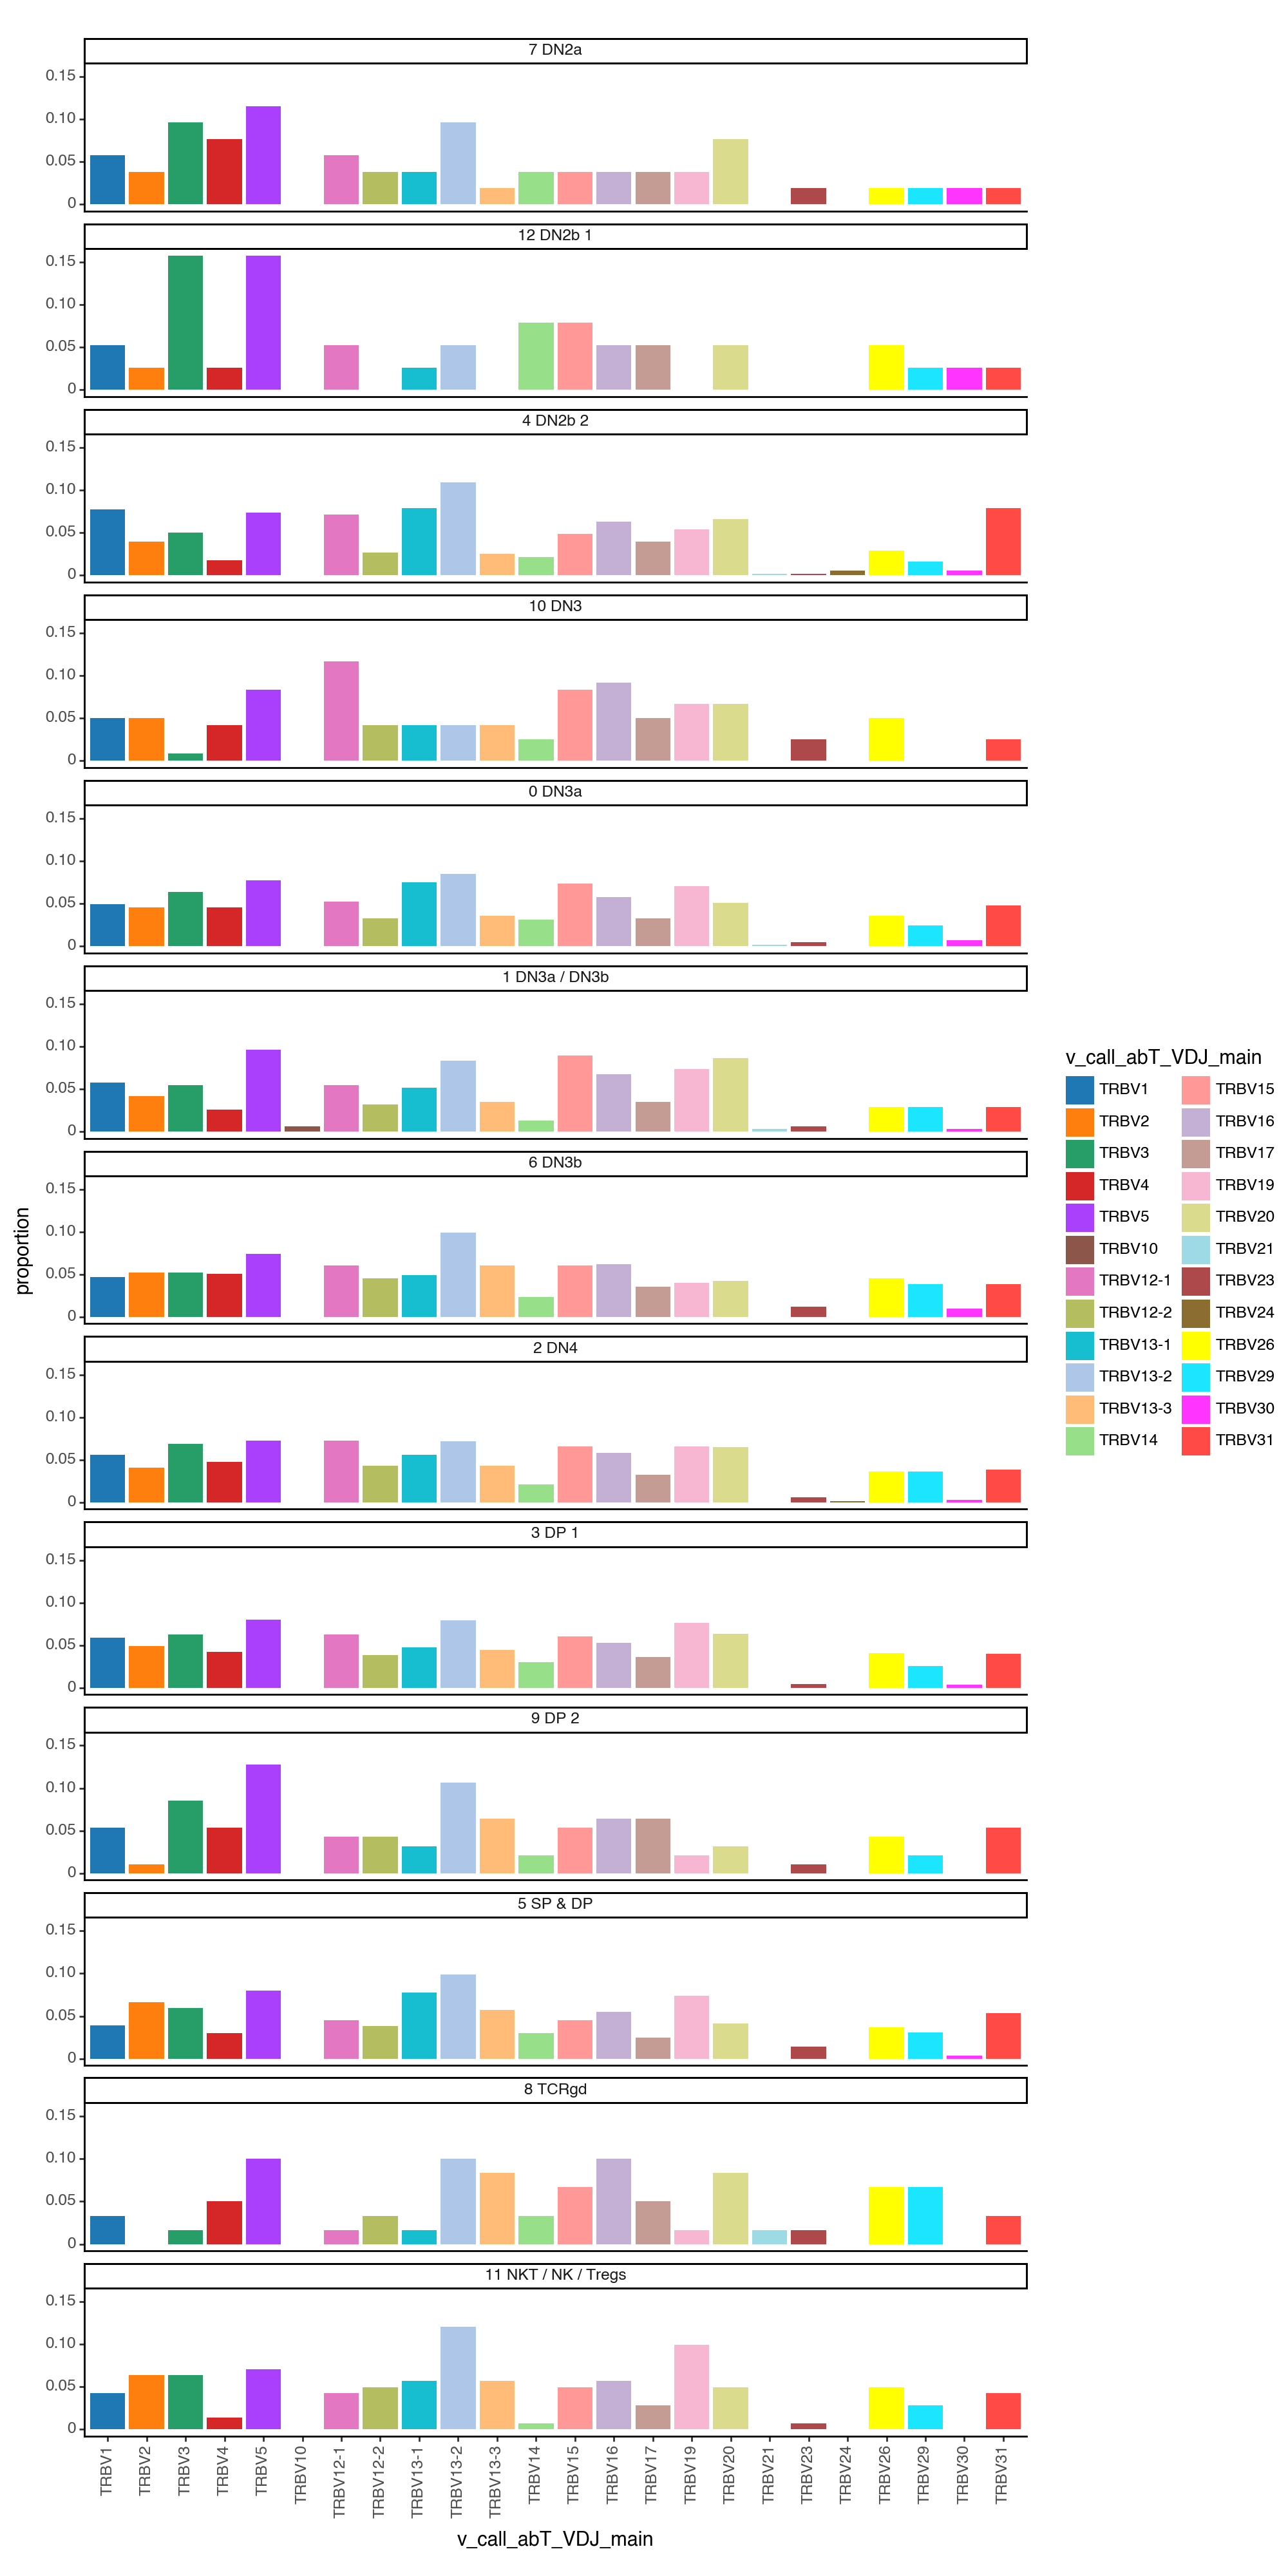

<Figure Size: (1000 x 2000)>

In [44]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="v_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

### J gene Beta Chain (ALL SAMPLES)

In [45]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [46]:
adata_PF

View of AnnData object with n_obs × n_vars = 8094 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [47]:
working_df = pd.DataFrame(adata_PF.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                         
0 DN3a    TRBJ2-7                                   90
          TRBJ2-5                                   86
          TRBJ2-4                                   80
          TRBJ1-1                                   65
          TRBJ2-1                                   60
...                                                ...
12 DN2b 1 TRBJ1-5,TRBJ2-2                            0
          TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
          TRBJ2-3,TRBJ2-4                            0
          TRBJ2-5,TRBJ2-4                            0
          TRBJ2-6                                    0

[221 rows x 1 columns]

In [48]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden      j_call_abT_VDJ_main  counts
0       0 DN3a                  TRBJ2-7      90
1       0 DN3a                  TRBJ2-5      86
2       0 DN3a                  TRBJ2-4      80
3       0 DN3a                  TRBJ1-1      65
4       0 DN3a                  TRBJ2-1      60
..         ...                      ...     ...
216  12 DN2b 1          TRBJ1-5,TRBJ2-2       0
217  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
218  12 DN2b 1          TRBJ2-3,TRBJ2-4       0
219  12 DN2b 1          TRBJ2-5,TRBJ2-4       0
220  12 DN2b 1                  TRBJ2-6       0

[221 rows x 3 columns]

In [49]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 621,
 '1 DN3a / DN3b': 320,
 '2 DN4': 2139,
 '3 DP 1': 2440,
 '4 DN2b 2': 584,
 '5 SP & DP': 865,
 '6 DN3b': 608,
 '7 DN2a': 53,
 '8 TCRgd': 62,
 '9 DP 2': 96,
 '10 DN3': 121,
 '11 NKT / NK / Tregs': 147,
 '12 DN2b 1': 38}

In [50]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [51]:
working_df

leiden      j_call_abT_VDJ_main  counts  proportion
0       0 DN3a                  TRBJ2-7      90    0.144928
1       0 DN3a                  TRBJ2-5      86    0.138486
2       0 DN3a                  TRBJ2-4      80    0.128824
3       0 DN3a                  TRBJ1-1      65    0.104670
4       0 DN3a                  TRBJ2-1      60    0.096618
..         ...                      ...     ...         ...
216  12 DN2b 1          TRBJ1-5,TRBJ2-2       0    0.000000
217  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000
218  12 DN2b 1          TRBJ2-3,TRBJ2-4       0    0.000000
219  12 DN2b 1          TRBJ2-5,TRBJ2-4       0    0.000000
220  12 DN2b 1                  TRBJ2-6       0    0.000000

[221 rows x 4 columns]

In [52]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

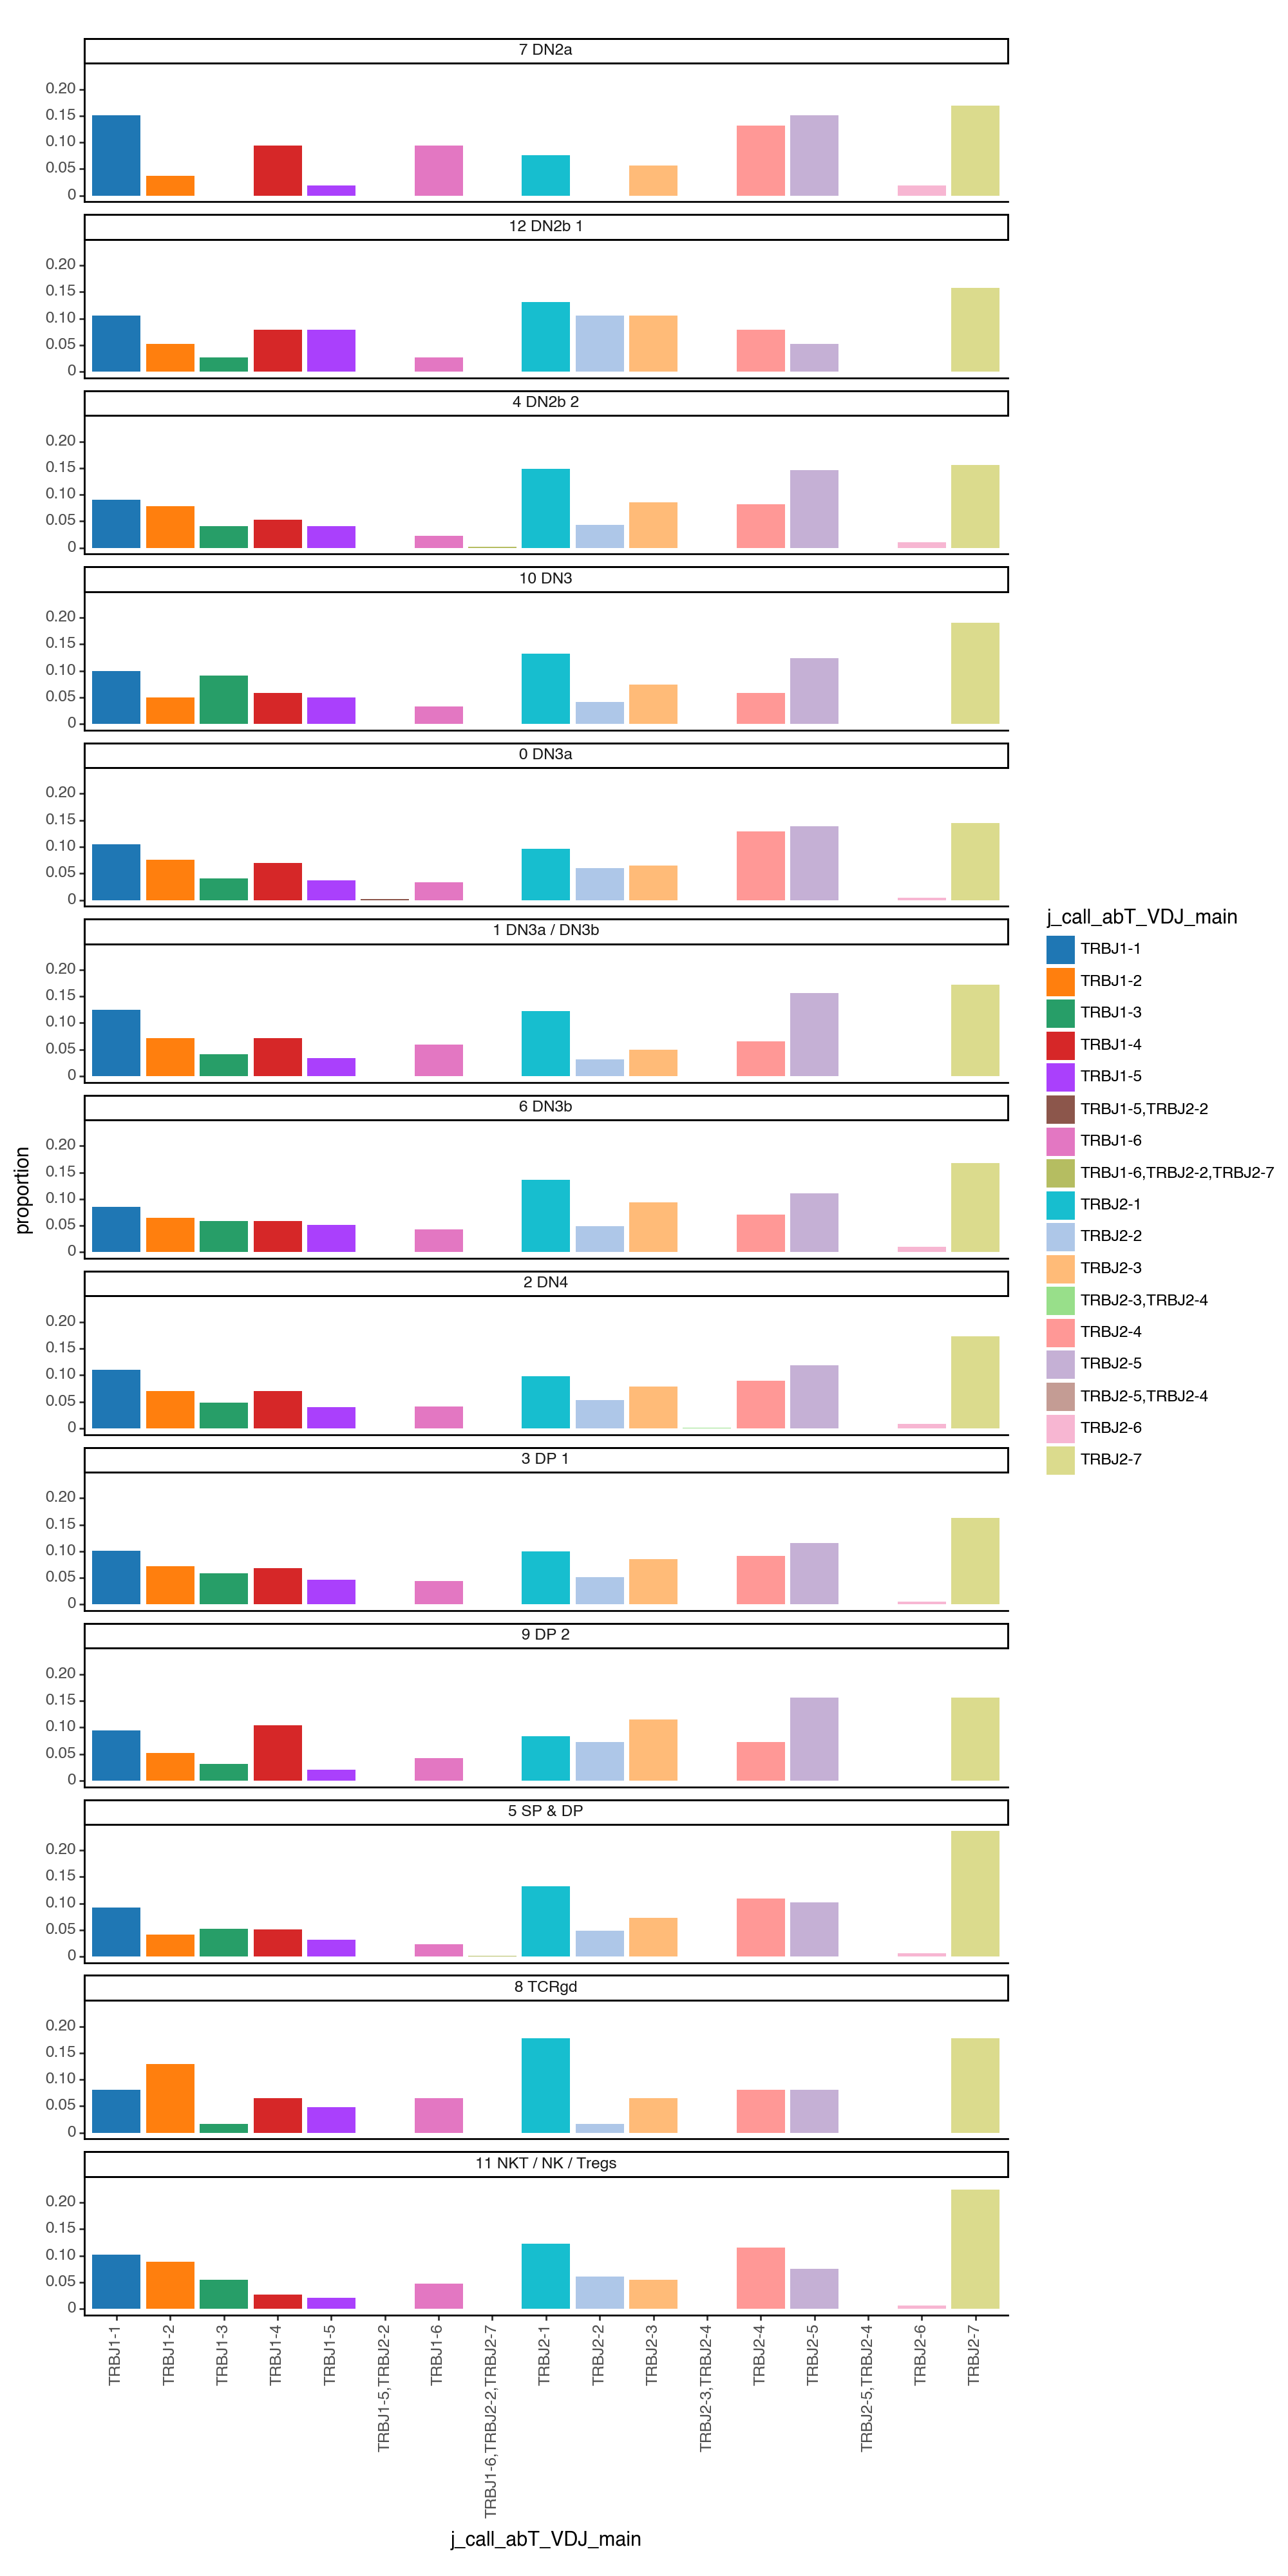

<Figure Size: (1000 x 2000)>

In [53]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="j_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

### V gene Alpha Chain (ALL SAMPLES)

In [54]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VJ_main"] != "No_contig"]

In [55]:
adata_PF

View of AnnData object with n_obs × n_vars = 2530 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [56]:
working_df = pd.DataFrame(adata_PF.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                    
0 DN3a    TRAV13-1                             3
          TRAV10N                              2
          TRAV6D-7,TRAV6N-7                    2
          TRAV13-2                             2
          TRAV4D-3,TRAV4-3                     2
...                                          ...
12 DN2b 1 TRAV7-3                              0
          TRAV7-2                              0
          TRAV7-1                              0
          TRAV6N-6                             0
          TRAV21/DV12                          0

[1391 rows x 1 columns]

In [57]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_abT_VJ_main  counts
0        0 DN3a           TRAV13-1       3
1        0 DN3a            TRAV10N       2
2        0 DN3a  TRAV6D-7,TRAV6N-7       2
3        0 DN3a           TRAV13-2       2
4        0 DN3a   TRAV4D-3,TRAV4-3       2
...         ...                ...     ...
1386  12 DN2b 1            TRAV7-3       0
1387  12 DN2b 1            TRAV7-2       0
1388  12 DN2b 1            TRAV7-1       0
1389  12 DN2b 1           TRAV6N-6       0
1390  12 DN2b 1        TRAV21/DV12       0

[1391 rows x 3 columns]

In [58]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 35,
 '1 DN3a / DN3b': 43,
 '2 DN4': 393,
 '3 DP 1': 923,
 '4 DN2b 2': 95,
 '5 SP & DP': 812,
 '6 DN3b': 27,
 '7 DN2a': 17,
 '8 TCRgd': 13,
 '9 DP 2': 17,
 '10 DN3': 8,
 '11 NKT / NK / Tregs': 139,
 '12 DN2b 1': 8}

In [59]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [60]:
working_df

leiden v_call_abT_VJ_main  counts  proportion
0        0 DN3a           TRAV13-1       3    0.085714
1        0 DN3a            TRAV10N       2    0.057143
2        0 DN3a  TRAV6D-7,TRAV6N-7       2    0.057143
3        0 DN3a           TRAV13-2       2    0.057143
4        0 DN3a   TRAV4D-3,TRAV4-3       2    0.057143
...         ...                ...     ...         ...
1386  12 DN2b 1            TRAV7-3       0    0.000000
1387  12 DN2b 1            TRAV7-2       0    0.000000
1388  12 DN2b 1            TRAV7-1       0    0.000000
1389  12 DN2b 1           TRAV6N-6       0    0.000000
1390  12 DN2b 1        TRAV21/DV12       0    0.000000

[1391 rows x 4 columns]

In [61]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

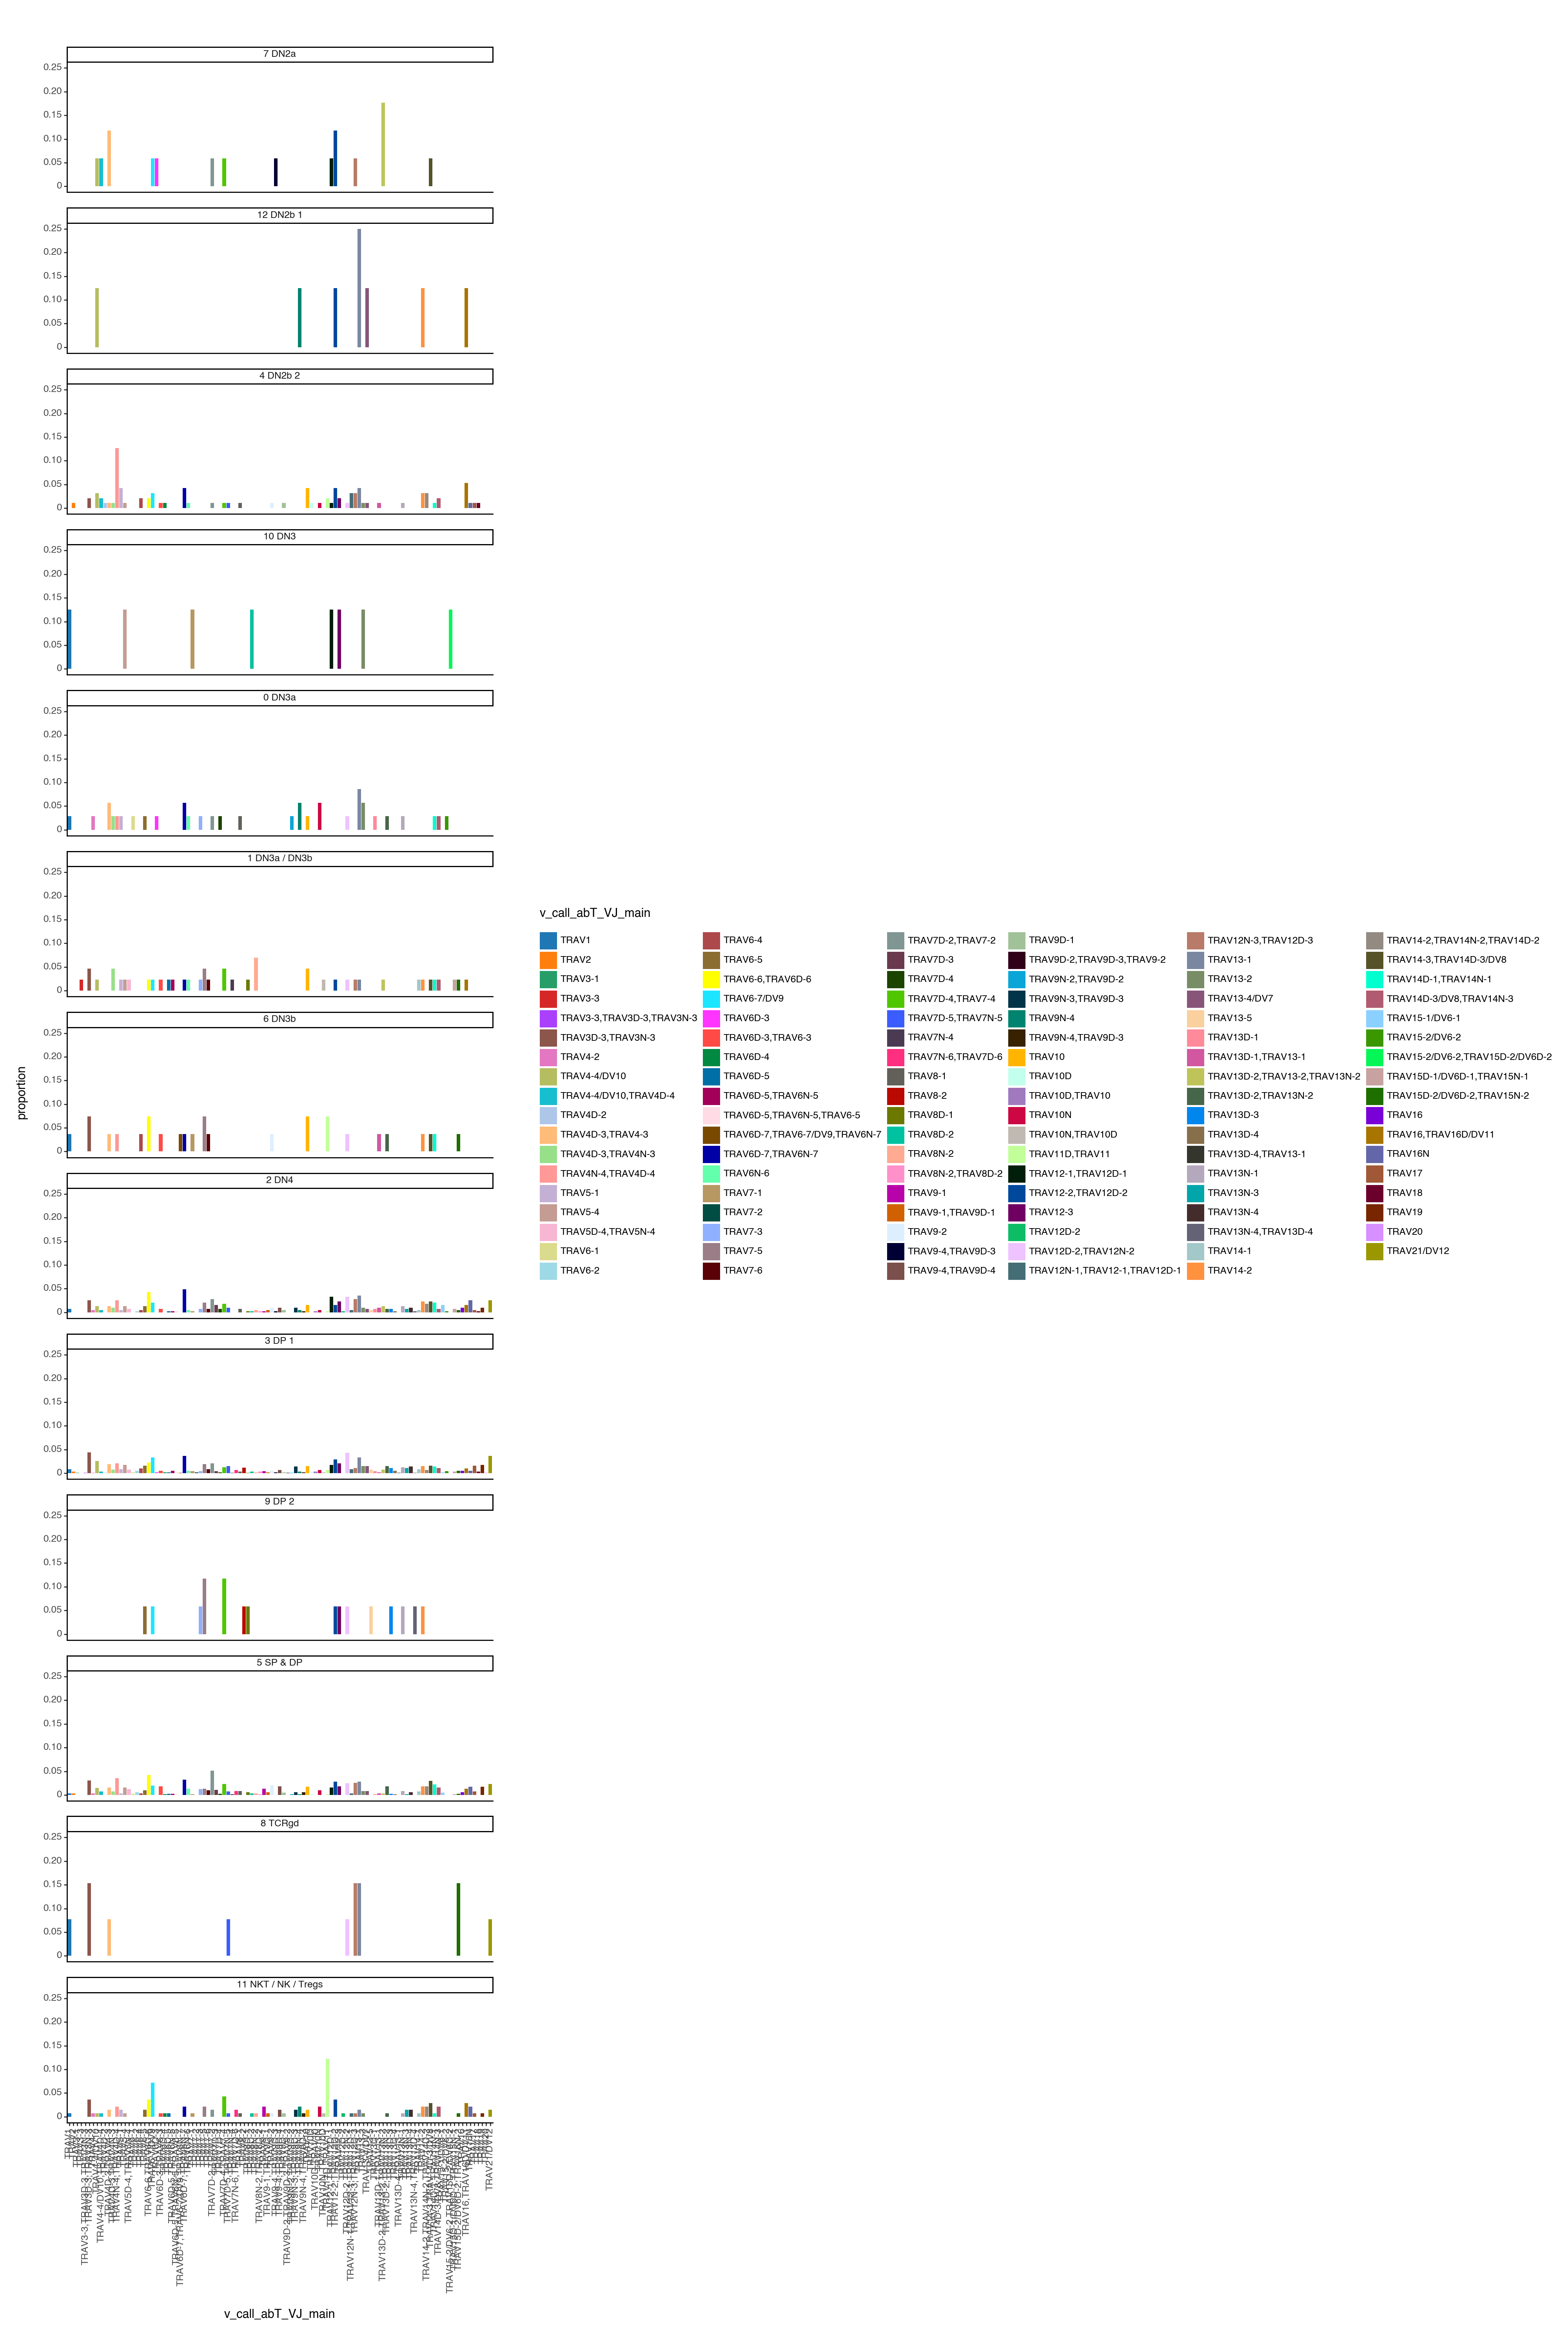

<Figure Size: (2000 x 3000)>

In [62]:
options.figure_size = (20, 30)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="v_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

### J gene Alpha Chain (ALL samples)

In [63]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VJ_main"] != "No_contig"]

In [64]:
adata_PF

View of AnnData object with n_obs × n_vars = 2595 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [65]:
working_df = pd.DataFrame(adata_PF.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
leiden    j_call_abT_VJ_main                    
0 DN3a    TRAJ12                               3
          TRAJ15                               3
          TRAJ40                               3
          TRAJ13                               3
          TRAJ34                               2
...                                          ...
12 DN2b 1 TRAJ27                               0
          TRAJ28                               0
          TRAJ30                               0
          TRAJ31                               0
          TRDJ1                                0

[650 rows x 1 columns]

In [66]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden j_call_abT_VJ_main  counts
0       0 DN3a             TRAJ12       3
1       0 DN3a             TRAJ15       3
2       0 DN3a             TRAJ40       3
3       0 DN3a             TRAJ13       3
4       0 DN3a             TRAJ34       2
..         ...                ...     ...
645  12 DN2b 1             TRAJ27       0
646  12 DN2b 1             TRAJ28       0
647  12 DN2b 1             TRAJ30       0
648  12 DN2b 1             TRAJ31       0
649  12 DN2b 1              TRDJ1       0

[650 rows x 3 columns]

In [67]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 36,
 '1 DN3a / DN3b': 44,
 '2 DN4': 418,
 '3 DP 1': 944,
 '4 DN2b 2': 103,
 '5 SP & DP': 816,
 '6 DN3b': 28,
 '7 DN2a': 17,
 '8 TCRgd': 14,
 '9 DP 2': 17,
 '10 DN3': 11,
 '11 NKT / NK / Tregs': 139,
 '12 DN2b 1': 8}

In [68]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [69]:
working_df

leiden j_call_abT_VJ_main  counts  proportion
0       0 DN3a             TRAJ12       3    0.083333
1       0 DN3a             TRAJ15       3    0.083333
2       0 DN3a             TRAJ40       3    0.083333
3       0 DN3a             TRAJ13       3    0.083333
4       0 DN3a             TRAJ34       2    0.055556
..         ...                ...     ...         ...
645  12 DN2b 1             TRAJ27       0    0.000000
646  12 DN2b 1             TRAJ28       0    0.000000
647  12 DN2b 1             TRAJ30       0    0.000000
648  12 DN2b 1             TRAJ31       0    0.000000
649  12 DN2b 1              TRDJ1       0    0.000000

[650 rows x 4 columns]

In [70]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

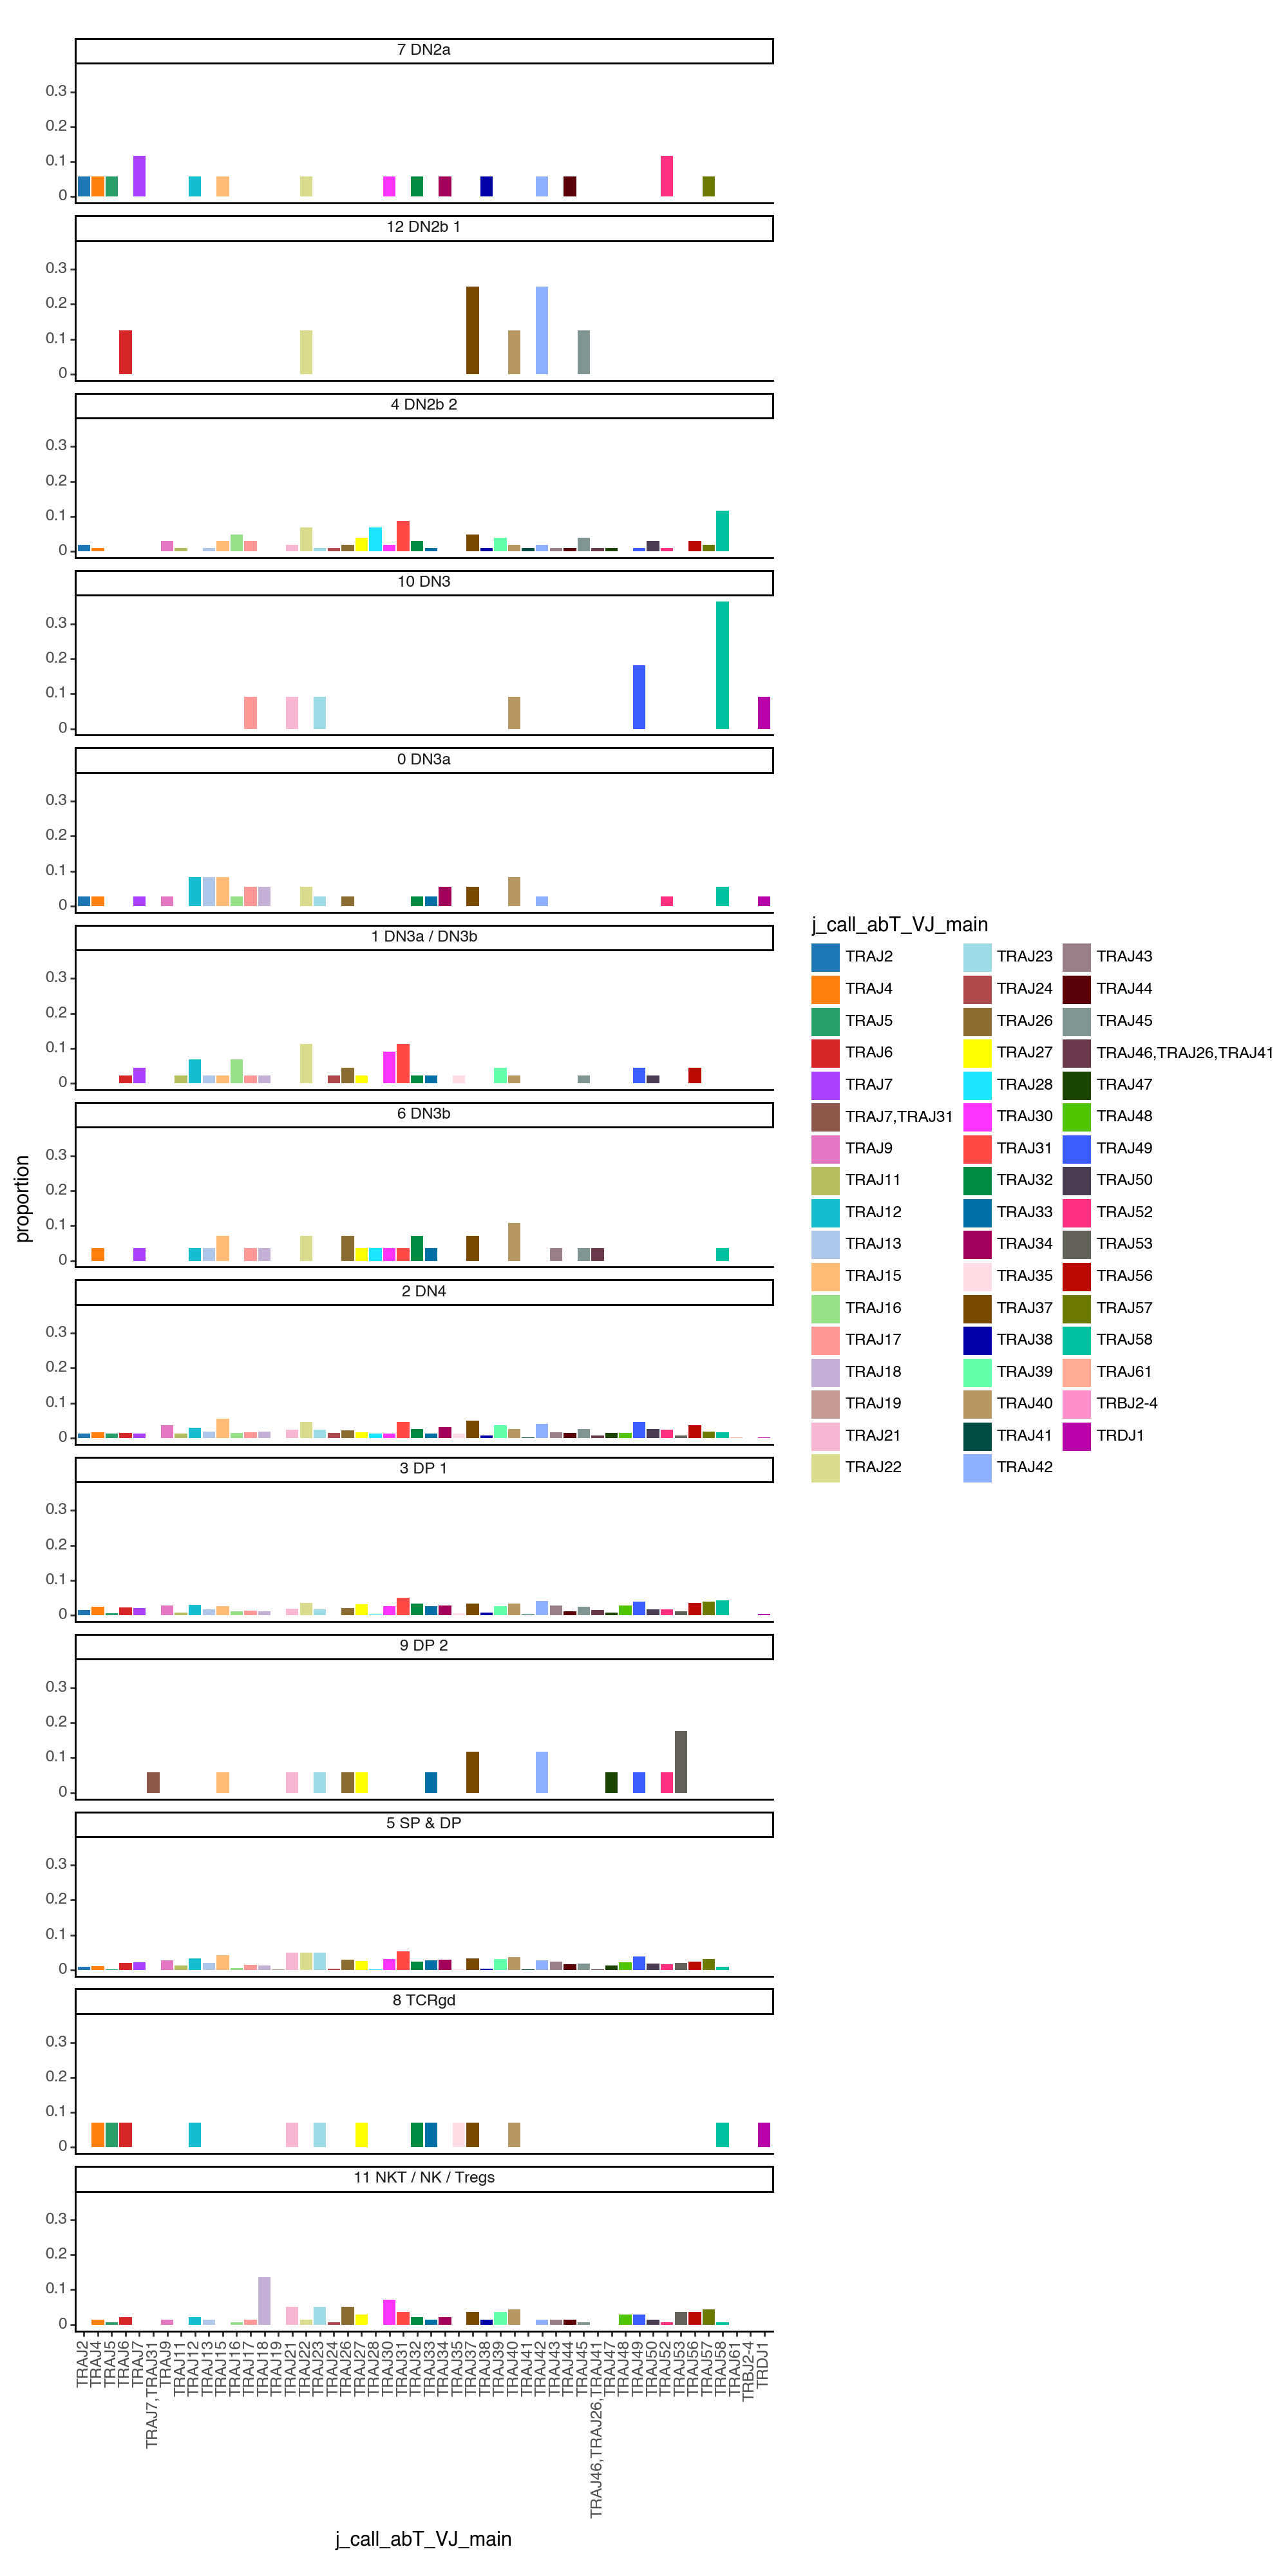

<Figure Size: (1000 x 2000)>

In [71]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="j_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

# Create heatmap

## First... get matrix - work with control first.. 

In [72]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [73]:
adata_PF

View of AnnData object with n_obs × n_vars = 7896 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [74]:
adata_PF_C = adata_PF[adata_PF.obs["Sample"] == "Control"]
adata_PF_C

View of AnnData object with n_obs × n_vars = 5141 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [75]:
working_df1C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df1C

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    TRBV13-2                              33
          TRBV15                                30
          TRBV13-1                              30
          TRBV5                                 27
          TRBV3                                 24
...                                            ...
12 DN2b 1 TRBV23                                 0
          TRBV21                                 0
          TRBV10                                 0
          TRBV13-3                               0
          TRBV19                                 0

[312 rows x 1 columns]

In [76]:
working_df1C.columns =["counts"]
working_df1C

counts
leiden    v_call_abT_VDJ_main        
0 DN3a    TRBV13-2                 33
          TRBV15                   30
          TRBV13-1                 30
          TRBV5                    27
          TRBV3                    24
...                               ...
12 DN2b 1 TRBV23                    0
          TRBV21                    0
          TRBV10                    0
          TRBV13-3                  0
          TRBV19                    0

[312 rows x 1 columns]

In [77]:
working_df1C.reset_index(inplace = True)
working_df1C

leiden v_call_abT_VDJ_main  counts
0       0 DN3a            TRBV13-2      33
1       0 DN3a              TRBV15      30
2       0 DN3a            TRBV13-1      30
3       0 DN3a               TRBV5      27
4       0 DN3a               TRBV3      24
..         ...                 ...     ...
307  12 DN2b 1              TRBV23       0
308  12 DN2b 1              TRBV21       0
309  12 DN2b 1              TRBV10       0
310  12 DN2b 1            TRBV13-3       0
311  12 DN2b 1              TRBV19       0

[312 rows x 3 columns]

In [78]:
newdf1 = working_df1C.pivot(index='leiden', columns='v_call_abT_VDJ_main', values='counts')
print(newdf1)

v_call_abT_VDJ_main  TRBV1  TRBV2  TRBV3  TRBV4  TRBV5  TRBV10  TRBV12-1  \
leiden                                                                     
0 DN3a                  19     18     24     23     27       0        24   
1 DN3a / DN3b           11     11      9      5     22       2        13   
2 DN4                   82     56    103     61    103       0        91   
3 DP 1                  79     71     90     63    119       0        87   
4 DN2b 2                27     17     19      9     32       0        30   
5 SP & DP               23     29     34     18     44       0        26   
6 DN3b                  19     17     17     20     29       0        25   
7 DN2a                   2      2      3      4      5       0         3   
8 TCRgd                  1      0      1      3      5       0         1   
9 DP 2                   4      1      5      4      8       0         4   
10 DN3                   5      6      1      4      7       0        10   
11 NKT / NK 

## Get the J gene too.. 

In [79]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [80]:
adata_PF

View of AnnData object with n_obs × n_vars = 8094 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [81]:
adata_PF_C = adata_PF[adata_PF.obs["Sample"] == "Control"]
adata_PF_C

View of AnnData object with n_obs × n_vars = 5287 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [82]:
working_df2C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df2C

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                         
0 DN3a    TRBJ2-7                                   60
          TRBJ2-5                                   54
          TRBJ2-4                                   51
          TRBJ1-1                                   47
          TRBJ2-1                                   41
...                                                ...
12 DN2b 1 TRBJ1-6                                    0
          TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
          TRBJ2-3,TRBJ2-4                            0
          TRBJ2-5,TRBJ2-4                            0
          TRBJ2-6                                    0

[221 rows x 1 columns]

In [83]:
working_df2C.columns =["counts"]
working_df2C

counts
leiden    j_call_abT_VDJ_main            
0 DN3a    TRBJ2-7                      60
          TRBJ2-5                      54
          TRBJ2-4                      51
          TRBJ1-1                      47
          TRBJ2-1                      41
...                                   ...
12 DN2b 1 TRBJ1-6                       0
          TRBJ1-6,TRBJ2-2,TRBJ2-7       0
          TRBJ2-3,TRBJ2-4               0
          TRBJ2-5,TRBJ2-4               0
          TRBJ2-6                       0

[221 rows x 1 columns]

In [84]:
working_df2C.reset_index(inplace = True)
working_df2C

leiden      j_call_abT_VDJ_main  counts
0       0 DN3a                  TRBJ2-7      60
1       0 DN3a                  TRBJ2-5      54
2       0 DN3a                  TRBJ2-4      51
3       0 DN3a                  TRBJ1-1      47
4       0 DN3a                  TRBJ2-1      41
..         ...                      ...     ...
216  12 DN2b 1                  TRBJ1-6       0
217  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
218  12 DN2b 1          TRBJ2-3,TRBJ2-4       0
219  12 DN2b 1          TRBJ2-5,TRBJ2-4       0
220  12 DN2b 1                  TRBJ2-6       0

[221 rows x 3 columns]

In [85]:
newdf2 = working_df2C.pivot(index='leiden', columns='j_call_abT_VDJ_main', values='counts')
print(newdf2)

j_call_abT_VDJ_main  TRBJ1-1  TRBJ1-2  TRBJ1-3  TRBJ1-4  TRBJ1-5  \
leiden                                                             
0 DN3a                    47       28       17       35       11   
1 DN3a / DN3b             26       17       13       15        6   
2 DN4                    162       95       71      100       54   
3 DP 1                   151      117       97      108       64   
4 DN2b 2                  34       38       19       24       11   
5 SP & DP                 54       21       27       31       18   
6 DN3b                    32       25       22       13       15   
7 DN2a                     6        2        0        4        1   
8 TCRgd                    3        7        1        3        2   
9 DP 2                     5        4        2        8        2   
10 DN3                     6        6        9        5        5   
11 NKT / NK / Tregs       10        8        5        3        3   
12 DN2b 1                  3        2        1  

In [86]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TRBV1     13 non-null     int64
 1   TRBV2     13 non-null     int64
 2   TRBV3     13 non-null     int64
 3   TRBV4     13 non-null     int64
 4   TRBV5     13 non-null     int64
 5   TRBV10    13 non-null     int64
 6   TRBV12-1  13 non-null     int64
 7   TRBV12-2  13 non-null     int64
 8   TRBV13-1  13 non-null     int64
 9   TRBV13-2  13 non-null     int64
 10  TRBV13-3  13 non-null     int64
 11  TRBV14    13 non-null     int64
 12  TRBV15    13 non-null     int64
 13  TRBV16    13 non-null     int64
 14  TRBV17    13 non-null     int64
 15  TRBV19    13 non-null     int64
 16  TRBV20    13 non-null     int64
 17  TRBV21    13 non-null     int64
 18  TRBV23    13 non-null     int64
 19  TRBV24    13 non-null     int64
 20  TRBV26    13 non-null     int64
 21  TRBV29    13 non-null  

In [87]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   TRBJ1-1                  13 non-null     int64
 1   TRBJ1-2                  13 non-null     int64
 2   TRBJ1-3                  13 non-null     int64
 3   TRBJ1-4                  13 non-null     int64
 4   TRBJ1-5                  13 non-null     int64
 5   TRBJ1-5,TRBJ2-2          13 non-null     int64
 6   TRBJ1-6                  13 non-null     int64
 7   TRBJ1-6,TRBJ2-2,TRBJ2-7  13 non-null     int64
 8   TRBJ2-1                  13 non-null     int64
 9   TRBJ2-2                  13 non-null     int64
 10  TRBJ2-3                  13 non-null     int64
 11  TRBJ2-3,TRBJ2-4          13 non-null     int64
 12  TRBJ2-4                  13 non-null     int64
 13  TRBJ2-5                  13 non-null     int64
 14  TRBJ2-5,TRBJ2-4          13 non-null     i

In [88]:
result = pd.merge(newdf1, newdf2, on=["leiden"])

In [89]:
print(result)

                     TRBV1  TRBV2  TRBV3  TRBV4  TRBV5  TRBV10  TRBV12-1  \
leiden                                                                     
0 DN3a                  19     18     24     23     27       0        24   
1 DN3a / DN3b           11     11      9      5     22       2        13   
2 DN4                   82     56    103     61    103       0        91   
3 DP 1                  79     71     90     63    119       0        87   
4 DN2b 2                27     17     19      9     32       0        30   
5 SP & DP               23     29     34     18     44       0        26   
6 DN3b                  19     17     17     20     29       0        25   
7 DN2a                   2      2      3      4      5       0         3   
8 TCRgd                  1      0      1      3      5       0         1   
9 DP 2                   4      1      5      4      8       0         4   
10 DN3                   5      6      1      4      7       0        10   
11 NKT / NK 

In [90]:
result.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   TRBV1                    13 non-null     int64
 1   TRBV2                    13 non-null     int64
 2   TRBV3                    13 non-null     int64
 3   TRBV4                    13 non-null     int64
 4   TRBV5                    13 non-null     int64
 5   TRBV10                   13 non-null     int64
 6   TRBV12-1                 13 non-null     int64
 7   TRBV12-2                 13 non-null     int64
 8   TRBV13-1                 13 non-null     int64
 9   TRBV13-2                 13 non-null     int64
 10  TRBV13-3                 13 non-null     int64
 11  TRBV14                   13 non-null     int64
 12  TRBV15                   13 non-null     int64
 13  TRBV16                   13 non-null     int64
 14  TRBV17                   13 non-null     i

In [91]:
import seaborn as sns
%matplotlib inline

<Axes: ylabel='leiden'>

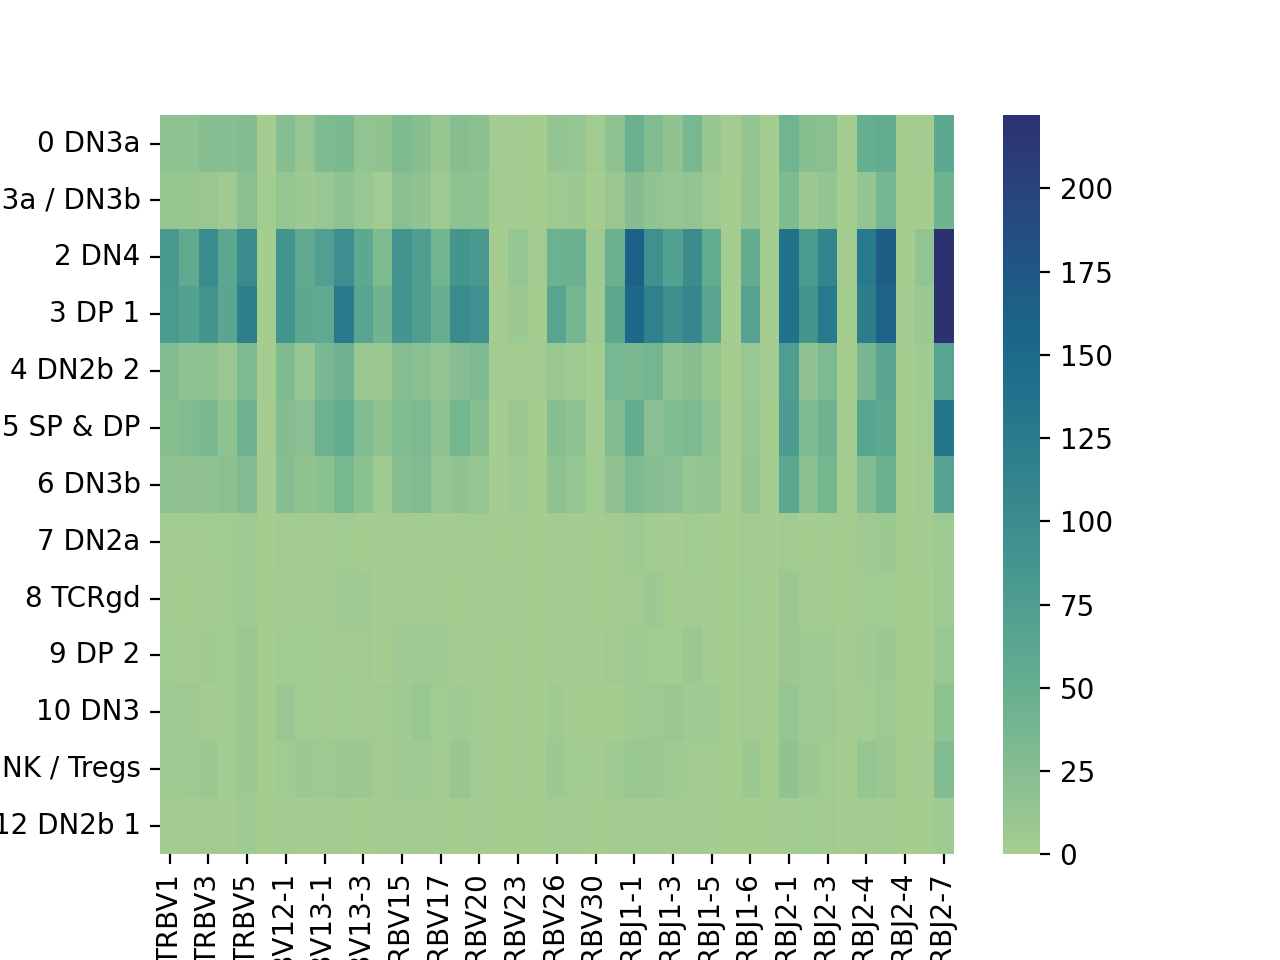

In [92]:
sns.heatmap(result, cmap="crest")

### Redo as proportion

In [93]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [94]:
adata_PF

View of AnnData object with n_obs × n_vars = 7896 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [95]:
adata_PF_C = adata_PF[adata_PF.obs["Sample"] == "Control"]
adata_PF_C

View of AnnData object with n_obs × n_vars = 5141 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [96]:
working_df1C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df1C

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    TRBV13-2                              33
          TRBV15                                30
          TRBV13-1                              30
          TRBV5                                 27
          TRBV3                                 24
...                                            ...
12 DN2b 1 TRBV23                                 0
          TRBV21                                 0
          TRBV10                                 0
          TRBV13-3                               0
          TRBV19                                 0

[312 rows x 1 columns]

In [97]:
working_df1C.columns =["counts"]
working_df1C

counts
leiden    v_call_abT_VDJ_main        
0 DN3a    TRBV13-2                 33
          TRBV15                   30
          TRBV13-1                 30
          TRBV5                    27
          TRBV3                    24
...                               ...
12 DN2b 1 TRBV23                    0
          TRBV21                    0
          TRBV10                    0
          TRBV13-3                  0
          TRBV19                    0

[312 rows x 1 columns]

In [98]:
working_df1C.reset_index(inplace = True)
working_df1C

leiden v_call_abT_VDJ_main  counts
0       0 DN3a            TRBV13-2      33
1       0 DN3a              TRBV15      30
2       0 DN3a            TRBV13-1      30
3       0 DN3a               TRBV5      27
4       0 DN3a               TRBV3      24
..         ...                 ...     ...
307  12 DN2b 1              TRBV23       0
308  12 DN2b 1              TRBV21       0
309  12 DN2b 1              TRBV10       0
310  12 DN2b 1            TRBV13-3       0
311  12 DN2b 1              TRBV19       0

[312 rows x 3 columns]

In [99]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df1C.leiden.unique():
    tmp = working_df1C[working_df1C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 401,
 '1 DN3a / DN3b': 229,
 '2 DN4': 1348,
 '3 DP 1': 1448,
 '4 DN2b 2': 414,
 '5 SP & DP': 558,
 '6 DN3b': 379,
 '7 DN2a': 40,
 '8 TCRgd': 43,
 '9 DP 2': 62,
 '10 DN3': 85,
 '11 NKT / NK / Tregs': 106,
 '12 DN2b 1': 28}

In [100]:
working_df1C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df1C.iterrows():
    try:
        working_df1C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [101]:
working_df1C

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a            TRBV13-2      33    0.082294
1       0 DN3a              TRBV15      30    0.074813
2       0 DN3a            TRBV13-1      30    0.074813
3       0 DN3a               TRBV5      27    0.067332
4       0 DN3a               TRBV3      24    0.059850
..         ...                 ...     ...         ...
307  12 DN2b 1              TRBV23       0    0.000000
308  12 DN2b 1              TRBV21       0    0.000000
309  12 DN2b 1              TRBV10       0    0.000000
310  12 DN2b 1            TRBV13-3       0    0.000000
311  12 DN2b 1              TRBV19       0    0.000000

[312 rows x 4 columns]

In [102]:
newdf1 = working_df1C.pivot(index='leiden', columns='v_call_abT_VDJ_main', values='proportion')
print(newdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.047382  0.044888  0.059850  0.057357  0.067332   
1 DN3a / DN3b        0.048035  0.048035  0.039301  0.021834  0.096070   
2 DN4                0.060831  0.041543  0.076409  0.045252  0.076409   
3 DP 1               0.054558  0.049033  0.062155  0.043508  0.082182   
4 DN2b 2             0.065217  0.041063  0.045894  0.021739  0.077295   
5 SP & DP            0.041219  0.051971  0.060932  0.032258  0.078853   
6 DN3b               0.050132  0.044855  0.044855  0.052770  0.076517   
7 DN2a               0.050000  0.050000  0.075000  0.100000  0.125000   
8 TCRgd              0.023256  0.000000  0.023256  0.069767  0.116279   
9 DP 2               0.064516  0.016129  0.080645  0.064516  0.129032   
10 DN3               0.058824  0.070588  0.011765  0.047059  0.082353   
11 NKT / NK / Tregs  0.047170  0.056604  0.075472  

In [103]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='v_call_abT_VDJ_main', ylabel='leiden'>

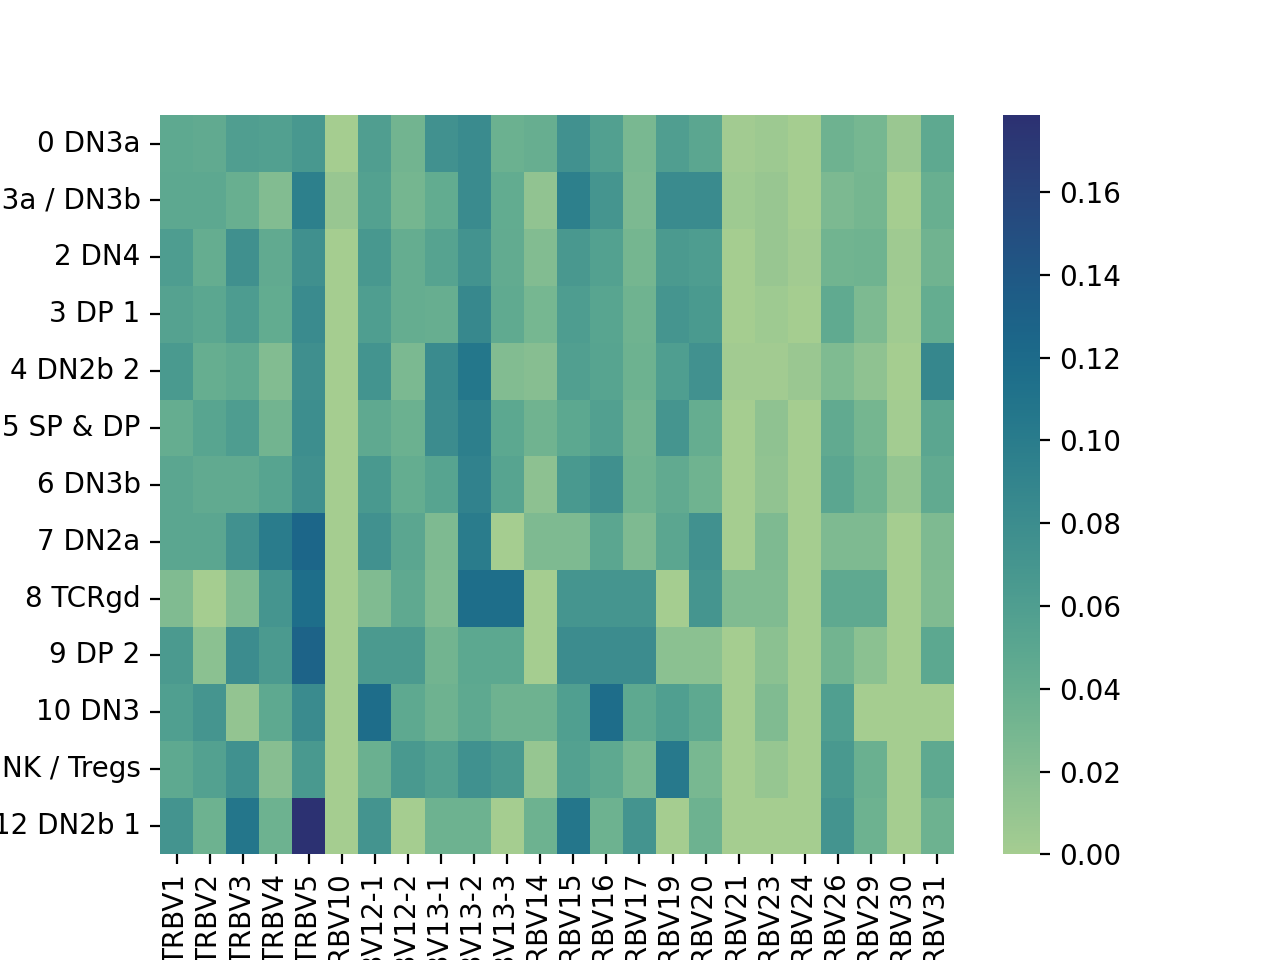

In [104]:
sns.heatmap(newdf1, cmap="crest")

#### Now get the rest of the VJ genes...
#### Here, J gene Beta Chain 

In [105]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [106]:
adata_PF

View of AnnData object with n_obs × n_vars = 8094 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [107]:
adata_PF_C = adata_PF[adata_PF.obs["Sample"] == "Control"]
adata_PF_C

View of AnnData object with n_obs × n_vars = 5287 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [108]:
working_df2C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df2C

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                         
0 DN3a    TRBJ2-7                                   60
          TRBJ2-5                                   54
          TRBJ2-4                                   51
          TRBJ1-1                                   47
          TRBJ2-1                                   41
...                                                ...
12 DN2b 1 TRBJ1-6                                    0
          TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
          TRBJ2-3,TRBJ2-4                            0
          TRBJ2-5,TRBJ2-4                            0
          TRBJ2-6                                    0

[221 rows x 1 columns]

In [109]:
working_df2C.columns =["counts"]
working_df2C

counts
leiden    j_call_abT_VDJ_main            
0 DN3a    TRBJ2-7                      60
          TRBJ2-5                      54
          TRBJ2-4                      51
          TRBJ1-1                      47
          TRBJ2-1                      41
...                                   ...
12 DN2b 1 TRBJ1-6                       0
          TRBJ1-6,TRBJ2-2,TRBJ2-7       0
          TRBJ2-3,TRBJ2-4               0
          TRBJ2-5,TRBJ2-4               0
          TRBJ2-6                       0

[221 rows x 1 columns]

In [110]:
working_df2C.reset_index(inplace = True)
working_df2C

leiden      j_call_abT_VDJ_main  counts
0       0 DN3a                  TRBJ2-7      60
1       0 DN3a                  TRBJ2-5      54
2       0 DN3a                  TRBJ2-4      51
3       0 DN3a                  TRBJ1-1      47
4       0 DN3a                  TRBJ2-1      41
..         ...                      ...     ...
216  12 DN2b 1                  TRBJ1-6       0
217  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
218  12 DN2b 1          TRBJ2-3,TRBJ2-4       0
219  12 DN2b 1          TRBJ2-5,TRBJ2-4       0
220  12 DN2b 1                  TRBJ2-6       0

[221 rows x 3 columns]

In [111]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df2C.leiden.unique():
    tmp = working_df2C[working_df1C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_23849/2365146967.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{'0 DN3a': 587,
 '1 DN3a / DN3b': 1450,
 '2 DN4': 1721,
 '3 DP 1': 750,
 '4 DN2b 2': 413,
 '5 SP & DP': 72,
 '6 DN3b': 69,
 '7 DN2a': 159,
 '8 TCRgd': 66,
 '9 DP 2': 0,
 '10 DN3': 0,
 '11 NKT / NK / Tregs': 0,
 '12 DN2b 1': 0}

In [112]:
working_df2C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df2C.iterrows():
    try:
        working_df2C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_23849/915408193.py:5: RuntimeWarning: divide by zero encountered in scalar divide
/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_23849/915408193.py:5: RuntimeWarning: invalid value encountered in scalar divide


In [113]:
working_df2C

leiden      j_call_abT_VDJ_main  counts  proportion
0       0 DN3a                  TRBJ2-7      60    0.102215
1       0 DN3a                  TRBJ2-5      54    0.091993
2       0 DN3a                  TRBJ2-4      51    0.086882
3       0 DN3a                  TRBJ1-1      47    0.080068
4       0 DN3a                  TRBJ2-1      41    0.069847
..         ...                      ...     ...         ...
216  12 DN2b 1                  TRBJ1-6       0         NaN
217  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0         NaN
218  12 DN2b 1          TRBJ2-3,TRBJ2-4       0         NaN
219  12 DN2b 1          TRBJ2-5,TRBJ2-4       0         NaN
220  12 DN2b 1                  TRBJ2-6       0         NaN

[221 rows x 4 columns]

In [114]:
newdf2 = working_df2C.pivot(index='leiden', columns='j_call_abT_VDJ_main', values='proportion')
print(newdf2)

j_call_abT_VDJ_main   TRBJ1-1   TRBJ1-2   TRBJ1-3   TRBJ1-4   TRBJ1-5  \
leiden                                                                  
0 DN3a               0.080068  0.047700  0.028961  0.059625  0.018739   
1 DN3a / DN3b        0.017931  0.011724  0.008966  0.010345  0.004138   
2 DN4                0.094131  0.055200  0.041255  0.058106  0.031377   
3 DP 1               0.201333  0.156000  0.129333  0.144000  0.085333   
4 DN2b 2             0.082324  0.092010  0.046005  0.058111  0.026634   
5 SP & DP            0.750000  0.291667  0.375000  0.430556  0.250000   
6 DN3b               0.463768  0.362319  0.318841  0.188406  0.217391   
7 DN2a               0.037736  0.012579  0.000000  0.025157  0.006289   
8 TCRgd              0.045455  0.106061  0.015152  0.045455  0.030303   
9 DP 2                    inf       inf       inf       inf       inf   
10 DN3                    inf       inf       inf       inf       inf   
11 NKT / NK / Tregs       inf       inf       inf  

#### Now get V gene Alpha chain

In [115]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VJ_main"] != "No_contig"]

In [116]:
adata_PF

View of AnnData object with n_obs × n_vars = 2530 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [117]:
adata_PF_C = adata_PF[adata_PF.obs["Sample"] == "Control"]
adata_PF_C

View of AnnData object with n_obs × n_vars = 1444 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [118]:
working_df3C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df3C

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                         
0 DN3a    TRAV6D-7,TRAV6N-7                         2
          TRAV14D-3/DV8,TRAV14N-3                   1
          TRAV10                                    1
          TRAV10N                                   1
          TRAV12D-2,TRAV12N-2                       1
...                                               ...
12 DN2b 1 TRAV7-3                                   0
          TRAV7-2                                   0
          TRAV7-1                                   0
          TRAV6N-6                                  0
          TRAV21/DV12                               0

[1352 rows x 1 columns]

In [119]:
working_df3C.columns =["counts"]
working_df3C

counts
leiden    v_call_abT_VJ_main             
0 DN3a    TRAV6D-7,TRAV6N-7             2
          TRAV14D-3/DV8,TRAV14N-3       1
          TRAV10                        1
          TRAV10N                       1
          TRAV12D-2,TRAV12N-2           1
...                                   ...
12 DN2b 1 TRAV7-3                       0
          TRAV7-2                       0
          TRAV7-1                       0
          TRAV6N-6                      0
          TRAV21/DV12                   0

[1352 rows x 1 columns]

In [120]:
working_df3C.reset_index(inplace = True)
working_df3C

leiden       v_call_abT_VJ_main  counts
0        0 DN3a        TRAV6D-7,TRAV6N-7       2
1        0 DN3a  TRAV14D-3/DV8,TRAV14N-3       1
2        0 DN3a                   TRAV10       1
3        0 DN3a                  TRAV10N       1
4        0 DN3a      TRAV12D-2,TRAV12N-2       1
...         ...                      ...     ...
1347  12 DN2b 1                  TRAV7-3       0
1348  12 DN2b 1                  TRAV7-2       0
1349  12 DN2b 1                  TRAV7-1       0
1350  12 DN2b 1                 TRAV6N-6       0
1351  12 DN2b 1              TRAV21/DV12       0

[1352 rows x 3 columns]

In [121]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df3C.leiden.unique():
    tmp = working_df3C[working_df3C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 20,
 '1 DN3a / DN3b': 26,
 '2 DN4': 188,
 '3 DP 1': 454,
 '4 DN2b 2': 55,
 '5 SP & DP': 536,
 '6 DN3b': 15,
 '7 DN2a': 12,
 '8 TCRgd': 10,
 '9 DP 2': 10,
 '10 DN3': 6,
 '11 NKT / NK / Tregs': 109,
 '12 DN2b 1': 3}

In [122]:
working_df3C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df3C.iterrows():
    try:
        working_df3C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [123]:
working_df3C

leiden       v_call_abT_VJ_main  counts  proportion
0        0 DN3a        TRAV6D-7,TRAV6N-7       2        0.10
1        0 DN3a  TRAV14D-3/DV8,TRAV14N-3       1        0.05
2        0 DN3a                   TRAV10       1        0.05
3        0 DN3a                  TRAV10N       1        0.05
4        0 DN3a      TRAV12D-2,TRAV12N-2       1        0.05
...         ...                      ...     ...         ...
1347  12 DN2b 1                  TRAV7-3       0        0.00
1348  12 DN2b 1                  TRAV7-2       0        0.00
1349  12 DN2b 1                  TRAV7-1       0        0.00
1350  12 DN2b 1                 TRAV6N-6       0        0.00
1351  12 DN2b 1              TRAV21/DV12       0        0.00

[1352 rows x 4 columns]

In [124]:
newdf3 = working_df3C.pivot(index='leiden', columns='v_call_abT_VJ_main', values='proportion')
print(newdf3)

v_call_abT_VJ_main      TRAV1     TRAV2   TRAV3-3  TRAV3-3,TRAV3D-3,TRAV3N-3  \
leiden                                                                         
0 DN3a               0.050000  0.000000  0.000000                   0.000000   
1 DN3a / DN3b        0.000000  0.000000  0.038462                   0.000000   
2 DN4                0.005319  0.000000  0.000000                   0.000000   
3 DP 1               0.008811  0.002203  0.000000                   0.002203   
4 DN2b 2             0.000000  0.000000  0.000000                   0.000000   
5 SP & DP            0.001866  0.001866  0.000000                   0.000000   
6 DN3b               0.000000  0.000000  0.000000                   0.000000   
7 DN2a               0.000000  0.000000  0.000000                   0.000000   
8 TCRgd              0.100000  0.000000  0.000000                   0.000000   
9 DP 2               0.000000  0.000000  0.000000                   0.000000   
10 DN3               0.166667  0.000000 

#### Now get J gene Alpha chain

In [125]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VJ_main"] != "No_contig"]

In [126]:
adata_PF

View of AnnData object with n_obs × n_vars = 2595 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [127]:
adata_PF_C = adata_PF[adata_PF.obs["Sample"] == "Control"]
adata_PF_C

View of AnnData object with n_obs × n_vars = 1490 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [128]:
working_df4C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df4C

j_call_abT_VJ_main
leiden    j_call_abT_VJ_main                    
0 DN3a    TRAJ12                               3
          TRAJ40                               2
          TRAJ17                               2
          TRAJ2                                1
          TRAJ18                               1
...                                          ...
12 DN2b 1 TRAJ27                               0
          TRAJ28                               0
          TRAJ30                               0
          TRAJ31                               0
          TRDJ1                                0

[637 rows x 1 columns]

In [129]:
working_df4C.columns =["counts"]
working_df4C

counts
leiden    j_call_abT_VJ_main        
0 DN3a    TRAJ12                   3
          TRAJ40                   2
          TRAJ17                   2
          TRAJ2                    1
          TRAJ18                   1
...                              ...
12 DN2b 1 TRAJ27                   0
          TRAJ28                   0
          TRAJ30                   0
          TRAJ31                   0
          TRDJ1                    0

[637 rows x 1 columns]

In [130]:
working_df4C.reset_index(inplace = True)
working_df4C

leiden j_call_abT_VJ_main  counts
0       0 DN3a             TRAJ12       3
1       0 DN3a             TRAJ40       2
2       0 DN3a             TRAJ17       2
3       0 DN3a              TRAJ2       1
4       0 DN3a             TRAJ18       1
..         ...                ...     ...
632  12 DN2b 1             TRAJ27       0
633  12 DN2b 1             TRAJ28       0
634  12 DN2b 1             TRAJ30       0
635  12 DN2b 1             TRAJ31       0
636  12 DN2b 1              TRDJ1       0

[637 rows x 3 columns]

In [131]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df4C.leiden.unique():
    tmp = working_df4C[working_df4C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 21,
 '1 DN3a / DN3b': 27,
 '2 DN4': 204,
 '3 DP 1': 470,
 '4 DN2b 2': 62,
 '5 SP & DP': 539,
 '6 DN3b': 15,
 '7 DN2a': 12,
 '8 TCRgd': 11,
 '9 DP 2': 10,
 '10 DN3': 7,
 '11 NKT / NK / Tregs': 109,
 '12 DN2b 1': 3}

In [132]:
working_df4C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df4C.iterrows():
    try:
        working_df4C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [133]:
working_df4C

leiden j_call_abT_VJ_main  counts  proportion
0       0 DN3a             TRAJ12       3    0.142857
1       0 DN3a             TRAJ40       2    0.095238
2       0 DN3a             TRAJ17       2    0.095238
3       0 DN3a              TRAJ2       1    0.047619
4       0 DN3a             TRAJ18       1    0.047619
..         ...                ...     ...         ...
632  12 DN2b 1             TRAJ27       0    0.000000
633  12 DN2b 1             TRAJ28       0    0.000000
634  12 DN2b 1             TRAJ30       0    0.000000
635  12 DN2b 1             TRAJ31       0    0.000000
636  12 DN2b 1              TRDJ1       0    0.000000

[637 rows x 4 columns]

In [134]:
newdf4 = working_df4C.pivot(index='leiden', columns='j_call_abT_VJ_main', values='proportion')
print(newdf4)

j_call_abT_VJ_main      TRAJ2     TRAJ4     TRAJ5     TRAJ6     TRAJ7  \
leiden                                                                  
0 DN3a               0.047619  0.047619  0.000000  0.000000  0.047619   
1 DN3a / DN3b        0.000000  0.000000  0.000000  0.037037  0.037037   
2 DN4                0.009804  0.024510  0.009804  0.009804  0.019608   
3 DP 1               0.019149  0.027660  0.006383  0.021277  0.023404   
4 DN2b 2             0.032258  0.016129  0.000000  0.000000  0.000000   
5 SP & DP            0.009276  0.012987  0.001855  0.018553  0.018553   
6 DN3b               0.000000  0.066667  0.000000  0.000000  0.066667   
7 DN2a               0.083333  0.083333  0.000000  0.000000  0.166667   
8 TCRgd              0.000000  0.000000  0.090909  0.090909  0.000000   
9 DP 2               0.000000  0.000000  0.000000  0.000000  0.000000   
10 DN3               0.000000  0.000000  0.000000  0.000000  0.000000   
11 NKT / NK / Tregs  0.000000  0.009174  0.009174  

### Now do the merging and create heatmap

In [135]:
# 24, 17, 104, 13 - NUMBER OF COLUMNS for each dataframe

In [136]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRBJ1-1                  13 non-null     float64
 1   TRBJ1-2                  13 non-null     float64
 2   TRBJ1-3                  13 non-null     float64
 3   TRBJ1-4                  13 non-null     float64
 4   TRBJ1-5                  13 non-null     float64
 5   TRBJ1-5,TRBJ2-2          9 non-null      float64
 6   TRBJ1-6                  12 non-null     float64
 7   TRBJ1-6,TRBJ2-2,TRBJ2-7  9 non-null      float64
 8   TRBJ2-1                  13 non-null     float64
 9   TRBJ2-2                  13 non-null     float64
 10  TRBJ2-3                  13 non-null     float64
 11  TRBJ2-3,TRBJ2-4          9 non-null      float64
 12  TRBJ2-4                  13 non-null     float64
 13  TRBJ2-5                  13 non-null     float64
 14  TRBJ2-5,TR

In [137]:
result = pd.merge(newdf1, newdf2, on='leiden').merge(newdf3, on='leiden').merge(newdf4, on='leiden')

In [138]:
print(result)

                        TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.047382  0.044888  0.059850  0.057357  0.067332   
1 DN3a / DN3b        0.048035  0.048035  0.039301  0.021834  0.096070   
2 DN4                0.060831  0.041543  0.076409  0.045252  0.076409   
3 DP 1               0.054558  0.049033  0.062155  0.043508  0.082182   
4 DN2b 2             0.065217  0.041063  0.045894  0.021739  0.077295   
5 SP & DP            0.041219  0.051971  0.060932  0.032258  0.078853   
6 DN3b               0.050132  0.044855  0.044855  0.052770  0.076517   
7 DN2a               0.050000  0.050000  0.075000  0.100000  0.125000   
8 TCRgd              0.023256  0.000000  0.023256  0.069767  0.116279   
9 DP 2               0.064516  0.016129  0.080645  0.064516  0.129032   
10 DN3               0.058824  0.070588  0.011765  0.047059  0.082353   
11 NKT / NK / Tregs  0.047170  0.056604  0.075472  

In [139]:
# convert NA values to 0
result[pd.isnull(result)] = 0

In [140]:
# convert inf to 0
result[np.isinf(result)] = 0

In [141]:
result.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Columns: 194 entries, TRBV1 to TRDJ1
dtypes: float64(194)
memory usage: 20.4 KB


<Axes: ylabel='leiden'>

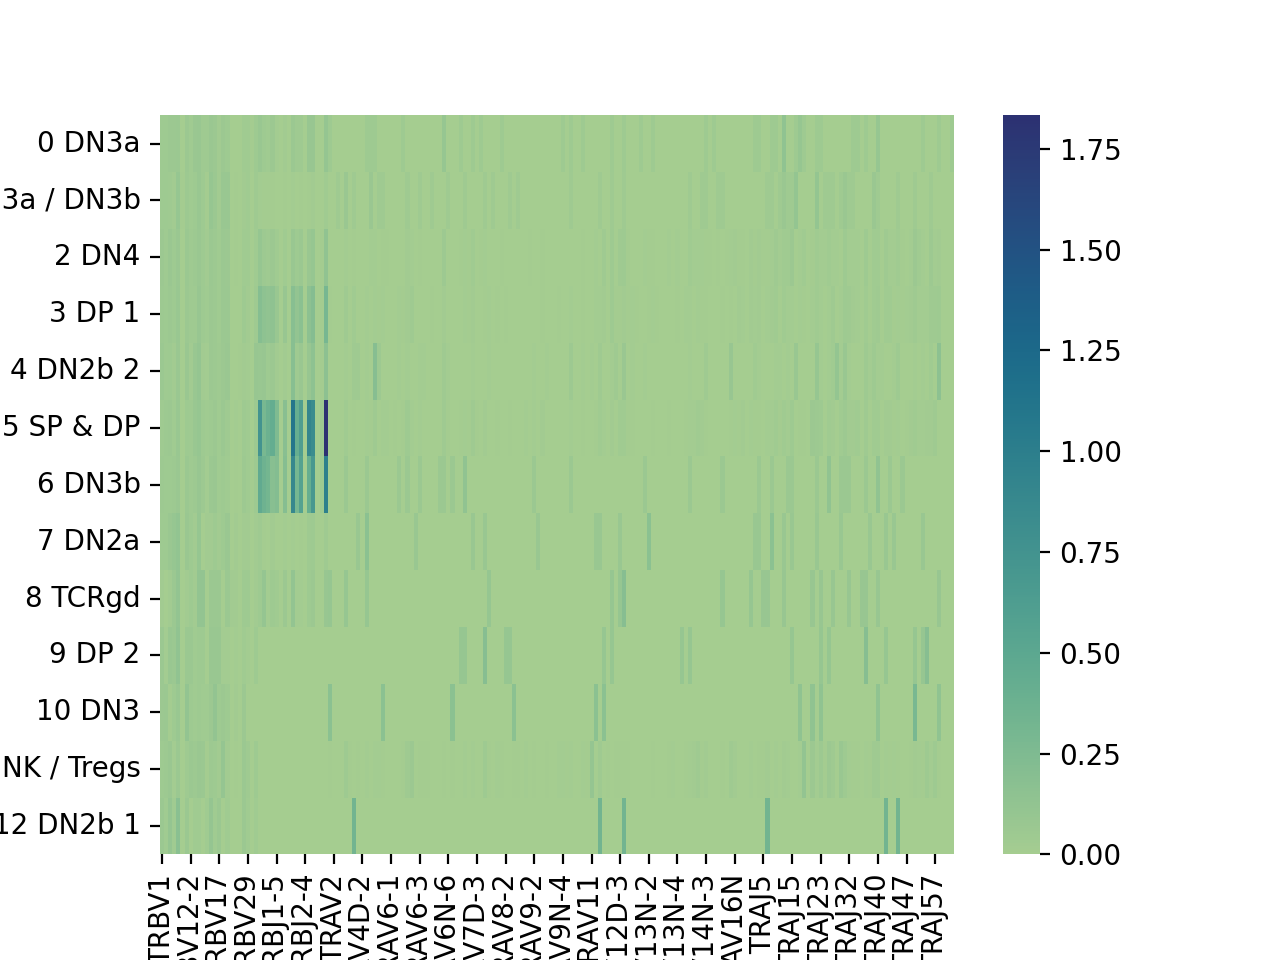

In [142]:
#options.figure_size = (20,30)
sns.heatmap(result, cmap="crest")
### not sure why is there one column that is >1.0 for J gene beta chain.

<Axes: ylabel='leiden'>

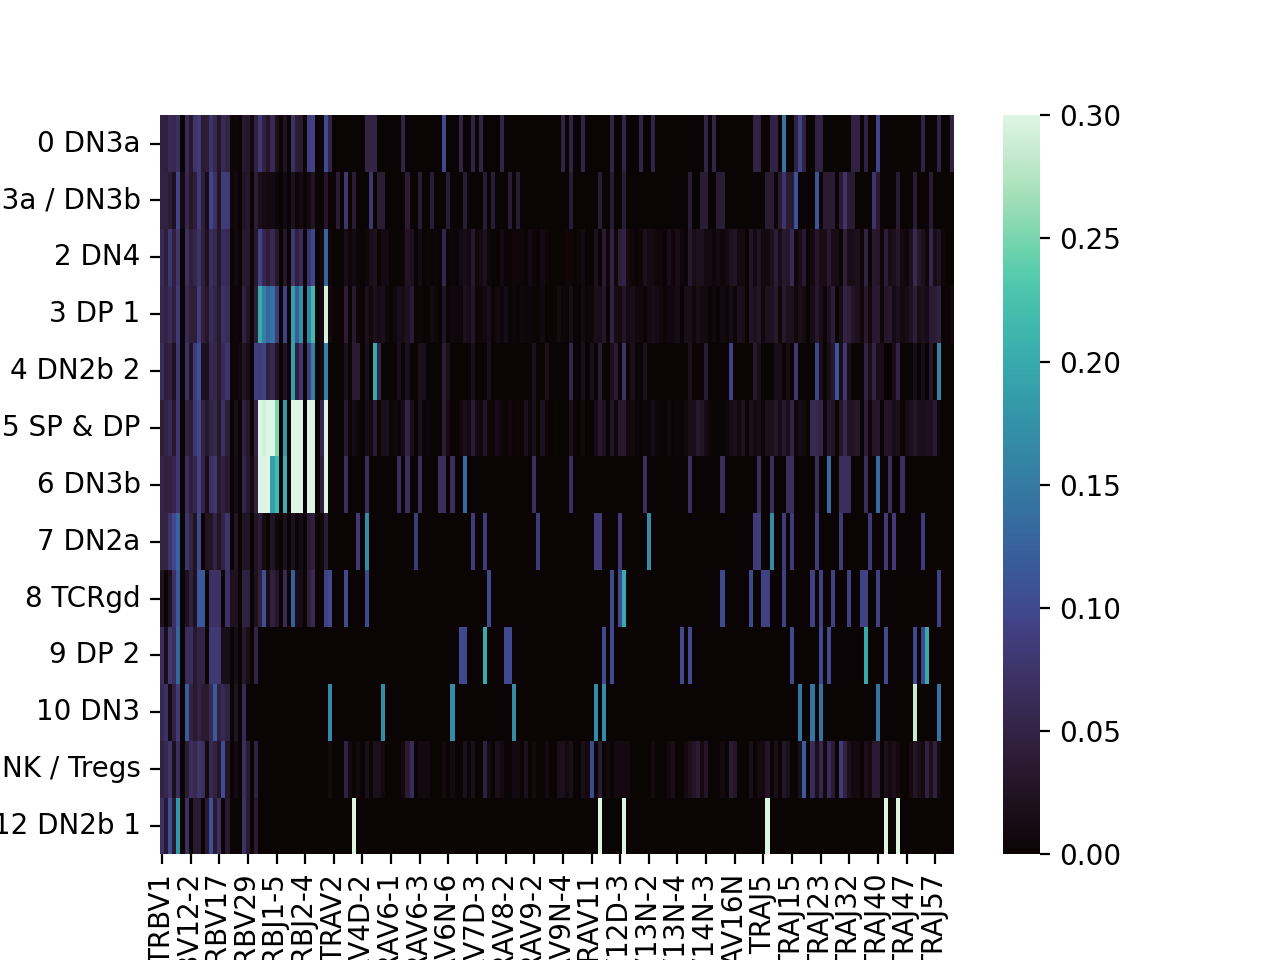

In [143]:
#options.figure_size = (20, 30)
sns.heatmap(result, cmap="mako", yticklabels=True, vmin =0, vmax = 0.3)

#plt.savefig("tests.pdf")


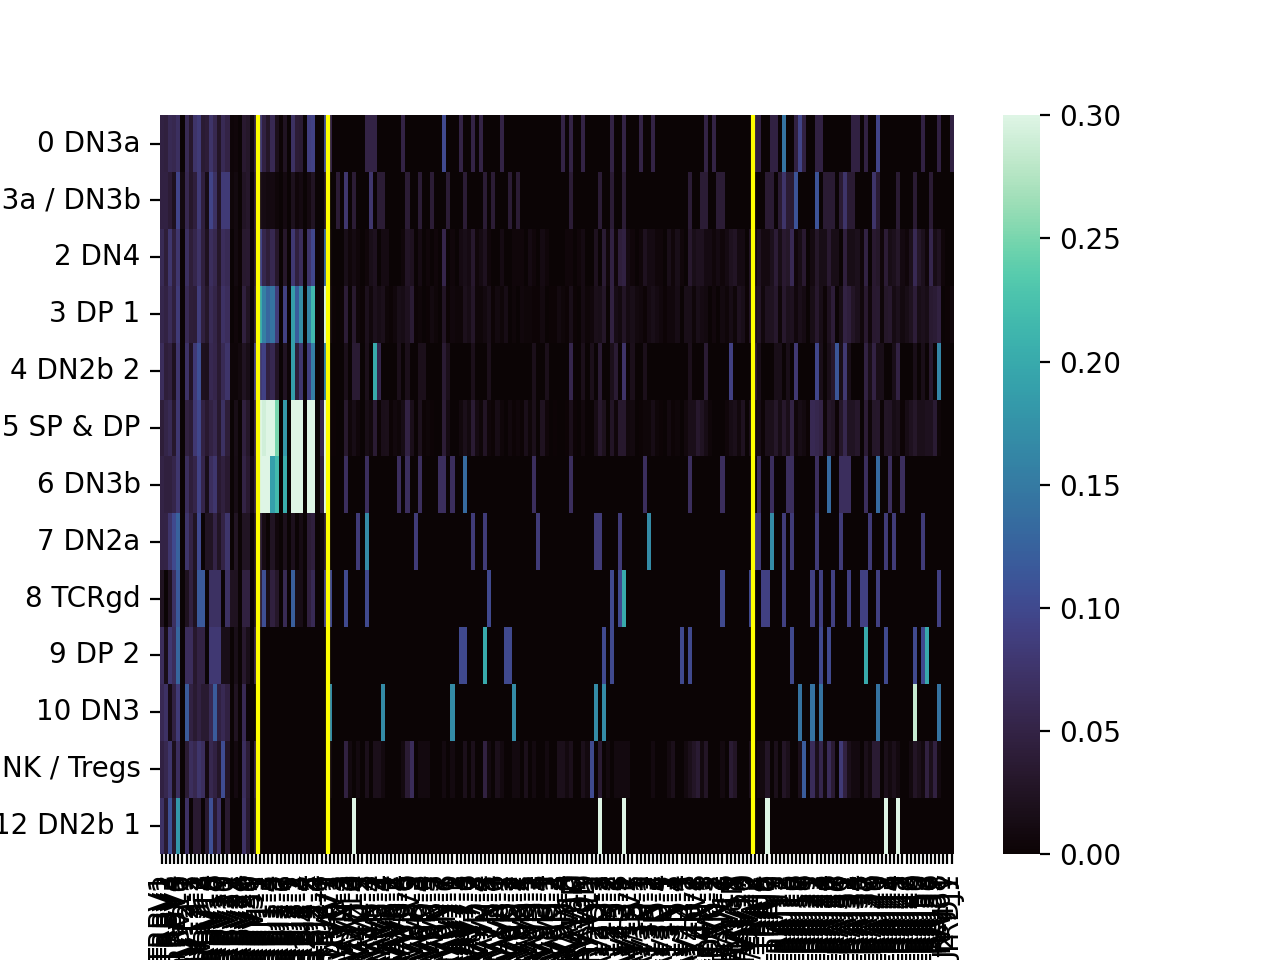

In [144]:
#options.figure_size = (20, 30)
ax = sns.heatmap(result, cmap="mako", xticklabels=True, vmin =0, vmax = 0.3)
ax.axvline(x = 24, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 24+17, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 24+17+104, ymin = 0, ymax = 1.0, color = "yellow")
plt.savefig("Heatmap_VJgeneusage_Control_Final_111223.pdf")


In [145]:
result = result.reindex([
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ])

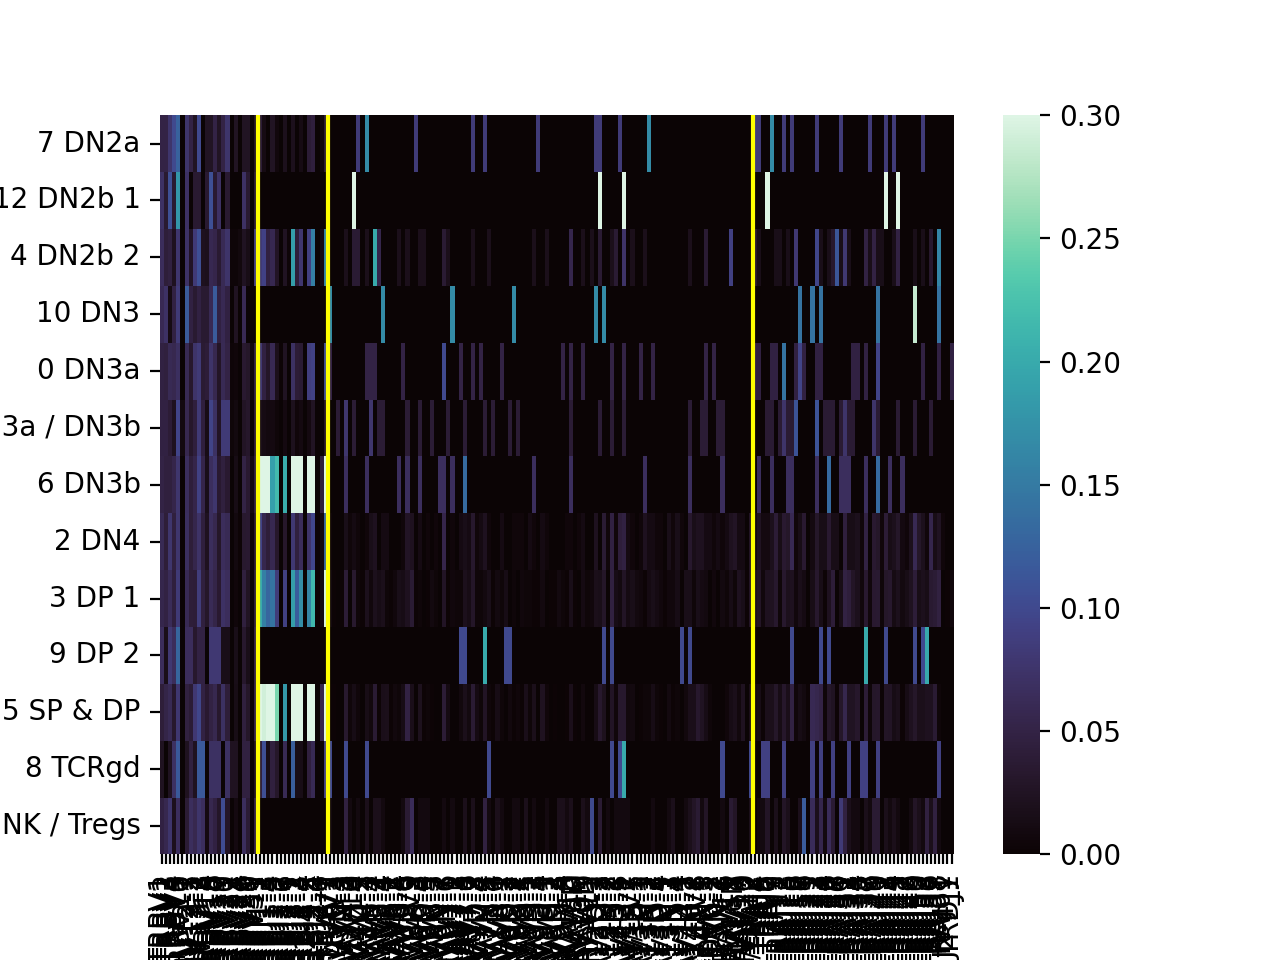

In [146]:
ax = sns.heatmap(result, cmap="mako", xticklabels=True, vmin =0, vmax = 0.3)
ax.axvline(x = 24, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 24+17, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 24+17+104, ymin = 0, ymax = 1.0, color = "yellow")
plt.savefig("Heatmap_VJgeneusage_Control_Final_111223_v2.pdf")


## Do for KO

In [147]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [148]:
adata_PF

View of AnnData object with n_obs × n_vars = 7896 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [149]:
adata_PF_KO = adata_PF[adata_PF.obs["Sample"] == "Krt76-/-"]
adata_PF_KO

View of AnnData object with n_obs × n_vars = 2755 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [150]:
working_df1KO = pd.DataFrame(adata_PF_KO.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df1KO

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    TRBV5                                 20
          TRBV19                                19
          TRBV13-2                              19
          TRBV13-1                              16
          TRBV3                                 15
...                                            ...
12 DN2b 1 TRBV13-1                               0
          TRBV12-2                               0
          TRBV12-1                               0
          TRBV4                                  0
          TRBV31                                 0

[273 rows x 1 columns]

In [151]:
working_df1KO.columns =["counts"]
working_df1KO

counts
leiden    v_call_abT_VDJ_main        
0 DN3a    TRBV5                    20
          TRBV19                   19
          TRBV13-2                 19
          TRBV13-1                 16
          TRBV3                    15
...                               ...
12 DN2b 1 TRBV13-1                  0
          TRBV12-2                  0
          TRBV12-1                  0
          TRBV4                     0
          TRBV31                    0

[273 rows x 1 columns]

In [152]:
working_df1KO.reset_index(inplace = True)
working_df1KO

leiden v_call_abT_VDJ_main  counts
0       0 DN3a               TRBV5      20
1       0 DN3a              TRBV19      19
2       0 DN3a            TRBV13-2      19
3       0 DN3a            TRBV13-1      16
4       0 DN3a               TRBV3      15
..         ...                 ...     ...
268  12 DN2b 1            TRBV13-1       0
269  12 DN2b 1            TRBV12-2       0
270  12 DN2b 1            TRBV12-1       0
271  12 DN2b 1               TRBV4       0
272  12 DN2b 1              TRBV31       0

[273 rows x 3 columns]

In [153]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df1KO.leiden.unique():
    tmp = working_df1KO[working_df1KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 210,
 '1 DN3a / DN3b': 84,
 '2 DN4': 728,
 '3 DP 1': 950,
 '4 DN2b 2': 144,
 '5 SP & DP': 283,
 '6 DN3b': 215,
 '7 DN2a': 12,
 '8 TCRgd': 17,
 '9 DP 2': 32,
 '10 DN3': 35,
 '11 NKT / NK / Tregs': 35,
 '12 DN2b 1': 10}

In [154]:
working_df1KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df1KO.iterrows():
    try:
        working_df1KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [155]:
working_df1KO

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a               TRBV5      20    0.095238
1       0 DN3a              TRBV19      19    0.090476
2       0 DN3a            TRBV13-2      19    0.090476
3       0 DN3a            TRBV13-1      16    0.076190
4       0 DN3a               TRBV3      15    0.071429
..         ...                 ...     ...         ...
268  12 DN2b 1            TRBV13-1       0    0.000000
269  12 DN2b 1            TRBV12-2       0    0.000000
270  12 DN2b 1            TRBV12-1       0    0.000000
271  12 DN2b 1               TRBV4       0    0.000000
272  12 DN2b 1              TRBV31       0    0.000000

[273 rows x 4 columns]

In [156]:
KOdf1 = working_df1KO.pivot(index='leiden', columns='v_call_abT_VDJ_main', values='proportion')
print(KOdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.052381  0.047619  0.071429  0.023810  0.095238   
1 DN3a / DN3b        0.083333  0.023810  0.095238  0.035714  0.095238   
2 DN4                0.046703  0.038462  0.054945  0.050824  0.065934   
3 DP 1               0.065263  0.048421  0.064211  0.041053  0.076842   
4 DN2b 2             0.111111  0.034722  0.062500  0.006944  0.062500   
5 SP & DP            0.035336  0.095406  0.056537  0.024735  0.081272   
6 DN3b               0.041860  0.065116  0.065116  0.046512  0.069767   
7 DN2a               0.083333  0.000000  0.166667  0.000000  0.083333   
8 TCRgd              0.058824  0.000000  0.000000  0.000000  0.058824   
9 DP 2               0.031250  0.000000  0.093750  0.031250  0.125000   
10 DN3               0.028571  0.000000  0.000000  0.028571  0.085714   
11 NKT / NK / Tregs  0.028571  0.085714  0.028571  

### KO - J gene beta chain

In [157]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VDJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [158]:
adata_PF

View of AnnData object with n_obs × n_vars = 8094 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [159]:
adata_PF_KO = adata_PF[adata_PF.obs["Sample"] == "Krt76-/-"]
adata_PF_KO

View of AnnData object with n_obs × n_vars = 2807 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [160]:
working_df2KO = pd.DataFrame(adata_PF_KO.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df2KO

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                         
0 DN3a    TRBJ2-5                                   32
          TRBJ2-7                                   30
          TRBJ2-4                                   29
          TRBJ1-2                                   19
          TRBJ2-1                                   19
...                                                ...
12 DN2b 1 TRBJ1-4                                    0
          TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
          TRBJ2-2                                    0
          TRBJ2-5                                    0
          TRBJ2-6                                    0

[182 rows x 1 columns]

In [161]:
working_df2KO.columns =["counts"]
working_df2KO

counts
leiden    j_call_abT_VDJ_main            
0 DN3a    TRBJ2-5                      32
          TRBJ2-7                      30
          TRBJ2-4                      29
          TRBJ1-2                      19
          TRBJ2-1                      19
...                                   ...
12 DN2b 1 TRBJ1-4                       0
          TRBJ1-6,TRBJ2-2,TRBJ2-7       0
          TRBJ2-2                       0
          TRBJ2-5                       0
          TRBJ2-6                       0

[182 rows x 1 columns]

In [162]:
working_df2KO.reset_index(inplace = True)
working_df2KO

leiden      j_call_abT_VDJ_main  counts
0       0 DN3a                  TRBJ2-5      32
1       0 DN3a                  TRBJ2-7      30
2       0 DN3a                  TRBJ2-4      29
3       0 DN3a                  TRBJ1-2      19
4       0 DN3a                  TRBJ2-1      19
..         ...                      ...     ...
177  12 DN2b 1                  TRBJ1-4       0
178  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
179  12 DN2b 1                  TRBJ2-2       0
180  12 DN2b 1                  TRBJ2-5       0
181  12 DN2b 1                  TRBJ2-6       0

[182 rows x 3 columns]

In [163]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df2KO.leiden.unique():
    tmp = working_df2KO[working_df2KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 215,
 '1 DN3a / DN3b': 85,
 '2 DN4': 743,
 '3 DP 1': 964,
 '4 DN2b 2': 149,
 '5 SP & DP': 288,
 '6 DN3b': 219,
 '7 DN2a': 12,
 '8 TCRgd': 19,
 '9 DP 2': 32,
 '10 DN3': 36,
 '11 NKT / NK / Tregs': 35,
 '12 DN2b 1': 10}

In [164]:
working_df2KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df2KO.iterrows():
    try:
        working_df2KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [165]:
working_df2KO

leiden      j_call_abT_VDJ_main  counts  proportion
0       0 DN3a                  TRBJ2-5      32    0.148837
1       0 DN3a                  TRBJ2-7      30    0.139535
2       0 DN3a                  TRBJ2-4      29    0.134884
3       0 DN3a                  TRBJ1-2      19    0.088372
4       0 DN3a                  TRBJ2-1      19    0.088372
..         ...                      ...     ...         ...
177  12 DN2b 1                  TRBJ1-4       0    0.000000
178  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000
179  12 DN2b 1                  TRBJ2-2       0    0.000000
180  12 DN2b 1                  TRBJ2-5       0    0.000000
181  12 DN2b 1                  TRBJ2-6       0    0.000000

[182 rows x 4 columns]

In [166]:
KOdf2 = working_df2KO.pivot(index='leiden', columns='j_call_abT_VDJ_main', values='proportion')
print(KOdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.052381  0.047619  0.071429  0.023810  0.095238   
1 DN3a / DN3b        0.083333  0.023810  0.095238  0.035714  0.095238   
2 DN4                0.046703  0.038462  0.054945  0.050824  0.065934   
3 DP 1               0.065263  0.048421  0.064211  0.041053  0.076842   
4 DN2b 2             0.111111  0.034722  0.062500  0.006944  0.062500   
5 SP & DP            0.035336  0.095406  0.056537  0.024735  0.081272   
6 DN3b               0.041860  0.065116  0.065116  0.046512  0.069767   
7 DN2a               0.083333  0.000000  0.166667  0.000000  0.083333   
8 TCRgd              0.058824  0.000000  0.000000  0.000000  0.058824   
9 DP 2               0.031250  0.000000  0.093750  0.031250  0.125000   
10 DN3               0.028571  0.000000  0.000000  0.028571  0.085714   
11 NKT / NK / Tregs  0.028571  0.085714  0.028571  

### V gene Alpha chain - KO

In [167]:
adata_PF = adata_P[adata_P.obs["v_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["v_call_abT_VJ_main"] != "No_contig"]

In [168]:
adata_PF

View of AnnData object with n_obs × n_vars = 2530 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [169]:
adata_PF_KO = adata_PF[adata_PF.obs["Sample"] == "Krt76-/-"]
adata_PF_KO

View of AnnData object with n_obs × n_vars = 1086 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [170]:
working_df3KO = pd.DataFrame(adata_PF_KO.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df3KO

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                    
0 DN3a    TRAV13-2                             2
          TRAV13-1                             2
          TRAV9N-4                             1
          TRAV6N-6                             1
          TRAV9N-2,TRAV9D-2                    1
...                                          ...
12 DN2b 1 TRAV7-3                              0
          TRAV7-1                              0
          TRAV6N-6                             0
          TRAV6D-7,TRAV6N-7                    0
          TRAV21/DV12                          0

[1274 rows x 1 columns]

In [171]:
working_df3KO.columns =["counts"]
working_df3KO

counts
leiden    v_call_abT_VJ_main        
0 DN3a    TRAV13-2                 2
          TRAV13-1                 2
          TRAV9N-4                 1
          TRAV6N-6                 1
          TRAV9N-2,TRAV9D-2        1
...                              ...
12 DN2b 1 TRAV7-3                  0
          TRAV7-1                  0
          TRAV6N-6                 0
          TRAV6D-7,TRAV6N-7        0
          TRAV21/DV12              0

[1274 rows x 1 columns]

In [172]:
working_df3KO.reset_index(inplace = True)
working_df3KO

leiden v_call_abT_VJ_main  counts
0        0 DN3a           TRAV13-2       2
1        0 DN3a           TRAV13-1       2
2        0 DN3a           TRAV9N-4       1
3        0 DN3a           TRAV6N-6       1
4        0 DN3a  TRAV9N-2,TRAV9D-2       1
...         ...                ...     ...
1269  12 DN2b 1            TRAV7-3       0
1270  12 DN2b 1            TRAV7-1       0
1271  12 DN2b 1           TRAV6N-6       0
1272  12 DN2b 1  TRAV6D-7,TRAV6N-7       0
1273  12 DN2b 1        TRAV21/DV12       0

[1274 rows x 3 columns]

In [173]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df3KO.leiden.unique():
    tmp = working_df3KO[working_df3KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 15,
 '1 DN3a / DN3b': 17,
 '2 DN4': 205,
 '3 DP 1': 469,
 '4 DN2b 2': 40,
 '5 SP & DP': 276,
 '6 DN3b': 12,
 '7 DN2a': 5,
 '8 TCRgd': 3,
 '9 DP 2': 7,
 '10 DN3': 2,
 '11 NKT / NK / Tregs': 30,
 '12 DN2b 1': 5}

In [174]:
working_df3KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df3KO.iterrows():
    try:
        working_df3KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [175]:
working_df3KO

leiden v_call_abT_VJ_main  counts  proportion
0        0 DN3a           TRAV13-2       2    0.133333
1        0 DN3a           TRAV13-1       2    0.133333
2        0 DN3a           TRAV9N-4       1    0.066667
3        0 DN3a           TRAV6N-6       1    0.066667
4        0 DN3a  TRAV9N-2,TRAV9D-2       1    0.066667
...         ...                ...     ...         ...
1269  12 DN2b 1            TRAV7-3       0    0.000000
1270  12 DN2b 1            TRAV7-1       0    0.000000
1271  12 DN2b 1           TRAV6N-6       0    0.000000
1272  12 DN2b 1  TRAV6D-7,TRAV6N-7       0    0.000000
1273  12 DN2b 1        TRAV21/DV12       0    0.000000

[1274 rows x 4 columns]

In [176]:
KOdf3 = working_df3KO.pivot(index='leiden', columns='v_call_abT_VJ_main', values='proportion')
print(KOdf3)

v_call_abT_VJ_main      TRAV1     TRAV2   TRAV3-1  TRAV3D-3,TRAV3N-3  \
leiden                                                                 
0 DN3a               0.000000  0.000000  0.000000           0.000000   
1 DN3a / DN3b        0.000000  0.000000  0.000000           0.000000   
2 DN4                0.009756  0.000000  0.000000           0.034146   
3 DP 1               0.008529  0.004264  0.002132           0.049041   
4 DN2b 2             0.000000  0.025000  0.000000           0.025000   
5 SP & DP            0.007246  0.007246  0.000000           0.025362   
6 DN3b               0.083333  0.000000  0.000000           0.083333   
7 DN2a               0.000000  0.000000  0.000000           0.000000   
8 TCRgd              0.000000  0.000000  0.000000           0.333333   
9 DP 2               0.000000  0.000000  0.000000           0.000000   
10 DN3               0.000000  0.000000  0.000000           0.000000   
11 NKT / NK / Tregs  0.000000  0.000000  0.000000           0.00

### J gene Alpha Chain - KO

In [177]:
adata_PF = adata_P[adata_P.obs["j_call_abT_VJ_main"] != "None"]
adata_PF = adata_PF[adata_PF.obs["j_call_abT_VJ_main"] != "No_contig"]

In [178]:
adata_PF

View of AnnData object with n_obs × n_vars = 2595 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [179]:
adata_PF_KO = adata_PF[adata_PF.obs["Sample"] == "Krt76-/-"]
adata_PF_KO

View of AnnData object with n_obs × n_vars = 1105 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [180]:
working_df4KO = pd.DataFrame(adata_PF_KO.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df4KO

j_call_abT_VJ_main
leiden    j_call_abT_VJ_main                    
0 DN3a    TRAJ13                               3
          TRAJ15                               3
          TRAJ32                               1
          TRAJ37                               1
          TRAJ40                               1
...                                          ...
12 DN2b 1 TRAJ26                               0
          TRAJ27                               0
          TRAJ28                               0
          TRAJ30                               0
          TRDJ1                                0

[624 rows x 1 columns]

In [181]:
working_df4KO.columns =["counts"]
working_df4KO

counts
leiden    j_call_abT_VJ_main        
0 DN3a    TRAJ13                   3
          TRAJ15                   3
          TRAJ32                   1
          TRAJ37                   1
          TRAJ40                   1
...                              ...
12 DN2b 1 TRAJ26                   0
          TRAJ27                   0
          TRAJ28                   0
          TRAJ30                   0
          TRDJ1                    0

[624 rows x 1 columns]

In [182]:
working_df4KO.reset_index(inplace = True)
working_df4KO

leiden j_call_abT_VJ_main  counts
0       0 DN3a             TRAJ13       3
1       0 DN3a             TRAJ15       3
2       0 DN3a             TRAJ32       1
3       0 DN3a             TRAJ37       1
4       0 DN3a             TRAJ40       1
..         ...                ...     ...
619  12 DN2b 1             TRAJ26       0
620  12 DN2b 1             TRAJ27       0
621  12 DN2b 1             TRAJ28       0
622  12 DN2b 1             TRAJ30       0
623  12 DN2b 1              TRDJ1       0

[624 rows x 3 columns]

In [183]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df4KO.leiden.unique():
    tmp = working_df4KO[working_df4KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 15,
 '1 DN3a / DN3b': 17,
 '2 DN4': 214,
 '3 DP 1': 474,
 '4 DN2b 2': 41,
 '5 SP & DP': 277,
 '6 DN3b': 13,
 '7 DN2a': 5,
 '8 TCRgd': 3,
 '9 DP 2': 7,
 '10 DN3': 4,
 '11 NKT / NK / Tregs': 30,
 '12 DN2b 1': 5}

In [184]:
working_df4KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df4KO.iterrows():
    try:
        working_df4KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [185]:
working_df4KO

leiden j_call_abT_VJ_main  counts  proportion
0       0 DN3a             TRAJ13       3    0.200000
1       0 DN3a             TRAJ15       3    0.200000
2       0 DN3a             TRAJ32       1    0.066667
3       0 DN3a             TRAJ37       1    0.066667
4       0 DN3a             TRAJ40       1    0.066667
..         ...                ...     ...         ...
619  12 DN2b 1             TRAJ26       0    0.000000
620  12 DN2b 1             TRAJ27       0    0.000000
621  12 DN2b 1             TRAJ28       0    0.000000
622  12 DN2b 1             TRAJ30       0    0.000000
623  12 DN2b 1              TRDJ1       0    0.000000

[624 rows x 4 columns]

In [186]:
KOdf4 = working_df4KO.pivot(index='leiden', columns='j_call_abT_VJ_main', values='proportion')
print(KOdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.052381  0.047619  0.071429  0.023810  0.095238   
1 DN3a / DN3b        0.083333  0.023810  0.095238  0.035714  0.095238   
2 DN4                0.046703  0.038462  0.054945  0.050824  0.065934   
3 DP 1               0.065263  0.048421  0.064211  0.041053  0.076842   
4 DN2b 2             0.111111  0.034722  0.062500  0.006944  0.062500   
5 SP & DP            0.035336  0.095406  0.056537  0.024735  0.081272   
6 DN3b               0.041860  0.065116  0.065116  0.046512  0.069767   
7 DN2a               0.083333  0.000000  0.166667  0.000000  0.083333   
8 TCRgd              0.058824  0.000000  0.000000  0.000000  0.058824   
9 DP 2               0.031250  0.000000  0.093750  0.031250  0.125000   
10 DN3               0.028571  0.000000  0.000000  0.028571  0.085714   
11 NKT / NK / Tregs  0.028571  0.085714  0.028571  

### Now do the merging and create heatmap

In [187]:
resultKO = pd.merge(KOdf1, KOdf2, on='leiden').merge(KOdf3, on='leiden').merge(KOdf4, on='leiden')

In [188]:
print(resultKO)

                        TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.052381  0.047619  0.071429  0.023810  0.095238   
1 DN3a / DN3b        0.083333  0.023810  0.095238  0.035714  0.095238   
2 DN4                0.046703  0.038462  0.054945  0.050824  0.065934   
3 DP 1               0.065263  0.048421  0.064211  0.041053  0.076842   
4 DN2b 2             0.111111  0.034722  0.062500  0.006944  0.062500   
5 SP & DP            0.035336  0.095406  0.056537  0.024735  0.081272   
6 DN3b               0.041860  0.065116  0.065116  0.046512  0.069767   
7 DN2a               0.083333  0.000000  0.166667  0.000000  0.083333   
8 TCRgd              0.058824  0.000000  0.000000  0.000000  0.058824   
9 DP 2               0.031250  0.000000  0.093750  0.031250  0.125000   
10 DN3               0.028571  0.000000  0.000000  0.028571  0.085714   
11 NKT / NK / Tregs  0.028571  0.085714  0.028571  

In [189]:
resultKO.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Columns: 181 entries, TRBV1 to TRDJ1
dtypes: float64(181)
memory usage: 19.0 KB


In [190]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


<Axes: ylabel='leiden'>

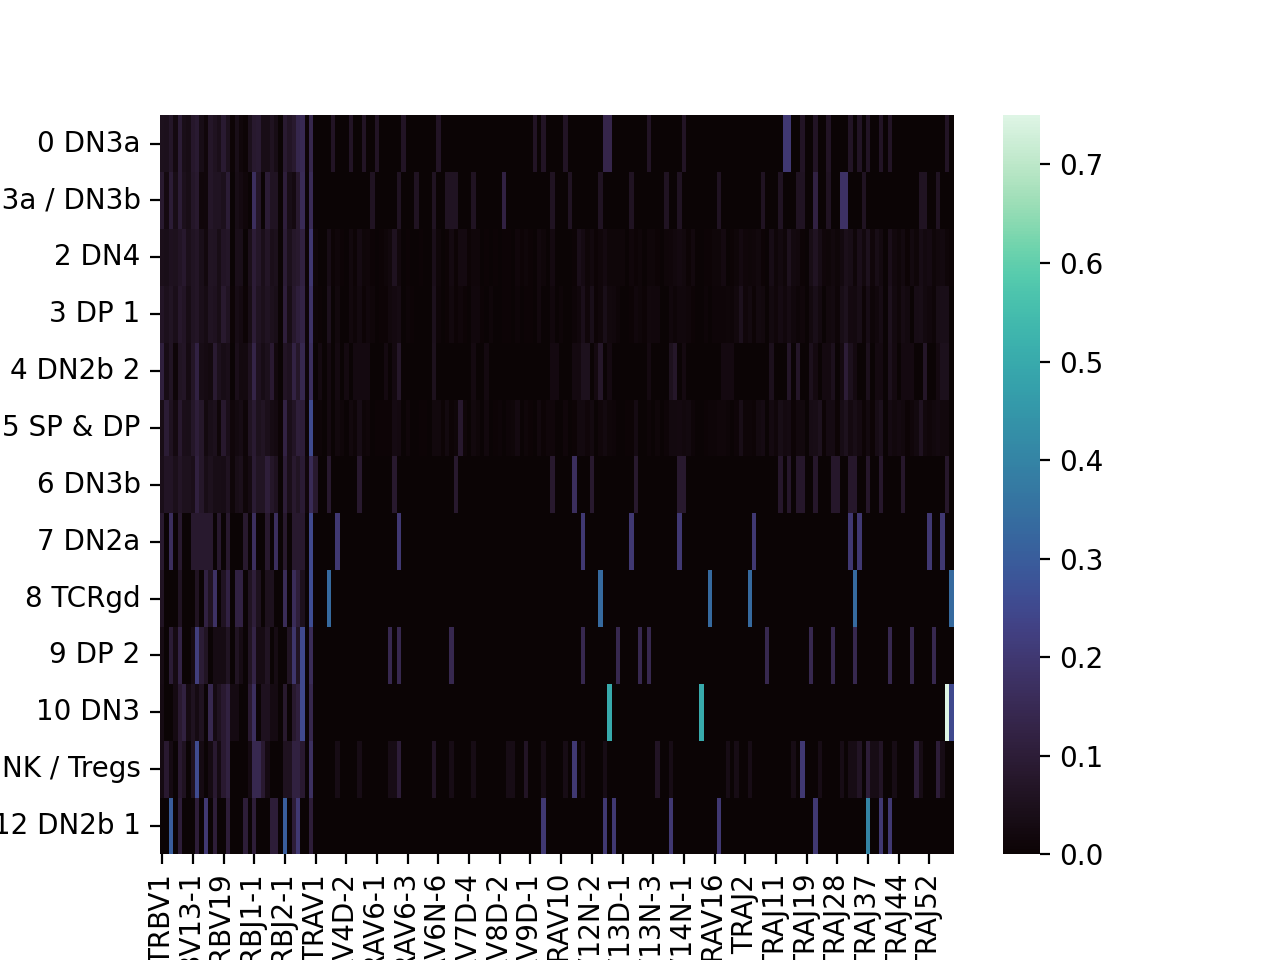

In [191]:
options.figure_size = (20, 30)
sns.heatmap(resultKO, cmap="mako", yticklabels=True)

#plt.savefig("tests.pdf")


In [192]:
KOdf3.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 98 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TRAV1                            13 non-null     float64
 1   TRAV2                            13 non-null     float64
 2   TRAV3-1                          13 non-null     float64
 3   TRAV3D-3,TRAV3N-3                13 non-null     float64
 4   TRAV4-2                          13 non-null     float64
 5   TRAV4-4/DV10                     13 non-null     float64
 6   TRAV4-4/DV10,TRAV4D-4            13 non-null     float64
 7   TRAV4D-2                         13 non-null     float64
 8   TRAV4D-3,TRAV4-3                 13 non-null     float64
 9   TRAV4D-3,TRAV4N-3                13 non-null     float64
 10  TRAV4N-4,TRAV4D-4                13 non-null     float64
 11  TRAV5-1                          13 non-null     float64
 12  TRAV5-

### KO dfs - 21 + 14 + 98

In [193]:
resultKO = resultKO.reindex([
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ])

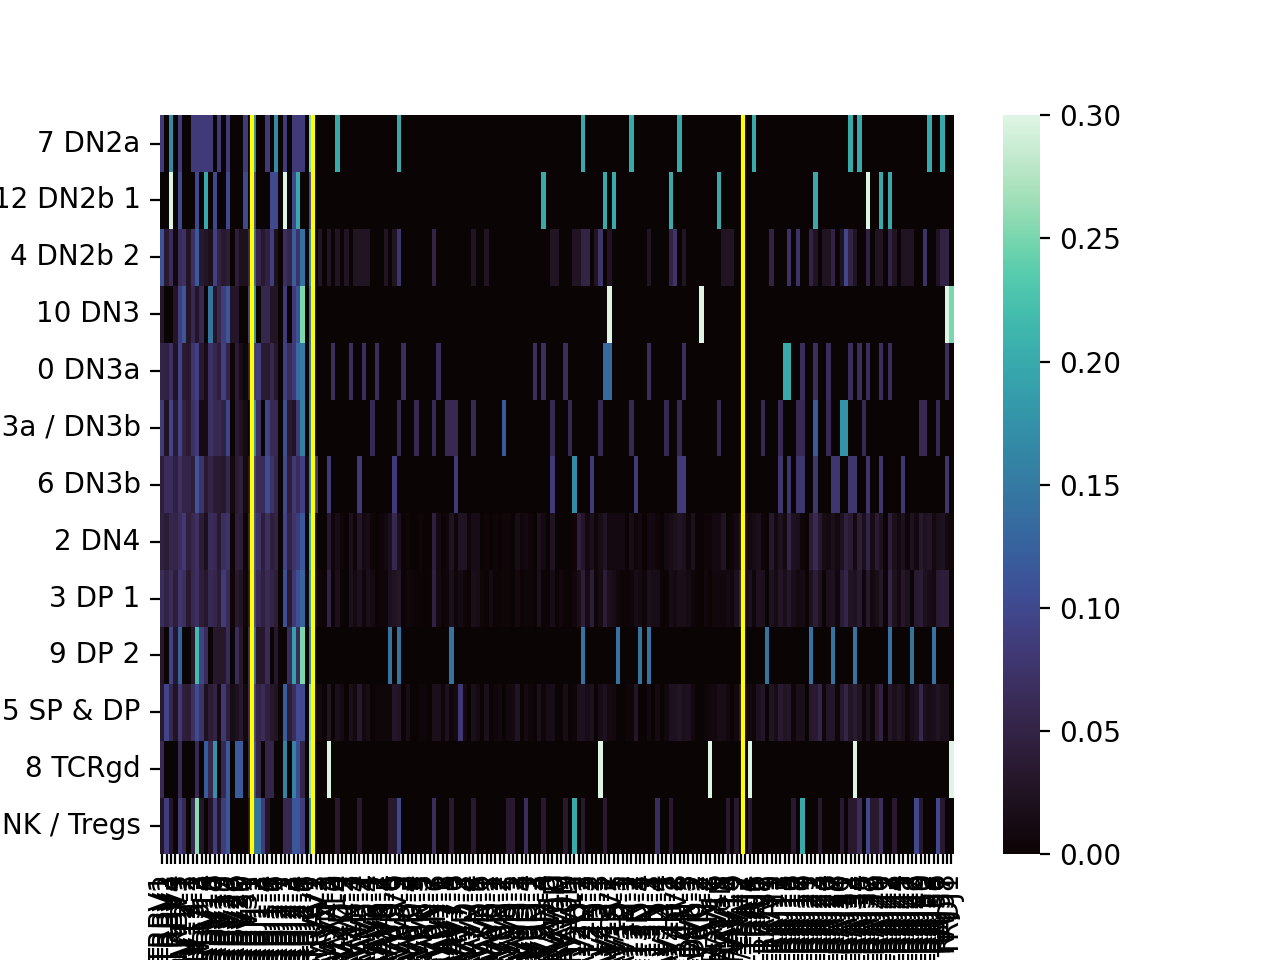

In [194]:
ax = sns.heatmap(resultKO, cmap="mako", xticklabels=True, vmin =0, vmax = 0.3)
ax.axvline(x = 21, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 21+14, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 21+14+98, ymin = 0, ymax = 1.0, color = "yellow")
plt.savefig("Heatmap_VJgeneusage_KO_Final_141223_v2.pdf")

# REDOING HEATMAP FOR NONPRODUCTIVE CHAINS (CONTROL)

In [195]:
adata_NP = sc.read_h5ad("/Users/uqssoon/Documents/Projects/InezMara/adata_tcr_InezMara_MS__NonProductiveonly_141223.h5ad")

In [196]:
adata_NP.obs["Sample"].value_counts()

Control     9832
Krt76-/-    5569
Name: Sample, dtype: int64

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


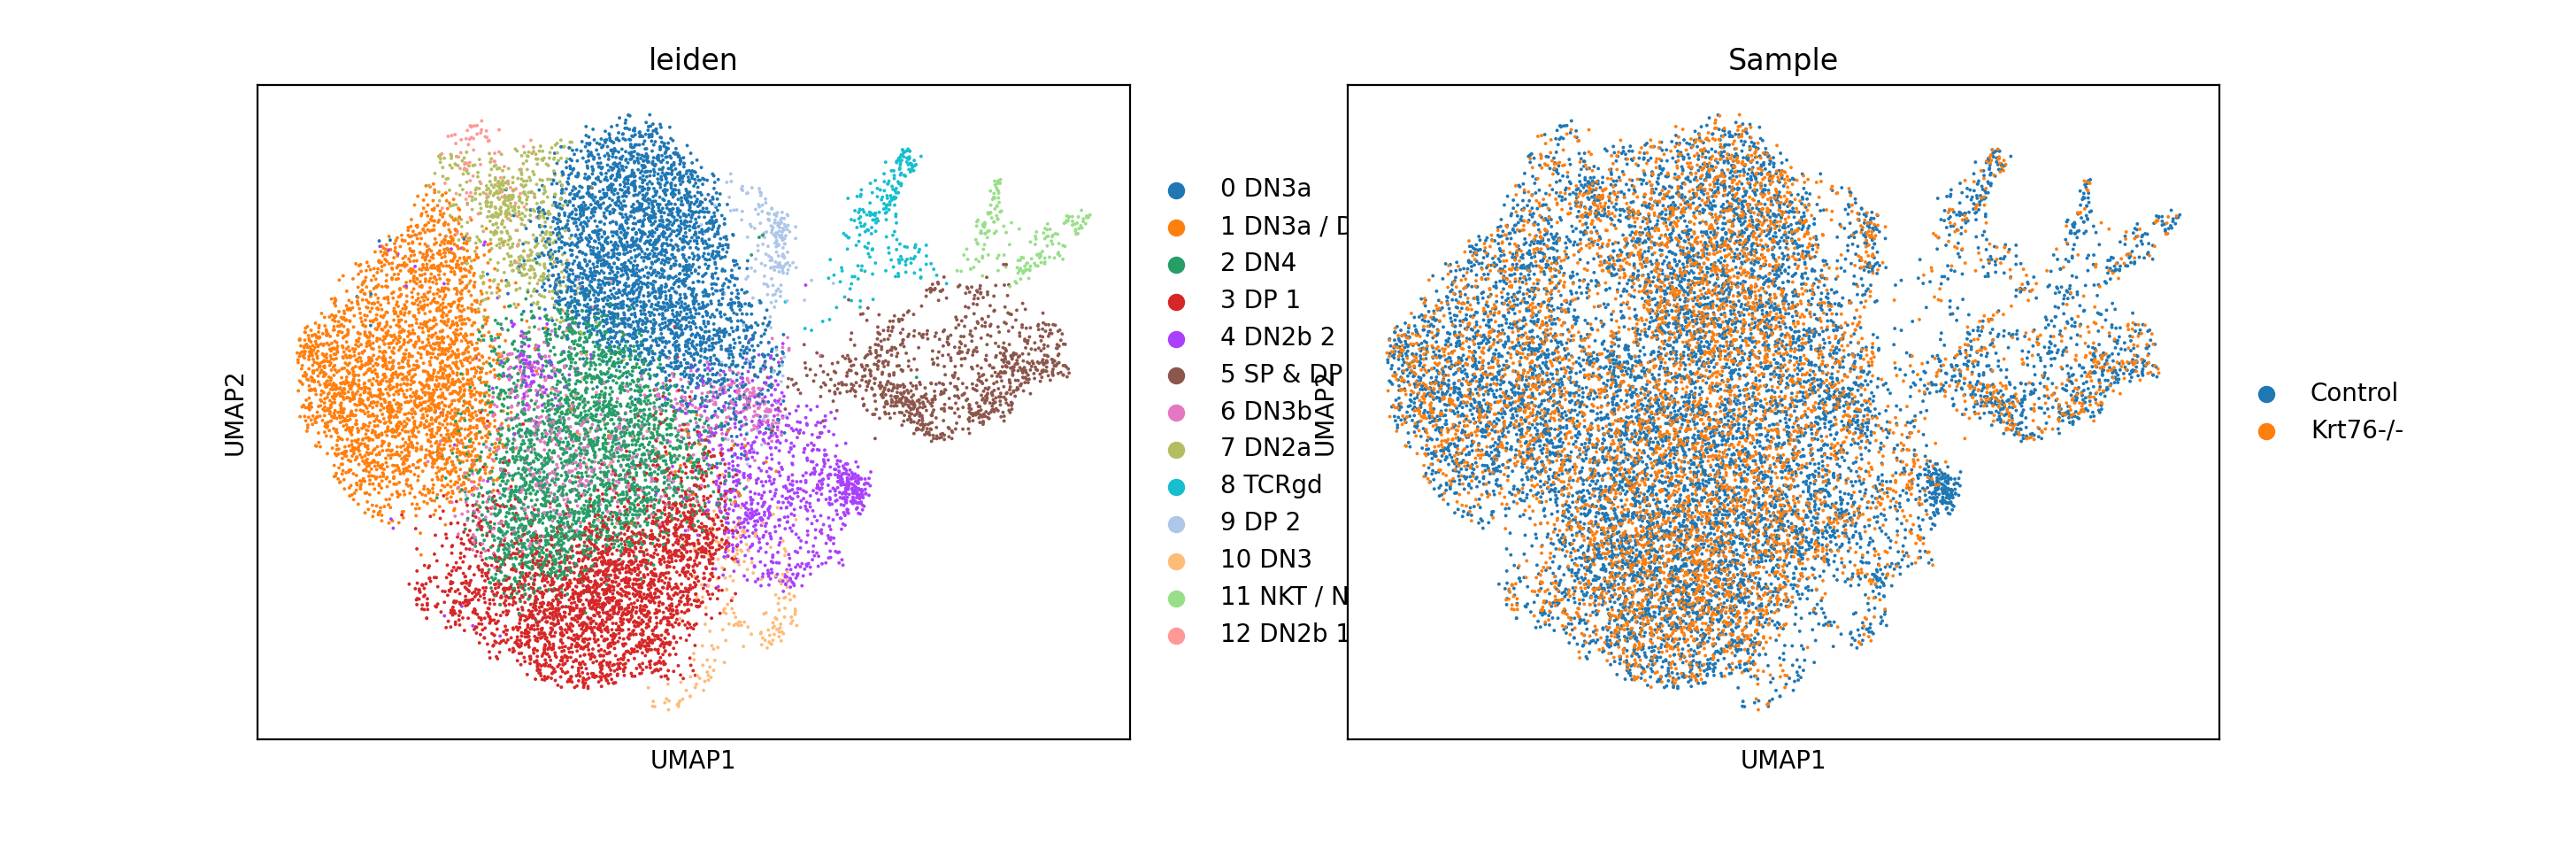

In [197]:
sc.pl.umap(adata_NP, color=["leiden", "Sample"])

## CONTROL - VJ 

In [198]:
adata_NPF = adata_NP[adata_NP.obs["v_call_abT_VDJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [199]:
adata_NPF

View of AnnData object with n_obs × n_vars = 7571 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [200]:
adata_NPF_C = adata_NPF[adata_NPF.obs["Sample"] == "Control"]
adata_NPF_C

View of AnnData object with n_obs × n_vars = 4870 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [201]:
working_df1C = pd.DataFrame(adata_NPF_C.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df1C

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    TRBV13-1                              47
          TRBV15                                46
          TRBV31                                41
          TRBV13-2                              39
          TRBV5                                 37
...                                            ...
12 DN2b 1 TRBV24,TRBV26                          0
          TRBV12-2                               0
          TRBV10                                 0
          TRBV30                                 0
          TRBV4                                  0

[325 rows x 1 columns]

In [202]:
working_df1C.columns =["counts"]
working_df1C

counts
leiden    v_call_abT_VDJ_main        
0 DN3a    TRBV13-1                 47
          TRBV15                   46
          TRBV31                   41
          TRBV13-2                 39
          TRBV5                    37
...                               ...
12 DN2b 1 TRBV24,TRBV26             0
          TRBV12-2                  0
          TRBV10                    0
          TRBV30                    0
          TRBV4                     0

[325 rows x 1 columns]

In [203]:
working_df1C.reset_index(inplace = True)
working_df1C

leiden v_call_abT_VDJ_main  counts
0       0 DN3a            TRBV13-1      47
1       0 DN3a              TRBV15      46
2       0 DN3a              TRBV31      41
3       0 DN3a            TRBV13-2      39
4       0 DN3a               TRBV5      37
..         ...                 ...     ...
320  12 DN2b 1       TRBV24,TRBV26       0
321  12 DN2b 1            TRBV12-2       0
322  12 DN2b 1              TRBV10       0
323  12 DN2b 1              TRBV30       0
324  12 DN2b 1               TRBV4       0

[325 rows x 3 columns]

In [204]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df1C.leiden.unique():
    tmp = working_df1C[working_df1C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 556,
 '1 DN3a / DN3b': 403,
 '2 DN4': 1294,
 '3 DP 1': 1251,
 '4 DN2b 2': 296,
 '5 SP & DP': 387,
 '6 DN3b': 341,
 '7 DN2a': 44,
 '8 TCRgd': 63,
 '9 DP 2': 40,
 '10 DN3': 79,
 '11 NKT / NK / Tregs': 84,
 '12 DN2b 1': 32}

In [205]:
working_df1C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df1C.iterrows():
    try:
        working_df1C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [206]:
working_df1C

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a            TRBV13-1      47    0.084532
1       0 DN3a              TRBV15      46    0.082734
2       0 DN3a              TRBV31      41    0.073741
3       0 DN3a            TRBV13-2      39    0.070144
4       0 DN3a               TRBV5      37    0.066547
..         ...                 ...     ...         ...
320  12 DN2b 1       TRBV24,TRBV26       0    0.000000
321  12 DN2b 1            TRBV12-2       0    0.000000
322  12 DN2b 1              TRBV10       0    0.000000
323  12 DN2b 1              TRBV30       0    0.000000
324  12 DN2b 1               TRBV4       0    0.000000

[325 rows x 4 columns]

In [207]:
newdf1 = working_df1C.pivot(index='leiden', columns='v_call_abT_VDJ_main', values='proportion')
print(newdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.062950  0.032374  0.041367  0.059353  0.066547   
1 DN3a / DN3b        0.047146  0.024814  0.039702  0.062035  0.091811   
2 DN4                0.056414  0.044822  0.076507  0.042504  0.071870   
3 DP 1               0.055156  0.045564  0.063949  0.042366  0.082334   
4 DN2b 2             0.060811  0.054054  0.037162  0.023649  0.081081   
5 SP & DP            0.041344  0.043928  0.067183  0.028424  0.067183   
6 DN3b               0.049853  0.046921  0.046921  0.055718  0.079179   
7 DN2a               0.045455  0.045455  0.068182  0.090909  0.136364   
8 TCRgd              0.047619  0.000000  0.031746  0.079365  0.111111   
9 DP 2               0.100000  0.025000  0.075000  0.075000  0.150000   
10 DN3               0.063291  0.075949  0.012658  0.050633  0.075949   
11 NKT / NK / Tregs  0.035714  0.059524  0.071429  

In [208]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='v_call_abT_VDJ_main', ylabel='leiden'>

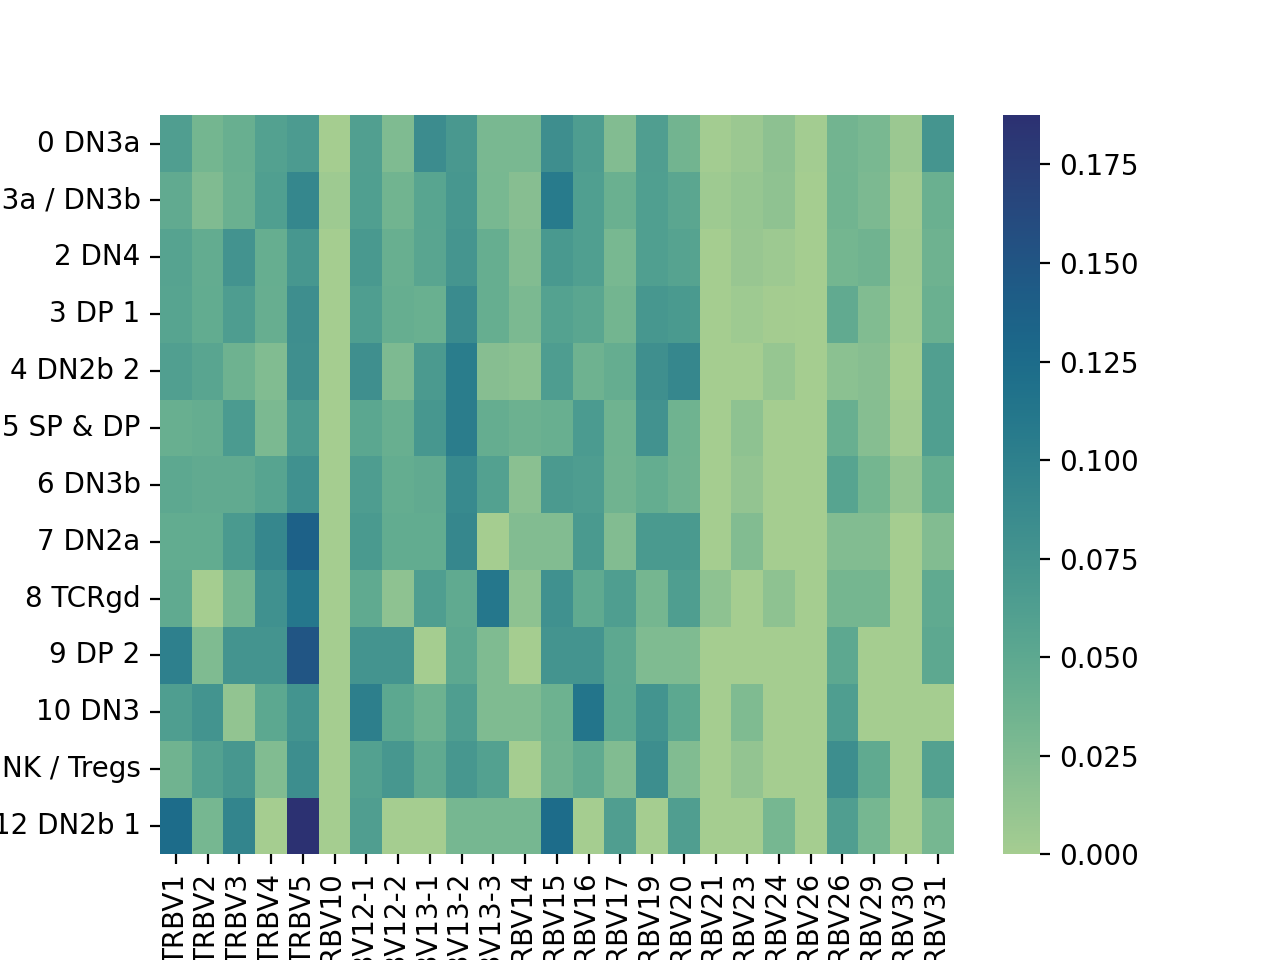

In [209]:
sns.heatmap(newdf1, cmap="crest")

#### Now get the rest of the VJ genes...
#### Here, J gene Beta Chain 

In [210]:
adata_NPF = adata_NP[adata_NP.obs["j_call_abT_VDJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [211]:
adata_NPF

View of AnnData object with n_obs × n_vars = 8299 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [212]:
adata_NPF_C = adata_NPF[adata_NPF.obs["Sample"] == "Control"]
adata_NPF_C

View of AnnData object with n_obs × n_vars = 5396 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [213]:
working_df2C = pd.DataFrame(adata_NPF_C.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df2C

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                         
0 DN3a    TRBJ2-7                                   88
          TRBJ2-1                                   87
          TRBJ2-6                                   86
          TRBJ2-5                                   82
          TRBJ1-1                                   63
...                                                ...
12 DN2b 1 TRBJ1-5,TRBJ2-2                            0
          TRBJ1-6                                    0
          TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
          TRBJ2-4,TRBJ2-3                            0
          TRBJ2-4,TRBJ2-5                            0

[221 rows x 1 columns]

In [214]:
working_df2C.columns =["counts"]
working_df2C

counts
leiden    j_call_abT_VDJ_main            
0 DN3a    TRBJ2-7                      88
          TRBJ2-1                      87
          TRBJ2-6                      86
          TRBJ2-5                      82
          TRBJ1-1                      63
...                                   ...
12 DN2b 1 TRBJ1-5,TRBJ2-2               0
          TRBJ1-6                       0
          TRBJ1-6,TRBJ2-2,TRBJ2-7       0
          TRBJ2-4,TRBJ2-3               0
          TRBJ2-4,TRBJ2-5               0

[221 rows x 1 columns]

In [215]:
working_df2C.reset_index(inplace = True)
working_df2C

leiden      j_call_abT_VDJ_main  counts
0       0 DN3a                  TRBJ2-7      88
1       0 DN3a                  TRBJ2-1      87
2       0 DN3a                  TRBJ2-6      86
3       0 DN3a                  TRBJ2-5      82
4       0 DN3a                  TRBJ1-1      63
..         ...                      ...     ...
216  12 DN2b 1          TRBJ1-5,TRBJ2-2       0
217  12 DN2b 1                  TRBJ1-6       0
218  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
219  12 DN2b 1          TRBJ2-4,TRBJ2-3       0
220  12 DN2b 1          TRBJ2-4,TRBJ2-5       0

[221 rows x 3 columns]

In [216]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df2C.leiden.unique():
    tmp = working_df2C[working_df1C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_23849/2365146967.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{'0 DN3a': 1136,
 '1 DN3a / DN3b': 1456,
 '2 DN4': 1557,
 '3 DP 1': 489,
 '4 DN2b 2': 412,
 '5 SP & DP': 91,
 '6 DN3b': 98,
 '7 DN2a': 123,
 '8 TCRgd': 34,
 '9 DP 2': 0,
 '10 DN3': 0,
 '11 NKT / NK / Tregs': 0,
 '12 DN2b 1': 0}

In [217]:
working_df2C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df2C.iterrows():
    try:
        working_df2C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_23849/915408193.py:5: RuntimeWarning: divide by zero encountered in scalar divide
/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_23849/915408193.py:5: RuntimeWarning: invalid value encountered in scalar divide


In [218]:
working_df2C

leiden      j_call_abT_VDJ_main  counts  proportion
0       0 DN3a                  TRBJ2-7      88    0.077465
1       0 DN3a                  TRBJ2-1      87    0.076585
2       0 DN3a                  TRBJ2-6      86    0.075704
3       0 DN3a                  TRBJ2-5      82    0.072183
4       0 DN3a                  TRBJ1-1      63    0.055458
..         ...                      ...     ...         ...
216  12 DN2b 1          TRBJ1-5,TRBJ2-2       0         NaN
217  12 DN2b 1                  TRBJ1-6       0         NaN
218  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0         NaN
219  12 DN2b 1          TRBJ2-4,TRBJ2-3       0         NaN
220  12 DN2b 1          TRBJ2-4,TRBJ2-5       0         NaN

[221 rows x 4 columns]

In [219]:
newdf2 = working_df2C.pivot(index='leiden', columns='j_call_abT_VDJ_main', values='proportion')
print(newdf2)

j_call_abT_VDJ_main   TRBJ1-1   TRBJ1-2   TRBJ1-3   TRBJ1-4   TRBJ1-5  \
leiden                                                                  
0 DN3a               0.055458  0.030810  0.029049  0.036092  0.013204   
1 DN3a / DN3b        0.028846  0.018544  0.015110  0.015797  0.006181   
2 DN4                0.100193  0.061015  0.044958  0.064868  0.033398   
3 DP 1               0.284254  0.206544  0.190184  0.196319  0.126789   
4 DN2b 2             0.072816  0.060680  0.038835  0.046117  0.021845   
5 SP & DP            0.439560  0.197802  0.208791  0.252747  0.164835   
6 DN3b               0.326531  0.214286  0.224490  0.132653  0.153061   
7 DN2a               0.089431  0.016260  0.016260  0.032520  0.008130   
8 TCRgd              0.117647  0.176471  0.088235  0.088235  0.058824   
9 DP 2                    inf       inf       inf       inf       inf   
10 DN3                    inf       inf       inf       inf       inf   
11 NKT / NK / Tregs       inf       inf       inf  

#### Now get V gene Alpha chain

In [220]:
adata_NPF = adata_NP[adata_NP.obs["v_call_abT_VJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["v_call_abT_VJ_main"] != "No_contig"]

In [221]:
adata_NPF

View of AnnData object with n_obs × n_vars = 2031 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [222]:
adata_NPF_C = adata_NPF[adata_NPF.obs["Sample"] == "Control"]
adata_NPF_C

View of AnnData object with n_obs × n_vars = 1144 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [223]:
working_df3C = pd.DataFrame(adata_NPF_C.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df3C

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                               
0 DN3a    TRAV1                                           1
          TRAV15-2/DV6-2                                  1
          TRAV10                                          1
          TRAV10N                                         1
          TRAV8-1                                         1
...                                                     ...
12 DN2b 1 TRAV7-2,TRAV7D-2                                0
          TRAV7-2                                         0
          TRAV7-1                                         0
          TRAV6N-7,TRAV6D-7,TRAV6-7/DV9                   0
          TRAV21/DV12                                     0

[1352 rows x 1 columns]

In [224]:
working_df3C.columns =["counts"]
working_df3C

counts
leiden    v_call_abT_VJ_main                   
0 DN3a    TRAV1                               1
          TRAV15-2/DV6-2                      1
          TRAV10                              1
          TRAV10N                             1
          TRAV8-1                             1
...                                         ...
12 DN2b 1 TRAV7-2,TRAV7D-2                    0
          TRAV7-2                             0
          TRAV7-1                             0
          TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0
          TRAV21/DV12                         0

[1352 rows x 1 columns]

In [225]:
working_df3C.reset_index(inplace = True)
working_df3C

leiden             v_call_abT_VJ_main  counts
0        0 DN3a                          TRAV1       1
1        0 DN3a                 TRAV15-2/DV6-2       1
2        0 DN3a                         TRAV10       1
3        0 DN3a                        TRAV10N       1
4        0 DN3a                        TRAV8-1       1
...         ...                            ...     ...
1347  12 DN2b 1               TRAV7-2,TRAV7D-2       0
1348  12 DN2b 1                        TRAV7-2       0
1349  12 DN2b 1                        TRAV7-1       0
1350  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0
1351  12 DN2b 1                    TRAV21/DV12       0

[1352 rows x 3 columns]

In [226]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df3C.leiden.unique():
    tmp = working_df3C[working_df3C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 17,
 '1 DN3a / DN3b': 26,
 '2 DN4': 169,
 '3 DP 1': 388,
 '4 DN2b 2': 34,
 '5 SP & DP': 373,
 '6 DN3b': 14,
 '7 DN2a': 13,
 '8 TCRgd': 8,
 '9 DP 2': 8,
 '10 DN3': 5,
 '11 NKT / NK / Tregs': 86,
 '12 DN2b 1': 3}

In [227]:
working_df3C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df3C.iterrows():
    try:
        working_df3C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [228]:
working_df3C

leiden             v_call_abT_VJ_main  counts  proportion
0        0 DN3a                          TRAV1       1    0.058824
1        0 DN3a                 TRAV15-2/DV6-2       1    0.058824
2        0 DN3a                         TRAV10       1    0.058824
3        0 DN3a                        TRAV10N       1    0.058824
4        0 DN3a                        TRAV8-1       1    0.058824
...         ...                            ...     ...         ...
1347  12 DN2b 1               TRAV7-2,TRAV7D-2       0    0.000000
1348  12 DN2b 1                        TRAV7-2       0    0.000000
1349  12 DN2b 1                        TRAV7-1       0    0.000000
1350  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0    0.000000
1351  12 DN2b 1                    TRAV21/DV12       0    0.000000

[1352 rows x 4 columns]

In [229]:
newdf3 = working_df3C.pivot(index='leiden', columns='v_call_abT_VJ_main', values='proportion')
print(newdf3)

v_call_abT_VJ_main      TRAV1     TRAV2   TRAV3-3  TRAV3-3,TRAV3N-3,TRAV3D-3  \
leiden                                                                         
0 DN3a               0.058824  0.000000  0.000000                   0.000000   
1 DN3a / DN3b        0.000000  0.000000  0.038462                   0.000000   
2 DN4                0.005917  0.000000  0.000000                   0.000000   
3 DP 1               0.007732  0.002577  0.000000                   0.002577   
4 DN2b 2             0.000000  0.000000  0.000000                   0.000000   
5 SP & DP            0.002681  0.002681  0.000000                   0.000000   
6 DN3b               0.000000  0.000000  0.000000                   0.000000   
7 DN2a               0.000000  0.000000  0.000000                   0.000000   
8 TCRgd              0.125000  0.000000  0.000000                   0.000000   
9 DP 2               0.000000  0.000000  0.000000                   0.000000   
10 DN3               0.000000  0.000000 

#### Now get J gene Alpha chain

In [230]:
adata_NPF = adata_NP[adata_NP.obs["j_call_abT_VJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["j_call_abT_VJ_main"] != "No_contig"]

In [231]:
adata_NPF

View of AnnData object with n_obs × n_vars = 2100 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [232]:
adata_NPF_C = adata_NPF[adata_NPF.obs["Sample"] == "Control"]
adata_NPF_C

View of AnnData object with n_obs × n_vars = 1193 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [233]:
working_df4C = pd.DataFrame(adata_PF_C.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df4C

j_call_abT_VJ_main
leiden    j_call_abT_VJ_main                    
0 DN3a    TRAJ12                               3
          TRAJ40                               2
          TRAJ17                               2
          TRAJ2                                1
          TRAJ18                               1
...                                          ...
12 DN2b 1 TRAJ27                               0
          TRAJ28                               0
          TRAJ30                               0
          TRAJ31                               0
          TRDJ1                                0

[637 rows x 1 columns]

In [234]:
working_df4C.columns =["counts"]
working_df4C

counts
leiden    j_call_abT_VJ_main        
0 DN3a    TRAJ12                   3
          TRAJ40                   2
          TRAJ17                   2
          TRAJ2                    1
          TRAJ18                   1
...                              ...
12 DN2b 1 TRAJ27                   0
          TRAJ28                   0
          TRAJ30                   0
          TRAJ31                   0
          TRDJ1                    0

[637 rows x 1 columns]

In [235]:
working_df4C.reset_index(inplace = True)
working_df4C

leiden j_call_abT_VJ_main  counts
0       0 DN3a             TRAJ12       3
1       0 DN3a             TRAJ40       2
2       0 DN3a             TRAJ17       2
3       0 DN3a              TRAJ2       1
4       0 DN3a             TRAJ18       1
..         ...                ...     ...
632  12 DN2b 1             TRAJ27       0
633  12 DN2b 1             TRAJ28       0
634  12 DN2b 1             TRAJ30       0
635  12 DN2b 1             TRAJ31       0
636  12 DN2b 1              TRDJ1       0

[637 rows x 3 columns]

In [236]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df4C.leiden.unique():
    tmp = working_df4C[working_df4C["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 21,
 '1 DN3a / DN3b': 27,
 '2 DN4': 204,
 '3 DP 1': 470,
 '4 DN2b 2': 62,
 '5 SP & DP': 539,
 '6 DN3b': 15,
 '7 DN2a': 12,
 '8 TCRgd': 11,
 '9 DP 2': 10,
 '10 DN3': 7,
 '11 NKT / NK / Tregs': 109,
 '12 DN2b 1': 3}

In [237]:
working_df4C["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df4C.iterrows():
    try:
        working_df4C.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [238]:
working_df4C

leiden j_call_abT_VJ_main  counts  proportion
0       0 DN3a             TRAJ12       3    0.142857
1       0 DN3a             TRAJ40       2    0.095238
2       0 DN3a             TRAJ17       2    0.095238
3       0 DN3a              TRAJ2       1    0.047619
4       0 DN3a             TRAJ18       1    0.047619
..         ...                ...     ...         ...
632  12 DN2b 1             TRAJ27       0    0.000000
633  12 DN2b 1             TRAJ28       0    0.000000
634  12 DN2b 1             TRAJ30       0    0.000000
635  12 DN2b 1             TRAJ31       0    0.000000
636  12 DN2b 1              TRDJ1       0    0.000000

[637 rows x 4 columns]

In [239]:
newdf4 = working_df4C.pivot(index='leiden', columns='j_call_abT_VJ_main', values='proportion')
print(newdf4)

j_call_abT_VJ_main      TRAJ2     TRAJ4     TRAJ5     TRAJ6     TRAJ7  \
leiden                                                                  
0 DN3a               0.047619  0.047619  0.000000  0.000000  0.047619   
1 DN3a / DN3b        0.000000  0.000000  0.000000  0.037037  0.037037   
2 DN4                0.009804  0.024510  0.009804  0.009804  0.019608   
3 DP 1               0.019149  0.027660  0.006383  0.021277  0.023404   
4 DN2b 2             0.032258  0.016129  0.000000  0.000000  0.000000   
5 SP & DP            0.009276  0.012987  0.001855  0.018553  0.018553   
6 DN3b               0.000000  0.066667  0.000000  0.000000  0.066667   
7 DN2a               0.083333  0.083333  0.000000  0.000000  0.166667   
8 TCRgd              0.000000  0.000000  0.090909  0.090909  0.000000   
9 DP 2               0.000000  0.000000  0.000000  0.000000  0.000000   
10 DN3               0.000000  0.000000  0.000000  0.000000  0.000000   
11 NKT / NK / Tregs  0.000000  0.009174  0.009174  

### Now do the merging and create heatmap

In [240]:
# 25, 17, 104 - NUMBER OF COLUMNS for each dataframe

In [241]:
newdf4.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TRAJ2                 13 non-null     float64
 1   TRAJ4                 13 non-null     float64
 2   TRAJ5                 13 non-null     float64
 3   TRAJ6                 13 non-null     float64
 4   TRAJ7                 13 non-null     float64
 5   TRAJ9                 13 non-null     float64
 6   TRAJ11                13 non-null     float64
 7   TRAJ12                13 non-null     float64
 8   TRAJ13                13 non-null     float64
 9   TRAJ15                13 non-null     float64
 10  TRAJ16                13 non-null     float64
 11  TRAJ17                13 non-null     float64
 12  TRAJ18                13 non-null     float64
 13  TRAJ19                13 non-null     float64
 14  TRAJ21                13 non-null     float64
 15  TRAJ22 

In [242]:
result = pd.merge(newdf1, newdf2, on='leiden').merge(newdf3, on='leiden').merge(newdf4, on='leiden')

In [243]:
print(result)

                        TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.062950  0.032374  0.041367  0.059353  0.066547   
1 DN3a / DN3b        0.047146  0.024814  0.039702  0.062035  0.091811   
2 DN4                0.056414  0.044822  0.076507  0.042504  0.071870   
3 DP 1               0.055156  0.045564  0.063949  0.042366  0.082334   
4 DN2b 2             0.060811  0.054054  0.037162  0.023649  0.081081   
5 SP & DP            0.041344  0.043928  0.067183  0.028424  0.067183   
6 DN3b               0.049853  0.046921  0.046921  0.055718  0.079179   
7 DN2a               0.045455  0.045455  0.068182  0.090909  0.136364   
8 TCRgd              0.047619  0.000000  0.031746  0.079365  0.111111   
9 DP 2               0.100000  0.025000  0.075000  0.075000  0.150000   
10 DN3               0.063291  0.075949  0.012658  0.050633  0.075949   
11 NKT / NK / Tregs  0.035714  0.059524  0.071429  

<Axes: ylabel='leiden'>

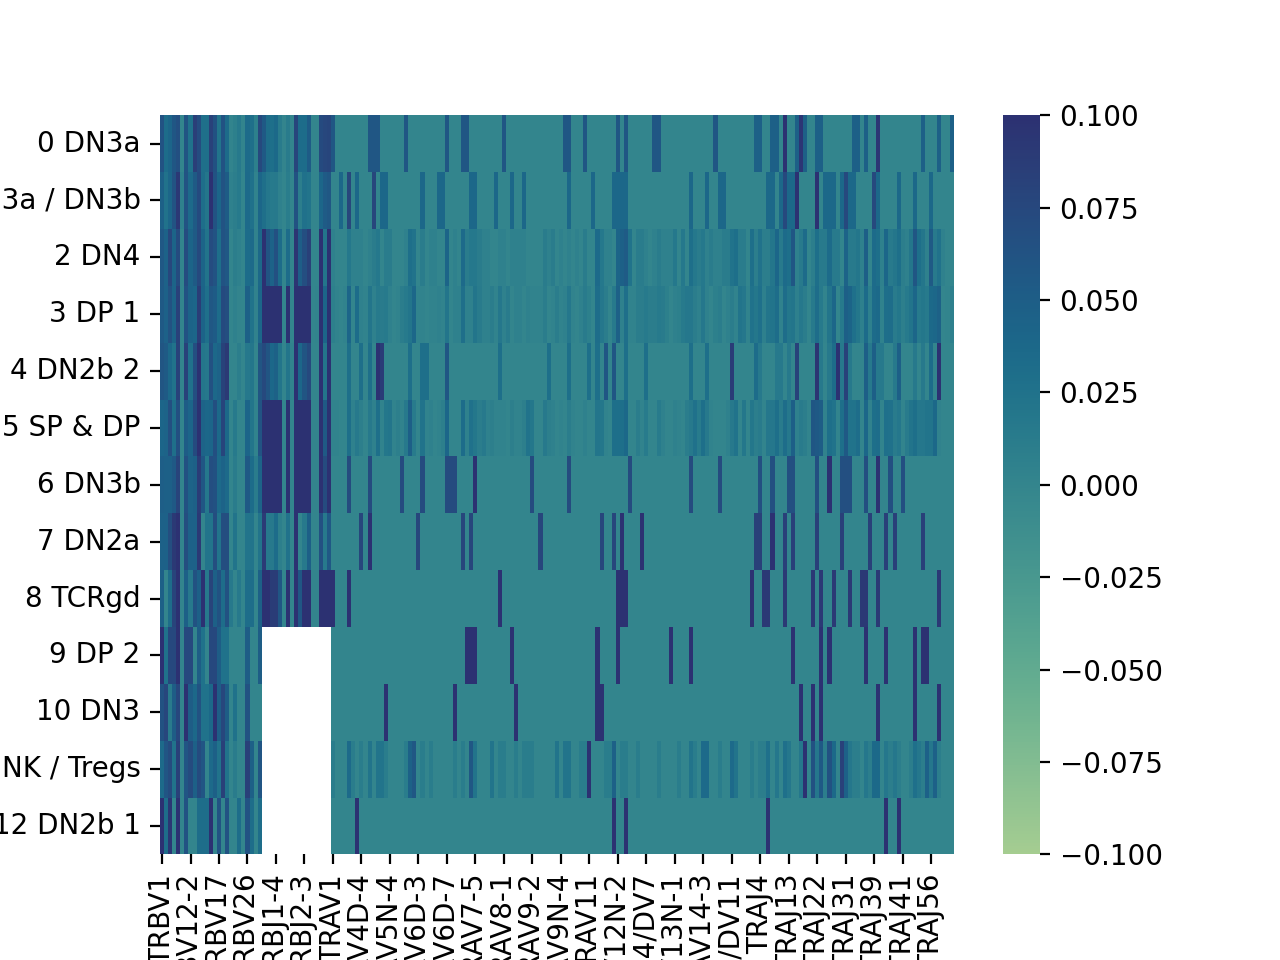

In [244]:
#options.figure_size = (20,30)
sns.heatmap(result, cmap="crest")

In [245]:
# convert NA values to 0
result[pd.isnull(result)] = 0

In [246]:
# convert inf to 0
result[np.isinf(result)] = 0

In [247]:
result.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Columns: 195 entries, TRBV1 to TRDJ1
dtypes: float64(195)
memory usage: 20.5 KB


<Axes: ylabel='leiden'>

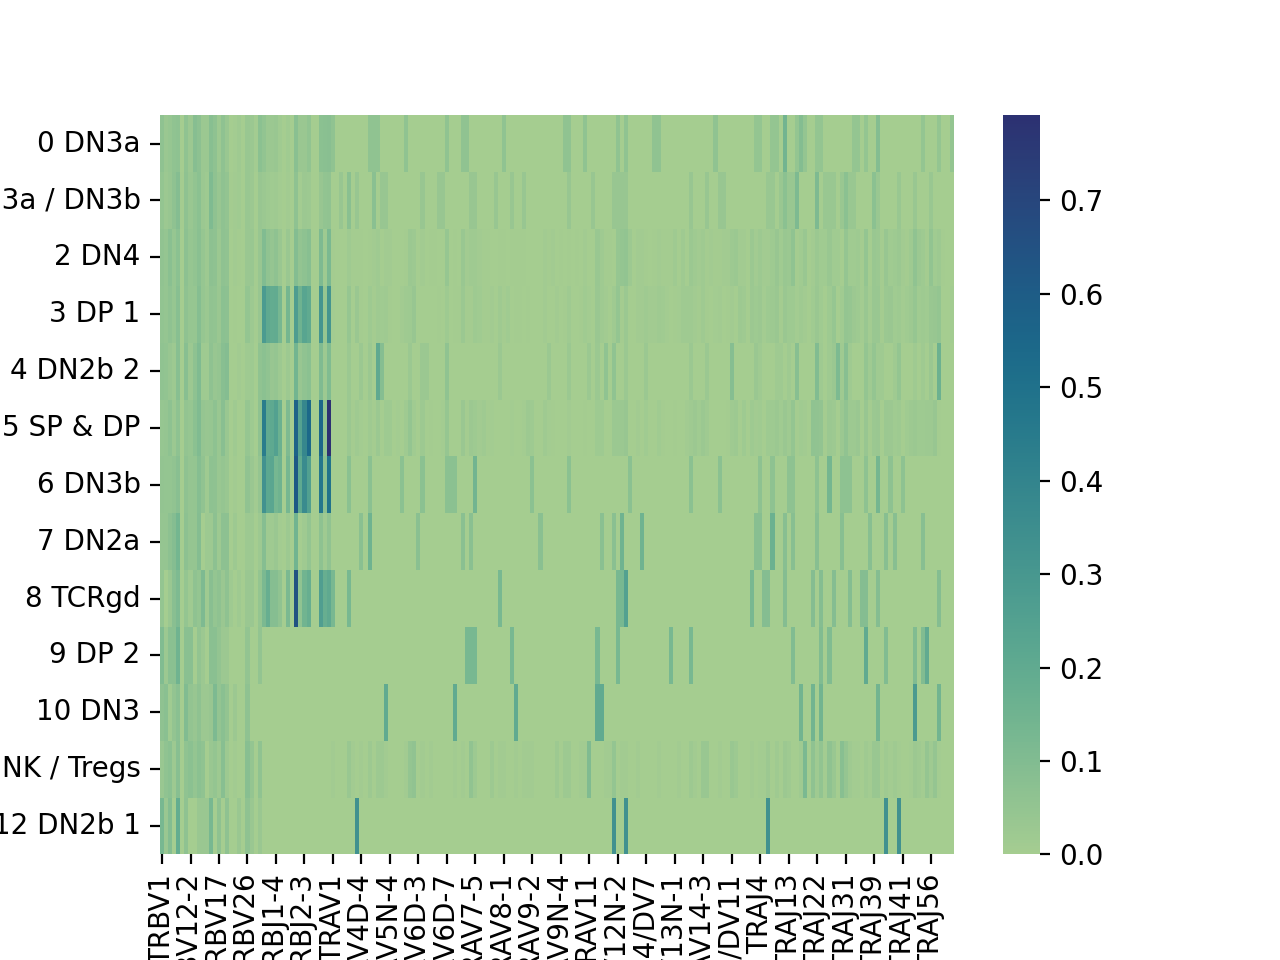

In [248]:
#options.figure_size = (20,30)
sns.heatmap(result, cmap="crest")

<Axes: ylabel='leiden'>

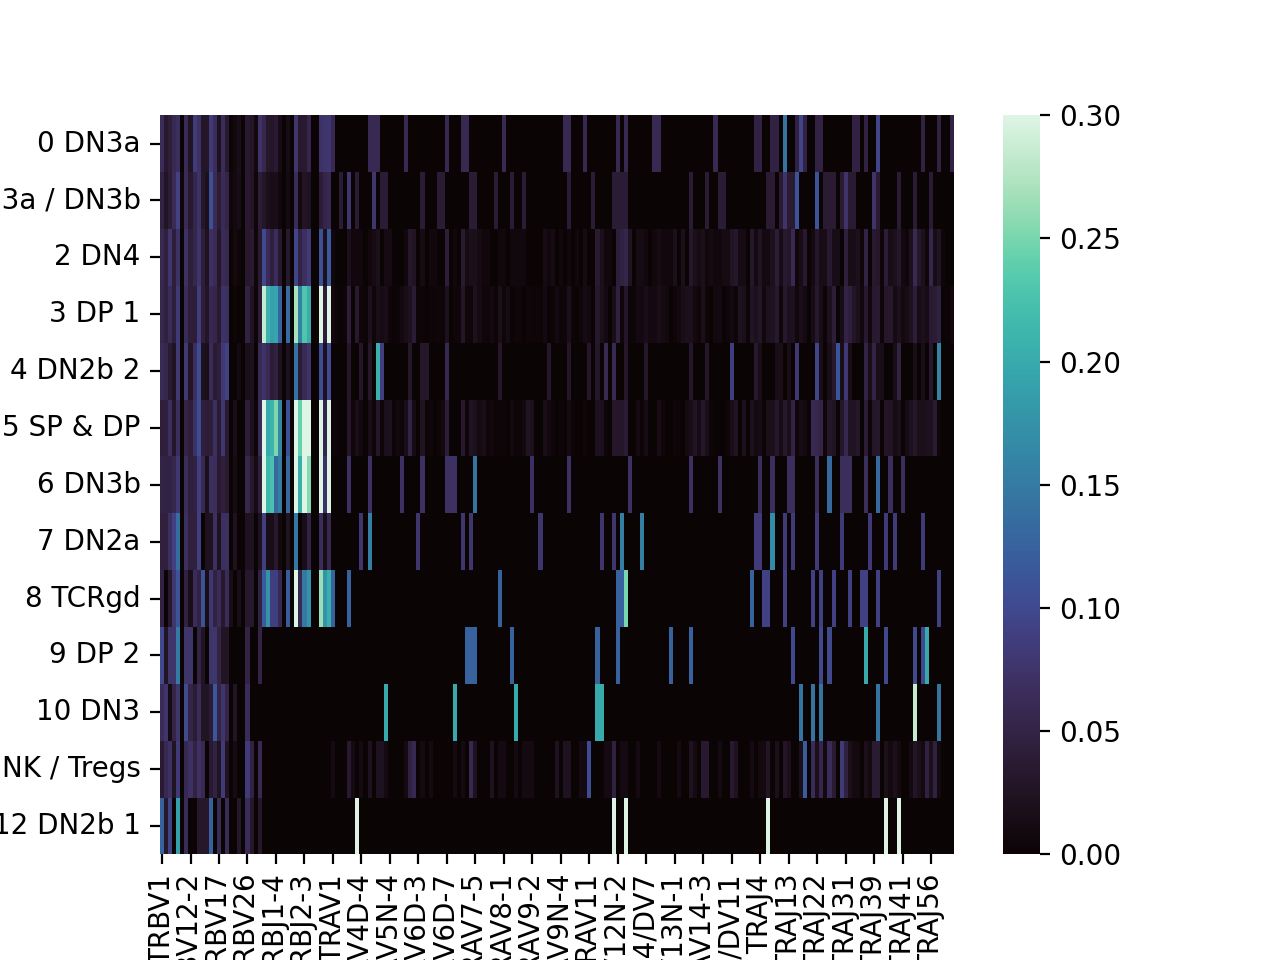

In [249]:
#options.figure_size = (20, 30)
sns.heatmap(result, cmap="mako", yticklabels=True, vmin =0, vmax = 0.3)

#plt.savefig("tests.pdf")


In [250]:
result = result.reindex([
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ])

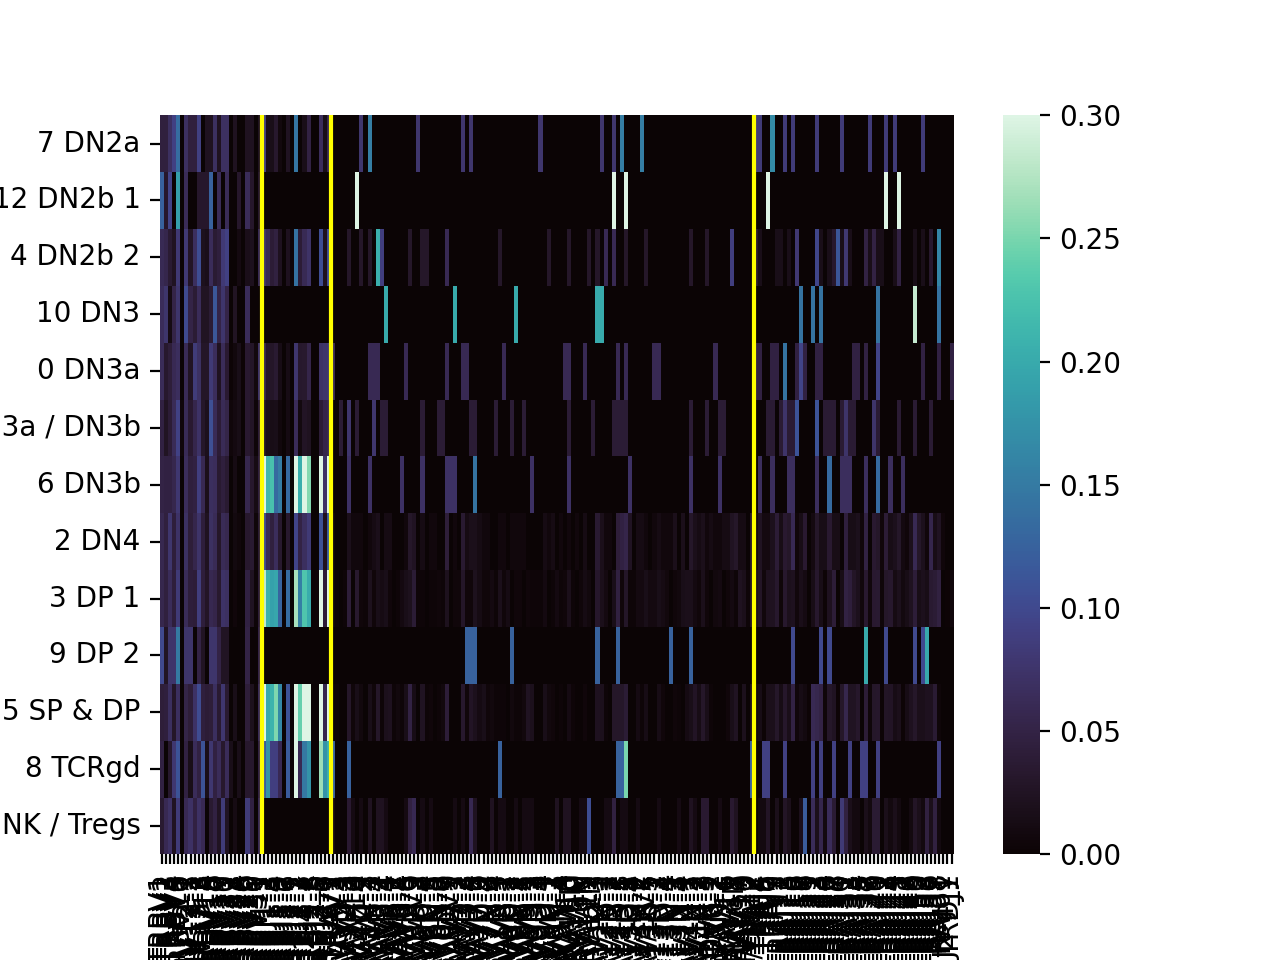

In [251]:
ax = sns.heatmap(result, cmap="mako", xticklabels=True, vmin =0, vmax = 0.3)
ax.axvline(x = 25, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 25+17, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 25+17+104, ymin = 0, ymax = 1.0, color = "yellow")
plt.savefig("Heatmap_VJgeneusage_Control_Final_nonproductive_141223.pdf")


## Do for KO

In [252]:
adata_NPF = adata_NP[adata_NP.obs["v_call_abT_VDJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [253]:
adata_NPF

View of AnnData object with n_obs × n_vars = 7571 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [254]:
adata_NPF_KO = adata_NPF[adata_NPF.obs["Sample"] == "Krt76-/-"]
adata_NPF_KO

View of AnnData object with n_obs × n_vars = 2701 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [255]:
working_df1KO = pd.DataFrame(adata_NPF_KO.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df1KO

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    TRBV19                                37
          TRBV13-1                              34
          TRBV5                                 32
          TRBV15                                28
          TRBV16                                27
...                                            ...
12 DN2b 1 TRBV13-1                               0
          TRBV12-2                               0
          TRBV12-1                               0
          TRBV4                                  0
          TRBV31                                 0

[286 rows x 1 columns]

In [256]:
working_df1KO.columns =["counts"]
working_df1KO

counts
leiden    v_call_abT_VDJ_main        
0 DN3a    TRBV19                   37
          TRBV13-1                 34
          TRBV5                    32
          TRBV15                   28
          TRBV16                   27
...                               ...
12 DN2b 1 TRBV13-1                  0
          TRBV12-2                  0
          TRBV12-1                  0
          TRBV4                     0
          TRBV31                    0

[286 rows x 1 columns]

In [257]:
working_df1KO.reset_index(inplace = True)
working_df1KO

leiden v_call_abT_VDJ_main  counts
0       0 DN3a              TRBV19      37
1       0 DN3a            TRBV13-1      34
2       0 DN3a               TRBV5      32
3       0 DN3a              TRBV15      28
4       0 DN3a              TRBV16      27
..         ...                 ...     ...
281  12 DN2b 1            TRBV13-1       0
282  12 DN2b 1            TRBV12-2       0
283  12 DN2b 1            TRBV12-1       0
284  12 DN2b 1               TRBV4       0
285  12 DN2b 1              TRBV31       0

[286 rows x 3 columns]

In [258]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df1KO.leiden.unique():
    tmp = working_df1KO[working_df1KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 396,
 '1 DN3a / DN3b': 205,
 '2 DN4': 674,
 '3 DP 1': 780,
 '4 DN2b 2': 115,
 '5 SP & DP': 204,
 '6 DN3b': 200,
 '7 DN2a': 16,
 '8 TCRgd': 34,
 '9 DP 2': 15,
 '10 DN3': 28,
 '11 NKT / NK / Tregs': 20,
 '12 DN2b 1': 14}

In [259]:
working_df1KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df1KO.iterrows():
    try:
        working_df1KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [260]:
working_df1KO

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a              TRBV19      37    0.093434
1       0 DN3a            TRBV13-1      34    0.085859
2       0 DN3a               TRBV5      32    0.080808
3       0 DN3a              TRBV15      28    0.070707
4       0 DN3a              TRBV16      27    0.068182
..         ...                 ...     ...         ...
281  12 DN2b 1            TRBV13-1       0    0.000000
282  12 DN2b 1            TRBV12-2       0    0.000000
283  12 DN2b 1            TRBV12-1       0    0.000000
284  12 DN2b 1               TRBV4       0    0.000000
285  12 DN2b 1              TRBV31       0    0.000000

[286 rows x 4 columns]

In [261]:
KOdf1 = working_df1KO.pivot(index='leiden', columns='v_call_abT_VDJ_main', values='proportion')
print(KOdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.047980  0.020202  0.050505  0.053030  0.080808   
1 DN3a / DN3b        0.082927  0.009756  0.073171  0.073171  0.097561   
2 DN4                0.045994  0.031157  0.054896  0.048961  0.060831   
3 DP 1               0.064103  0.048718  0.060256  0.038462  0.067949   
4 DN2b 2             0.121739  0.034783  0.060870  0.008696  0.052174   
5 SP & DP            0.029412  0.107843  0.073529  0.019608  0.093137   
6 DN3b               0.035000  0.070000  0.055000  0.055000  0.075000   
7 DN2a               0.062500  0.000000  0.187500  0.000000  0.125000   
8 TCRgd              0.058824  0.000000  0.000000  0.058824  0.029412   
9 DP 2               0.000000  0.000000  0.133333  0.066667  0.066667   
10 DN3               0.000000  0.000000  0.035714  0.035714  0.000000   
11 NKT / NK / Tregs  0.050000  0.050000  0.000000  

### KO - J gene beta chain

In [262]:
adata_NPF = adata_NP[adata_NP.obs["j_call_abT_VDJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [263]:
adata_NPF

View of AnnData object with n_obs × n_vars = 8299 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [264]:
adata_NPF_KO = adata_NPF[adata_NPF.obs["Sample"] == "Krt76-/-"]
adata_NPF_KO

View of AnnData object with n_obs × n_vars = 2903 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [265]:
working_df2KO = pd.DataFrame(adata_NPF_KO.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df2KO

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                         
0 DN3a    TRBJ2-1                                   75
          TRBJ2-6                                   67
          TRBJ2-7                                   63
          TRBJ2-5                                   57
          TRBJ2-4                                   42
...                                                ...
12 DN2b 1 TRBJ1-3                                    0
          TRBJ1-4                                    0
          TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
          TRBJ2-2                                    0
          TRBJ2-6                                    0

[182 rows x 1 columns]

In [266]:
working_df2KO.columns =["counts"]
working_df2KO

counts
leiden    j_call_abT_VDJ_main            
0 DN3a    TRBJ2-1                      75
          TRBJ2-6                      67
          TRBJ2-7                      63
          TRBJ2-5                      57
          TRBJ2-4                      42
...                                   ...
12 DN2b 1 TRBJ1-3                       0
          TRBJ1-4                       0
          TRBJ1-6,TRBJ2-2,TRBJ2-7       0
          TRBJ2-2                       0
          TRBJ2-6                       0

[182 rows x 1 columns]

In [267]:
working_df2KO.reset_index(inplace = True)
working_df2KO

leiden      j_call_abT_VDJ_main  counts
0       0 DN3a                  TRBJ2-1      75
1       0 DN3a                  TRBJ2-6      67
2       0 DN3a                  TRBJ2-7      63
3       0 DN3a                  TRBJ2-5      57
4       0 DN3a                  TRBJ2-4      42
..         ...                      ...     ...
177  12 DN2b 1                  TRBJ1-3       0
178  12 DN2b 1                  TRBJ1-4       0
179  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
180  12 DN2b 1                  TRBJ2-2       0
181  12 DN2b 1                  TRBJ2-6       0

[182 rows x 3 columns]

In [268]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df2KO.leiden.unique():
    tmp = working_df2KO[working_df2KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 470,
 '1 DN3a / DN3b': 247,
 '2 DN4': 705,
 '3 DP 1': 802,
 '4 DN2b 2': 123,
 '5 SP & DP': 211,
 '6 DN3b': 206,
 '7 DN2a': 19,
 '8 TCRgd': 38,
 '9 DP 2': 18,
 '10 DN3': 30,
 '11 NKT / NK / Tregs': 20,
 '12 DN2b 1': 14}

In [269]:
working_df2KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df2KO.iterrows():
    try:
        working_df2KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [270]:
working_df2KO

leiden      j_call_abT_VDJ_main  counts  proportion
0       0 DN3a                  TRBJ2-1      75    0.159574
1       0 DN3a                  TRBJ2-6      67    0.142553
2       0 DN3a                  TRBJ2-7      63    0.134043
3       0 DN3a                  TRBJ2-5      57    0.121277
4       0 DN3a                  TRBJ2-4      42    0.089362
..         ...                      ...     ...         ...
177  12 DN2b 1                  TRBJ1-3       0    0.000000
178  12 DN2b 1                  TRBJ1-4       0    0.000000
179  12 DN2b 1  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000
180  12 DN2b 1                  TRBJ2-2       0    0.000000
181  12 DN2b 1                  TRBJ2-6       0    0.000000

[182 rows x 4 columns]

In [271]:
KOdf2 = working_df2KO.pivot(index='leiden', columns='j_call_abT_VDJ_main', values='proportion')
print(KOdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.047980  0.020202  0.050505  0.053030  0.080808   
1 DN3a / DN3b        0.082927  0.009756  0.073171  0.073171  0.097561   
2 DN4                0.045994  0.031157  0.054896  0.048961  0.060831   
3 DP 1               0.064103  0.048718  0.060256  0.038462  0.067949   
4 DN2b 2             0.121739  0.034783  0.060870  0.008696  0.052174   
5 SP & DP            0.029412  0.107843  0.073529  0.019608  0.093137   
6 DN3b               0.035000  0.070000  0.055000  0.055000  0.075000   
7 DN2a               0.062500  0.000000  0.187500  0.000000  0.125000   
8 TCRgd              0.058824  0.000000  0.000000  0.058824  0.029412   
9 DP 2               0.000000  0.000000  0.133333  0.066667  0.066667   
10 DN3               0.000000  0.000000  0.035714  0.035714  0.000000   
11 NKT / NK / Tregs  0.050000  0.050000  0.000000  

### V gene Alpha chain - KO

In [272]:
adata_NPF = adata_NP[adata_NP.obs["v_call_abT_VJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["v_call_abT_VJ_main"] != "No_contig"]

In [273]:
adata_NPF

View of AnnData object with n_obs × n_vars = 2031 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [274]:
adata_NPF_KO = adata_NPF[adata_NPF.obs["Sample"] == "Krt76-/-"]
adata_NPF_KO

View of AnnData object with n_obs × n_vars = 887 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [275]:
working_df3KO = pd.DataFrame(adata_NPF_KO.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df3KO

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                               
0 DN3a    TRAV13-1                                        2
          TRAV9-2                                         1
          TRAV6D-3                                        1
          TRAV14D-1,TRAV14N-1                             1
          TRAV13-2                                        1
...                                                     ...
12 DN2b 1 TRAV7-2,TRAV7D-2                                0
          TRAV6N-7,TRAV6D-7,TRAV6-7/DV9                   0
          TRAV6N-7,TRAV6D-7                               0
          TRAV6N-6                                        0
          TRAV21/DV12                                     0

[1235 rows x 1 columns]

In [276]:
working_df3KO.columns =["counts"]
working_df3KO

counts
leiden    v_call_abT_VJ_main                   
0 DN3a    TRAV13-1                            2
          TRAV9-2                             1
          TRAV6D-3                            1
          TRAV14D-1,TRAV14N-1                 1
          TRAV13-2                            1
...                                         ...
12 DN2b 1 TRAV7-2,TRAV7D-2                    0
          TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0
          TRAV6N-7,TRAV6D-7                   0
          TRAV6N-6                            0
          TRAV21/DV12                         0

[1235 rows x 1 columns]

In [277]:
working_df3KO.reset_index(inplace = True)
working_df3KO

leiden             v_call_abT_VJ_main  counts
0        0 DN3a                       TRAV13-1       2
1        0 DN3a                        TRAV9-2       1
2        0 DN3a                       TRAV6D-3       1
3        0 DN3a            TRAV14D-1,TRAV14N-1       1
4        0 DN3a                       TRAV13-2       1
...         ...                            ...     ...
1230  12 DN2b 1               TRAV7-2,TRAV7D-2       0
1231  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0
1232  12 DN2b 1              TRAV6N-7,TRAV6D-7       0
1233  12 DN2b 1                       TRAV6N-6       0
1234  12 DN2b 1                    TRAV21/DV12       0

[1235 rows x 3 columns]

In [278]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df3KO.leiden.unique():
    tmp = working_df3KO[working_df3KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 13,
 '1 DN3a / DN3b': 17,
 '2 DN4': 179,
 '3 DP 1': 402,
 '4 DN2b 2': 31,
 '5 SP & DP': 198,
 '6 DN3b': 10,
 '7 DN2a': 5,
 '8 TCRgd': 3,
 '9 DP 2': 4,
 '10 DN3': 2,
 '11 NKT / NK / Tregs': 18,
 '12 DN2b 1': 5}

In [279]:
working_df3KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df3KO.iterrows():
    try:
        working_df3KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [280]:
working_df3KO

leiden             v_call_abT_VJ_main  counts  proportion
0        0 DN3a                       TRAV13-1       2    0.153846
1        0 DN3a                        TRAV9-2       1    0.076923
2        0 DN3a                       TRAV6D-3       1    0.076923
3        0 DN3a            TRAV14D-1,TRAV14N-1       1    0.076923
4        0 DN3a                       TRAV13-2       1    0.076923
...         ...                            ...     ...         ...
1230  12 DN2b 1               TRAV7-2,TRAV7D-2       0    0.000000
1231  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0    0.000000
1232  12 DN2b 1              TRAV6N-7,TRAV6D-7       0    0.000000
1233  12 DN2b 1                       TRAV6N-6       0    0.000000
1234  12 DN2b 1                    TRAV21/DV12       0    0.000000

[1235 rows x 4 columns]

In [281]:
KOdf3 = working_df3KO.pivot(index='leiden', columns='v_call_abT_VJ_main', values='proportion')
print(KOdf3)

v_call_abT_VJ_main      TRAV1     TRAV2   TRAV3-1  TRAV3N-3,TRAV3D-3  \
leiden                                                                 
0 DN3a               0.000000  0.000000  0.000000           0.000000   
1 DN3a / DN3b        0.000000  0.000000  0.000000           0.000000   
2 DN4                0.011173  0.000000  0.000000           0.033520   
3 DP 1               0.004975  0.004975  0.002488           0.042289   
4 DN2b 2             0.000000  0.032258  0.000000           0.032258   
5 SP & DP            0.005051  0.010101  0.000000           0.030303   
6 DN3b               0.000000  0.000000  0.000000           0.100000   
7 DN2a               0.000000  0.000000  0.000000           0.000000   
8 TCRgd              0.000000  0.000000  0.000000           0.333333   
9 DP 2               0.000000  0.000000  0.000000           0.000000   
10 DN3               0.000000  0.000000  0.000000           0.000000   
11 NKT / NK / Tregs  0.000000  0.000000  0.000000           0.00

### J gene Alpha Chain - KO

In [282]:
adata_NPF = adata_NP[adata_NP.obs["j_call_abT_VJ_main"] != "None"]
adata_NPF = adata_NPF[adata_NPF.obs["j_call_abT_VJ_main"] != "No_contig"]

In [283]:
adata_NPF

View of AnnData object with n_obs × n_vars = 2100 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main'

In [284]:
adata_NPF_KO = adata_NPF[adata_NPF.obs["Sample"] == "Krt76-/-"]
adata_NPF_KO

View of AnnData object with n_obs × n_vars = 907 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main',

In [285]:
working_df4KO = pd.DataFrame(adata_NPF_KO.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df4KO

j_call_abT_VJ_main
leiden    j_call_abT_VJ_main                    
0 DN3a    TRAJ26                               2
          TRAJ13                               2
          TRAJ32                               1
          TRAJ15                               1
          TRAJ40                               1
...                                          ...
12 DN2b 1 TRAJ27                               0
          TRAJ28                               0
          TRAJ30                               0
          TRAJ31                               0
          TRDJ1                                0

[624 rows x 1 columns]

In [286]:
working_df4KO.columns =["counts"]
working_df4KO

counts
leiden    j_call_abT_VJ_main        
0 DN3a    TRAJ26                   2
          TRAJ13                   2
          TRAJ32                   1
          TRAJ15                   1
          TRAJ40                   1
...                              ...
12 DN2b 1 TRAJ27                   0
          TRAJ28                   0
          TRAJ30                   0
          TRAJ31                   0
          TRDJ1                    0

[624 rows x 1 columns]

In [287]:
working_df4KO.reset_index(inplace = True)
working_df4KO

leiden j_call_abT_VJ_main  counts
0       0 DN3a             TRAJ26       2
1       0 DN3a             TRAJ13       2
2       0 DN3a             TRAJ32       1
3       0 DN3a             TRAJ15       1
4       0 DN3a             TRAJ40       1
..         ...                ...     ...
619  12 DN2b 1             TRAJ27       0
620  12 DN2b 1             TRAJ28       0
621  12 DN2b 1             TRAJ30       0
622  12 DN2b 1             TRAJ31       0
623  12 DN2b 1              TRDJ1       0

[624 rows x 3 columns]

In [288]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df4KO.leiden.unique():
    tmp = working_df4KO[working_df4KO["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 13,
 '1 DN3a / DN3b': 17,
 '2 DN4': 188,
 '3 DP 1': 407,
 '4 DN2b 2': 32,
 '5 SP & DP': 199,
 '6 DN3b': 11,
 '7 DN2a': 5,
 '8 TCRgd': 4,
 '9 DP 2': 4,
 '10 DN3': 4,
 '11 NKT / NK / Tregs': 18,
 '12 DN2b 1': 5}

In [289]:
working_df4KO["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df4KO.iterrows():
    try:
        working_df4KO.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [290]:
working_df4KO

leiden j_call_abT_VJ_main  counts  proportion
0       0 DN3a             TRAJ26       2    0.153846
1       0 DN3a             TRAJ13       2    0.153846
2       0 DN3a             TRAJ32       1    0.076923
3       0 DN3a             TRAJ15       1    0.076923
4       0 DN3a             TRAJ40       1    0.076923
..         ...                ...     ...         ...
619  12 DN2b 1             TRAJ27       0    0.000000
620  12 DN2b 1             TRAJ28       0    0.000000
621  12 DN2b 1             TRAJ30       0    0.000000
622  12 DN2b 1             TRAJ31       0    0.000000
623  12 DN2b 1              TRDJ1       0    0.000000

[624 rows x 4 columns]

In [291]:
KOdf4 = working_df4KO.pivot(index='leiden', columns='j_call_abT_VJ_main', values='proportion')
print(KOdf1)

v_call_abT_VDJ_main     TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.047980  0.020202  0.050505  0.053030  0.080808   
1 DN3a / DN3b        0.082927  0.009756  0.073171  0.073171  0.097561   
2 DN4                0.045994  0.031157  0.054896  0.048961  0.060831   
3 DP 1               0.064103  0.048718  0.060256  0.038462  0.067949   
4 DN2b 2             0.121739  0.034783  0.060870  0.008696  0.052174   
5 SP & DP            0.029412  0.107843  0.073529  0.019608  0.093137   
6 DN3b               0.035000  0.070000  0.055000  0.055000  0.075000   
7 DN2a               0.062500  0.000000  0.187500  0.000000  0.125000   
8 TCRgd              0.058824  0.000000  0.000000  0.058824  0.029412   
9 DP 2               0.000000  0.000000  0.133333  0.066667  0.066667   
10 DN3               0.000000  0.000000  0.035714  0.035714  0.000000   
11 NKT / NK / Tregs  0.050000  0.050000  0.000000  

### Now do the merging and create heatmap

In [292]:
resultKO = pd.merge(KOdf1, KOdf2, on='leiden').merge(KOdf3, on='leiden').merge(KOdf4, on='leiden')

In [293]:
print(resultKO)

                        TRBV1     TRBV2     TRBV3     TRBV4     TRBV5  \
leiden                                                                  
0 DN3a               0.047980  0.020202  0.050505  0.053030  0.080808   
1 DN3a / DN3b        0.082927  0.009756  0.073171  0.073171  0.097561   
2 DN4                0.045994  0.031157  0.054896  0.048961  0.060831   
3 DP 1               0.064103  0.048718  0.060256  0.038462  0.067949   
4 DN2b 2             0.121739  0.034783  0.060870  0.008696  0.052174   
5 SP & DP            0.029412  0.107843  0.073529  0.019608  0.093137   
6 DN3b               0.035000  0.070000  0.055000  0.055000  0.075000   
7 DN2a               0.062500  0.000000  0.187500  0.000000  0.125000   
8 TCRgd              0.058824  0.000000  0.000000  0.058824  0.029412   
9 DP 2               0.000000  0.000000  0.133333  0.066667  0.066667   
10 DN3               0.000000  0.000000  0.035714  0.035714  0.000000   
11 NKT / NK / Tregs  0.050000  0.050000  0.000000  

In [294]:
resultKO.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Columns: 179 entries, TRBV1 to TRDJ1
dtypes: float64(179)
memory usage: 18.8 KB


In [295]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


<Axes: ylabel='leiden'>

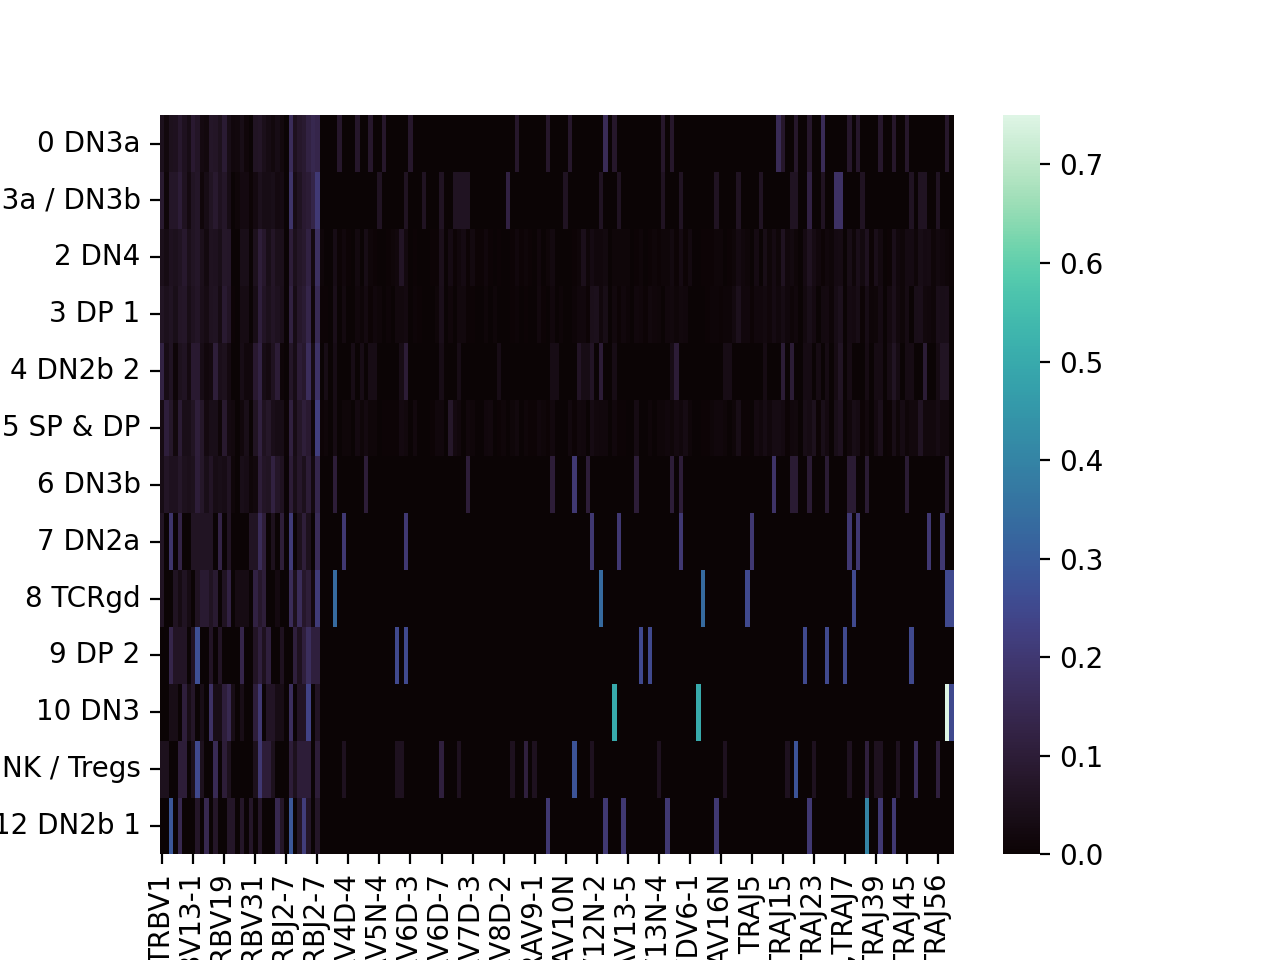

In [296]:
options.figure_size = (20, 30)
sns.heatmap(resultKO, cmap="mako", yticklabels=True)

#plt.savefig("tests.pdf")


In [297]:
KOdf2.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 13 entries, 0 DN3a to 12 DN2b 1
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRBJ1-1                  13 non-null     float64
 1   TRBJ1-2                  13 non-null     float64
 2   TRBJ1-3                  13 non-null     float64
 3   TRBJ1-4                  13 non-null     float64
 4   TRBJ1-5                  13 non-null     float64
 5   TRBJ1-6                  13 non-null     float64
 6   TRBJ1-6,TRBJ2-2,TRBJ2-7  13 non-null     float64
 7   TRBJ2-1                  13 non-null     float64
 8   TRBJ2-2                  13 non-null     float64
 9   TRBJ2-3                  13 non-null     float64
 10  TRBJ2-4                  13 non-null     float64
 11  TRBJ2-5                  13 non-null     float64
 12  TRBJ2-6                  13 non-null     float64
 13  TRBJ2-7                  13 non-null     float64
dtypes: float64

### KO dfs - 22 + 14 + 95

In [298]:
resultKO = resultKO.reindex([
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ])

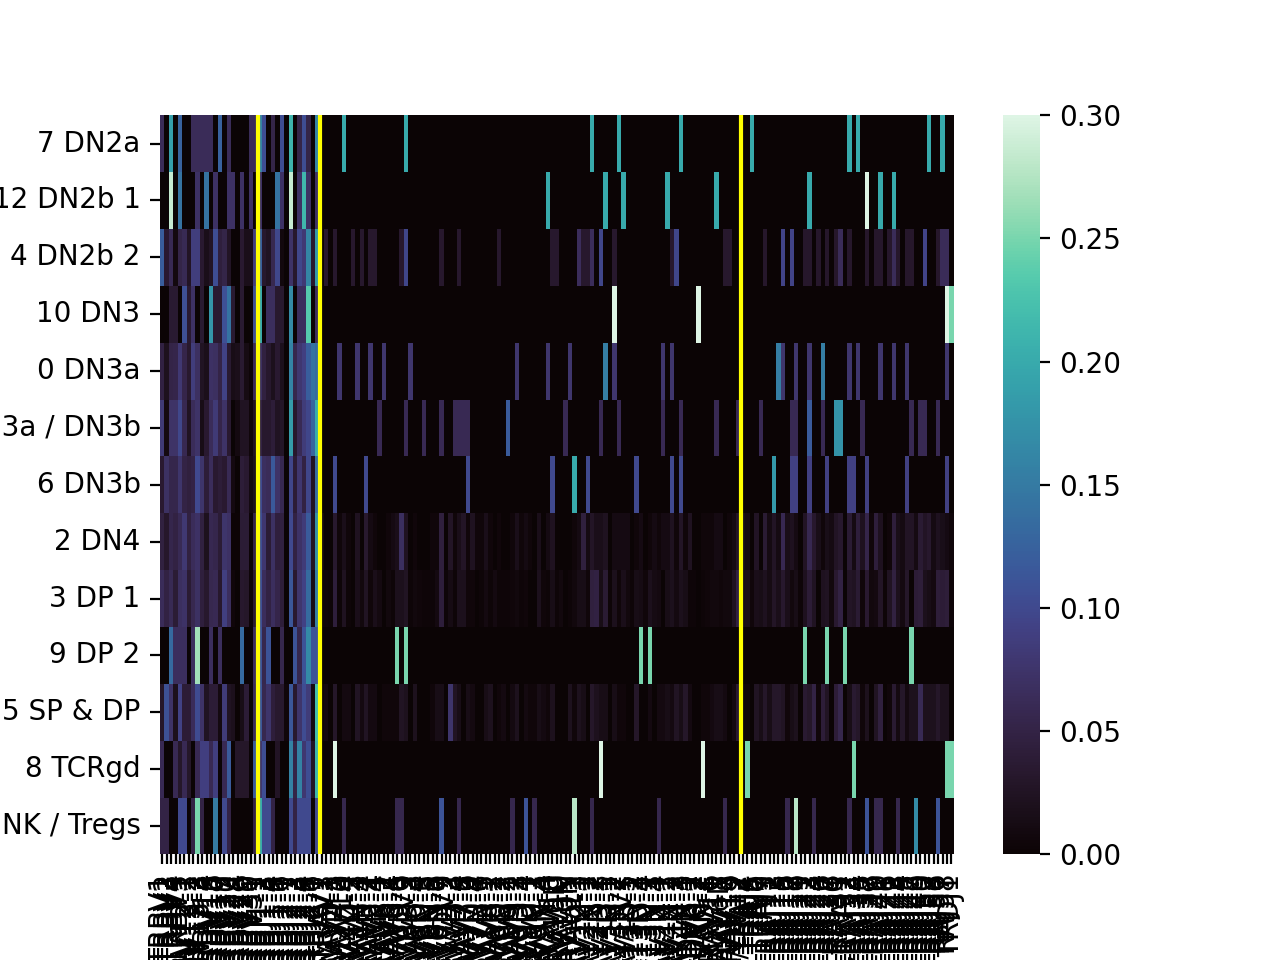

In [299]:
ax = sns.heatmap(resultKO, cmap="mako", xticklabels=True, vmin =0, vmax = 0.3)
ax.axvline(x = 22, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 22+14, ymin = 0, ymax = 1.0, color = "yellow")
ax.axvline(x = 22+14+95, ymin = 0, ymax = 1.0, color = "yellow")
plt.savefig("Heatmap_VJgeneusage_KO_Final_NONPRODUCTIVE_141223.pdf")